##### Iterative Approach

In [15]:
from collections import deque

# Define the goal state for the 8-puzzle problem
GOAL_STATE = (1, 2, 3, 4, 5, 6, 7, 8, 0)  # 0 represents the blank space

# Possible moves for the blank space (0)
MOVES = {
    0: [1, 3],
    1: [-1, 1, 3],
    2: [-1, 3],
    3: [-3, 1, 3],
    4: [-3, -1, 1, 3],
    5: [-3, -1, 3],
    6: [-3, 1],
    7: [-3, -1, 1],
    8: [-1, -3]
}

# Helper function to find the index of the blank space (0)
def find_blank(state):
    return state.index(0)

# Helper function to perform a move on the puzzle state
def move(state, direction):
    blank_index = find_blank(state)
    new_state = list(state)
    new_state[blank_index], new_state[blank_index + direction] = new_state[blank_index + direction], new_state[blank_index]
    return tuple(new_state)

# Depth-limited search function
def depth_limited_search(start_state, depth_limit):
    if start_state == GOAL_STATE:
        return [start_state]
    
    visited = set()
    frontier = deque([(start_state, [start_state], 0)])  # (state, path, depth)
    
    while frontier:
        state, path, depth = frontier.pop()
        
        if state == GOAL_STATE:
            return path
        
        if depth < depth_limit:
            blank_index = find_blank(state)
            possible_moves = MOVES[blank_index]
            
            for move_amount in possible_moves:
                new_state = move(state, move_amount)
                
                if new_state not in visited:
                    visited.add(new_state)
                    new_path = path + [new_state]
                    frontier.append((new_state, new_path, depth + 1))
    
    return None  # If no solution found within depth limit

# Iterative Deepening Search function
def iterative_deepening_search(start_state):
    depth = 0
    while True:
        result = depth_limited_search(start_state, depth)
        if result is not None:
            return result
        depth += 1

# Function to print the puzzle state in a readable format
def print_puzzle(state):
    for i in range(0, 9, 3):
        print(state[i:i+3])
    print()

# Function to print the solution path with steps
def print_solution_steps(path):
    print(f"Solution path with each step:")
    for i, state in enumerate(path):
        print(f"Step {i}:")
        print_puzzle(state)

# Example usage:
if __name__ == "__main__":
    # Initial state of the 8-puzzle problem
    initial_state = (1, 3, 8, 4, 2, 5, 0, 7, 6)  # Example initial state
    
    # Perform iterative deepening search
    solution_path = iterative_deepening_search(initial_state)
    
    if solution_path:
        print_solution_steps(solution_path)
    else:
        print("No solution found.")


Solution path with each step:
Step 0:
(1, 3, 8)
(4, 2, 5)
(0, 7, 6)

Step 1:
(1, 3, 8)
(4, 2, 5)
(7, 0, 6)

Step 2:
(1, 3, 8)
(4, 2, 5)
(7, 6, 0)

Step 3:
(1, 3, 8)
(4, 2, 0)
(7, 6, 5)

Step 4:
(1, 3, 8)
(4, 0, 2)
(7, 6, 5)

Step 5:
(1, 0, 8)
(4, 3, 2)
(7, 6, 5)

Step 6:
(1, 8, 0)
(4, 3, 2)
(7, 6, 5)

Step 7:
(1, 8, 2)
(4, 3, 0)
(7, 6, 5)

Step 8:
(1, 8, 2)
(4, 0, 3)
(7, 6, 5)

Step 9:
(1, 0, 2)
(4, 8, 3)
(7, 6, 5)

Step 10:
(1, 2, 0)
(4, 8, 3)
(7, 6, 5)

Step 11:
(1, 2, 3)
(4, 8, 0)
(7, 6, 5)

Step 12:
(1, 2, 3)
(4, 8, 5)
(7, 6, 0)

Step 13:
(1, 2, 3)
(4, 8, 5)
(7, 0, 6)

Step 14:
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

Step 15:
(1, 2, 3)
(4, 5, 0)
(7, 8, 6)

Step 16:
(1, 2, 3)
(4, 5, 6)
(7, 8, 0)



#### Non-Iterative Approach

In [18]:
from collections import deque

# Define the goal state for the 8-puzzle problem
GOAL_STATE = (1, 2, 3, 4, 5, 6, 7, 8, 0)  # 0 represents the blank space

# Possible moves for the blank space (0)
MOVES = {
    0: [1, 3],
    1: [-1, 1, 3],
    2: [-1, 3],
    3: [-3, 1, 3],
    4: [-3, -1, 1, 3],
    5: [-3, -1, 3],
    6: [-3, 1],
    7: [-3, -1, 1],
    8: [-1, -3]
}

# Helper function to find the index of the blank space (0)
def find_blank(state):
    return state.index(0)

# Helper function to perform a move on the puzzle state
def construct_state(state, direction):
    blank_index = find_blank(state)
    new_state = list(state)
    new_blank_index = blank_index + direction
    
    # Boundary checks
    if (blank_index % 3 == 0 and direction == -1) or \
       (blank_index % 3 == 2 and direction == 1) or \
       (blank_index < 3 and direction == -3) or \
       (blank_index >= 6 and direction == 3):
        return None

    new_state[blank_index], new_state[new_blank_index] = new_state[new_blank_index], new_state[blank_index]
    return tuple(new_state)

# Recursive Depth-Limited Search function
def recursive_dls(state, parent_map, limit):
    if state == GOAL_STATE:
        return state
    elif limit == 0:
        return 'cutoff'
    else:
        cutoff_occurred = False
        for direction in MOVES[find_blank(state)]:
            new_state = construct_state(state, direction)
            if new_state and new_state not in parent_map:
                parent_map[new_state] = state
                result = recursive_dls(new_state, parent_map, limit - 1)
                if result == 'cutoff':
                    cutoff_occurred = True
                elif result:
                    return result
        return 'cutoff' if cutoff_occurred else None

# Depth-Limited Search function
def depth_limited_search(start_state, depth_limit):
    parent_map = {start_state: None}
    return recursive_dls(start_state, parent_map, depth_limit), parent_map

# Iterative Deepening Search function
def iterative_deepening_search(start_state):
    depth = 0
    while True:
        result, parent_map = depth_limited_search(start_state, depth)
        if result != 'cutoff':
            return result, parent_map
        depth += 1

# Function to print the puzzle state in a readable format
def print_puzzle(state):
    for i in range(0, 9, 3):
        print(state[i:i+3])
    print()

# Function to print the solution path with steps
def print_solution_steps(goal_state, parent_map):
    path = []
    state = goal_state
    while state is not None:
        path.append(state)
        state = parent_map.get(state)
    path.reverse()
    print(f"Solution path with each step:")
    for i, state in enumerate(path):
        print(f"Step {i}:")
        print_puzzle(state)

# Example usage:
if __name__ == "__main__":
    # Initial state of the 8-puzzle problem
    initial_state = (1, 3, 8, 4, 2, 5, 0, 7, 6)  # Example initial state
    
    # Perform iterative deepening search
    goal_state, parent_map = iterative_deepening_search(initial_state)
    
    if goal_state:
        print_solution_steps(goal_state, parent_map)
    else:
        print("No solution found.")


Solution path with each step:
Step 0:
(1, 3, 8)
(4, 2, 5)
(0, 7, 6)

Step 1:
(1, 3, 8)
(4, 2, 5)
(7, 0, 6)

Step 2:
(1, 3, 8)
(4, 2, 5)
(7, 6, 0)

Step 3:
(1, 3, 8)
(4, 2, 0)
(7, 6, 5)

Step 4:
(1, 3, 0)
(4, 2, 8)
(7, 6, 5)

Step 5:
(1, 0, 3)
(4, 2, 8)
(7, 6, 5)

Step 6:
(1, 2, 3)
(4, 0, 8)
(7, 6, 5)

Step 7:
(1, 2, 3)
(4, 8, 0)
(7, 6, 5)

Step 8:
(1, 2, 3)
(4, 8, 5)
(7, 6, 0)

Step 9:
(1, 2, 3)
(4, 8, 5)
(7, 0, 6)

Step 10:
(1, 2, 3)
(4, 0, 5)
(7, 8, 6)

Step 11:
(1, 2, 3)
(4, 5, 0)
(7, 8, 6)

Step 12:
(1, 2, 3)
(4, 5, 6)
(7, 8, 0)



In [1]:
def is_safe(state, row, col):
    """Check if placing a queen at (row, col) is safe."""
    for r in range(row):
        c = state[r]
        if c == col or abs(c - col) == abs(r - row):
            return False
    return True

def construct_state(curr_state, action):
    """Construct a new state by placing a queen at the specified column."""
    if is_safe(curr_state, len(curr_state), action):
        return curr_state + [action]
    return None

def print_solution(state):
    """Print the solution board."""
    for row in state:
        line = ['.'] * len(state)
        line[row] = 'Q'
        print(' '.join(line))
    print()

def recursive_dls(state, depth_limit, n):
    """Recursive Depth-Limited Search."""
    if len(state) == n:
        print("Solution found:")
        print_solution(state)
        return True
    elif depth_limit == 0:
        return "cutoff"
    else:
        cutoff_occurred = False
        for col in range(n):
            new_state = construct_state(state, col)
            if new_state:
                result = recursive_dls(new_state, depth_limit - 1, n)
                if result == "cutoff":
                    cutoff_occurred = True
                elif result:
                    return result
        if cutoff_occurred:
            return "cutoff"
        else:
            return False

def iddfs(n):
    """Iterative Deepening Depth-First Search."""
    depth = 0
    while True:
        result = recursive_dls([], depth, n)
        if result != "cutoff":
            return result
        depth += 1

# Driver Code
n = 8  # For 8-queens problem
print("Solving the 8-Queens Problem using IDDFS")
iddfs(n)

Solving the 8-Queens Problem using IDDFS
Solution found:
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .



True

Following is the Iterative Deepening Depth-First Search (IDDFS) for the maze problem:
Searching with depth limit: 0


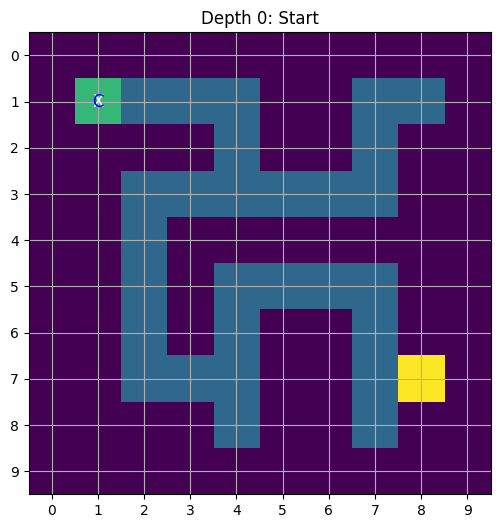

Searching with depth limit: 1


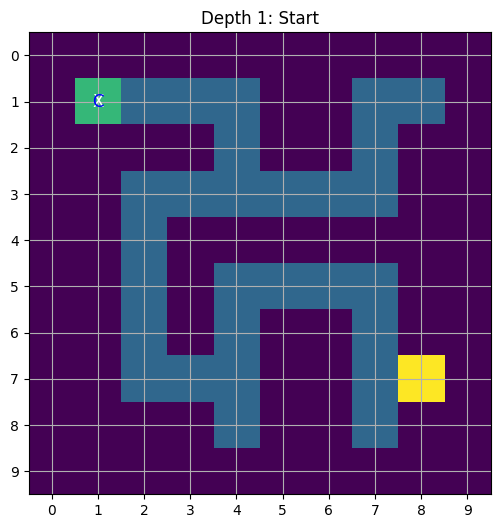

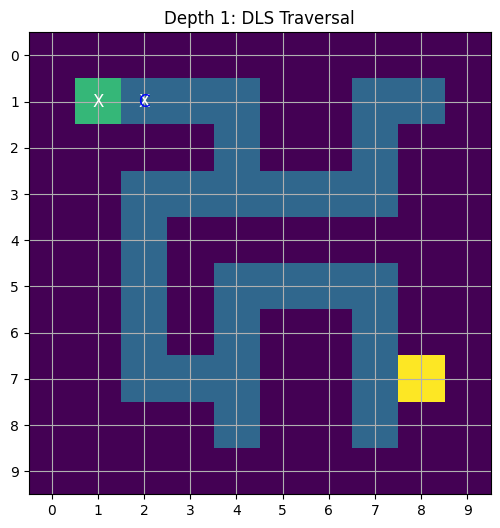

Searching with depth limit: 2


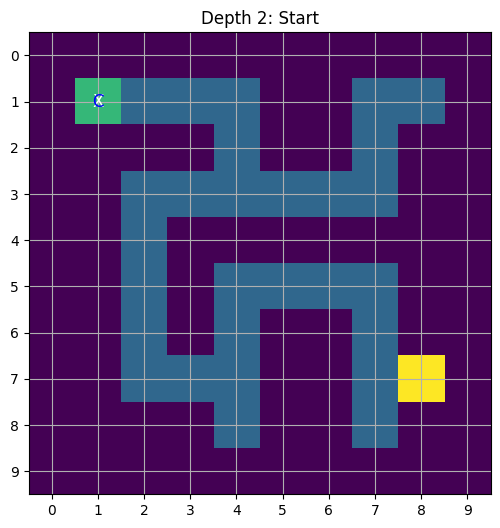

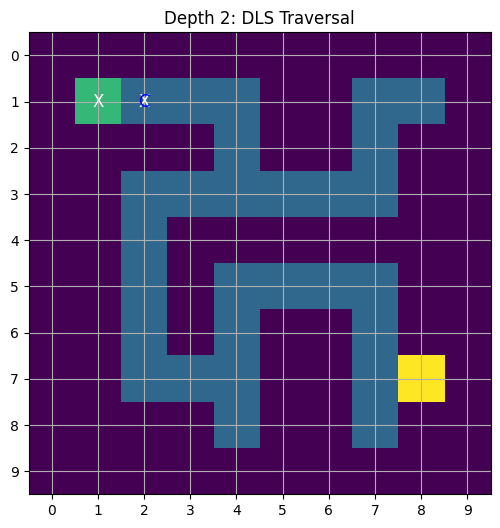

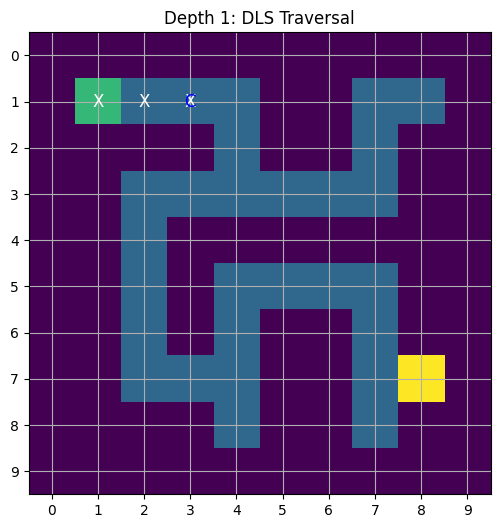

Searching with depth limit: 3


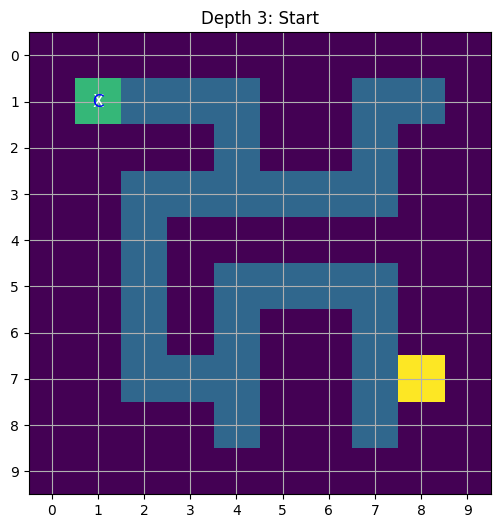

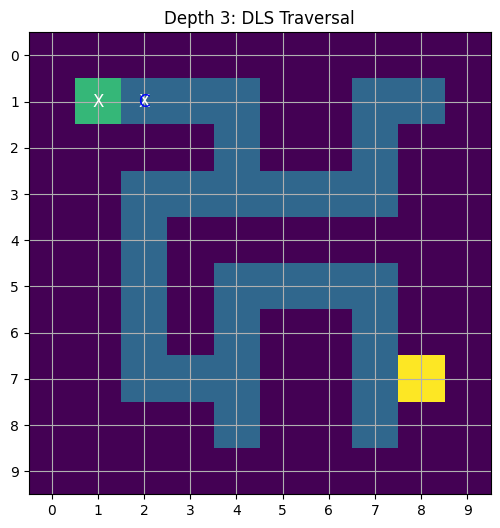

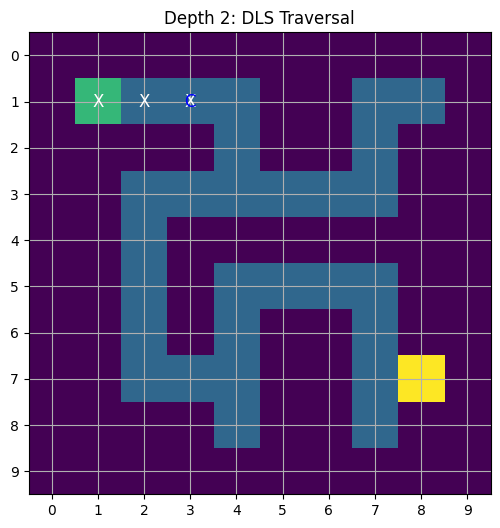

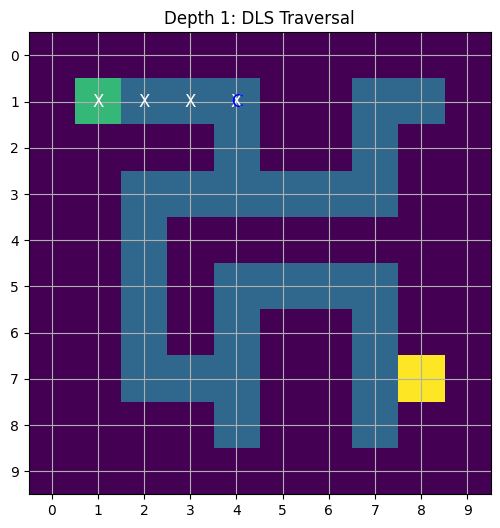

Searching with depth limit: 4


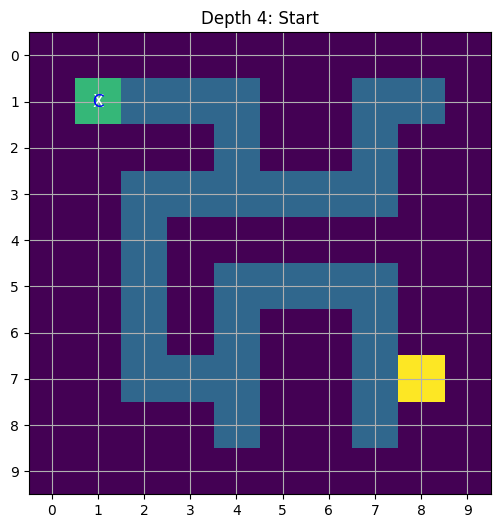

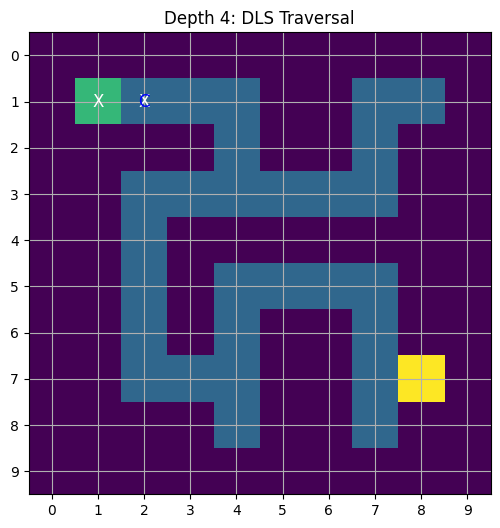

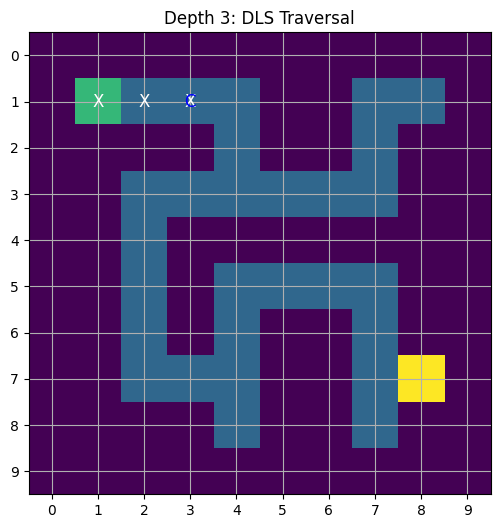

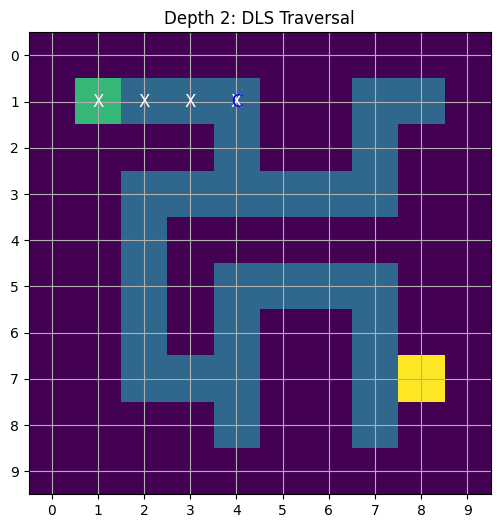

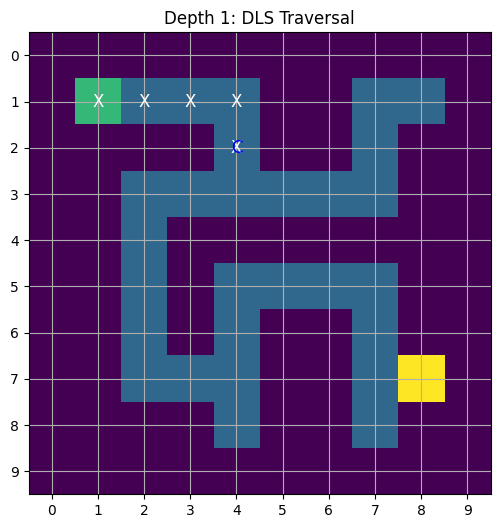

Searching with depth limit: 5


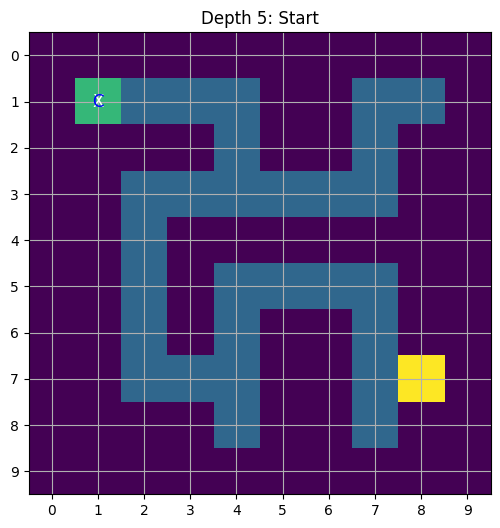

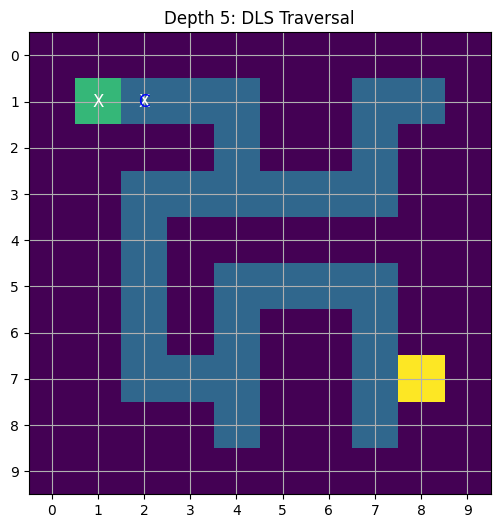

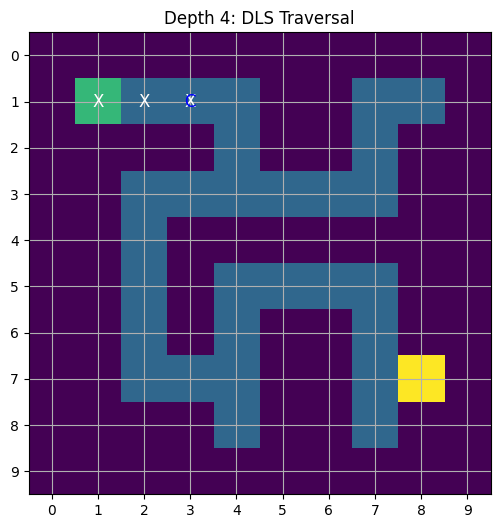

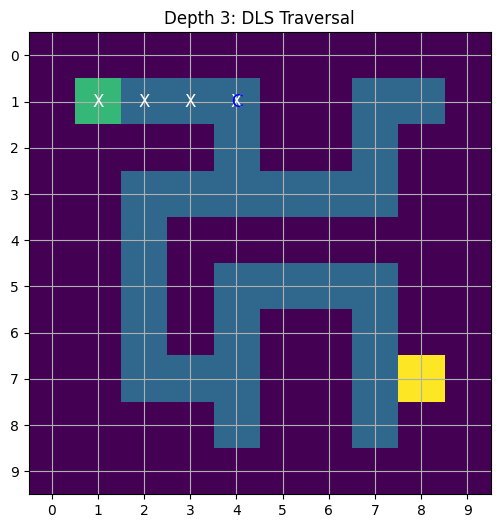

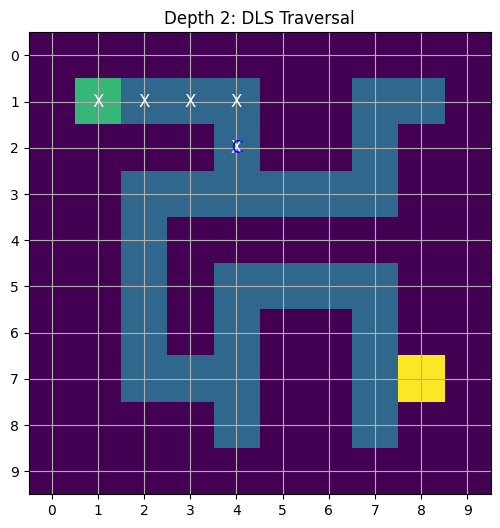

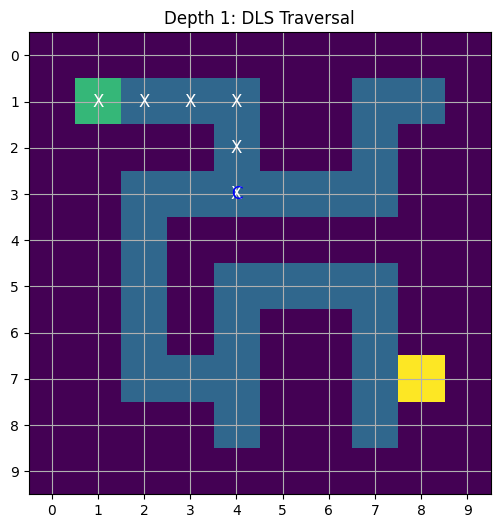

Searching with depth limit: 6


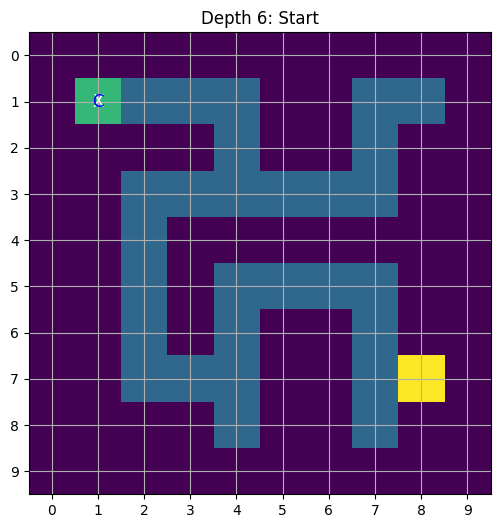

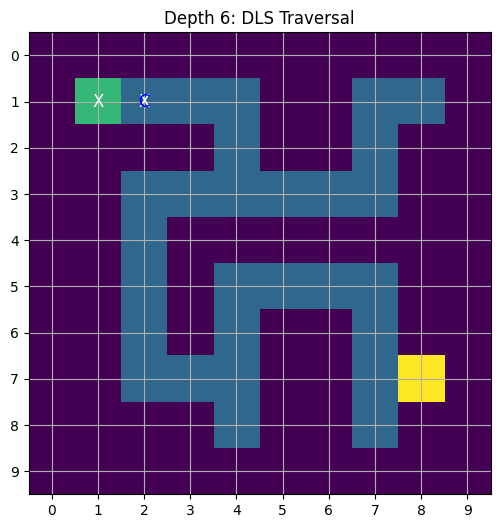

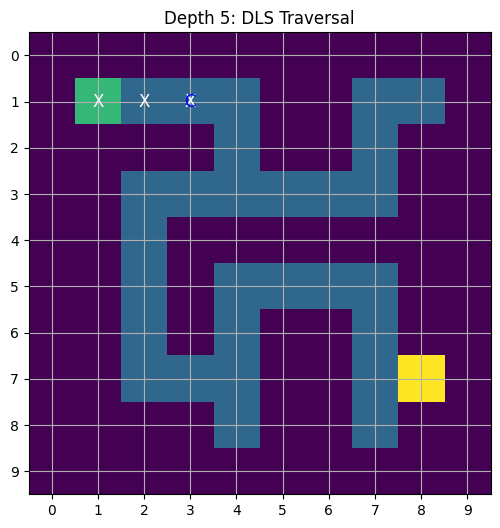

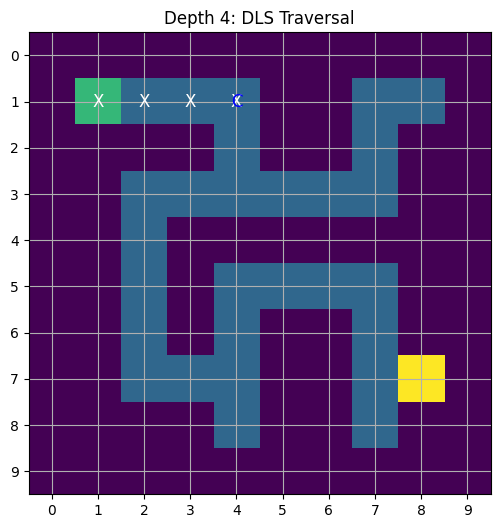

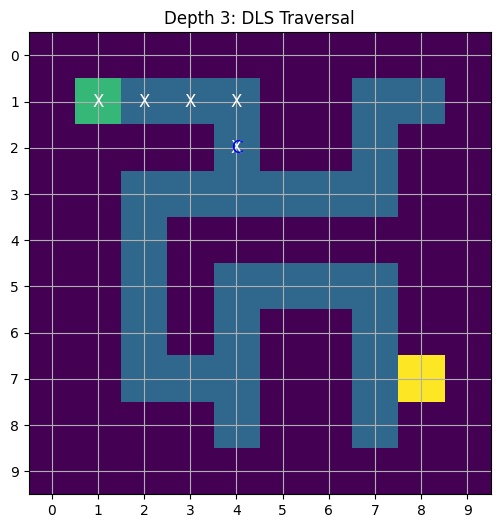

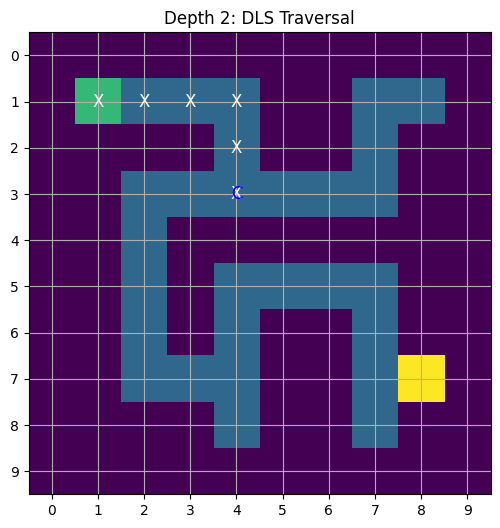

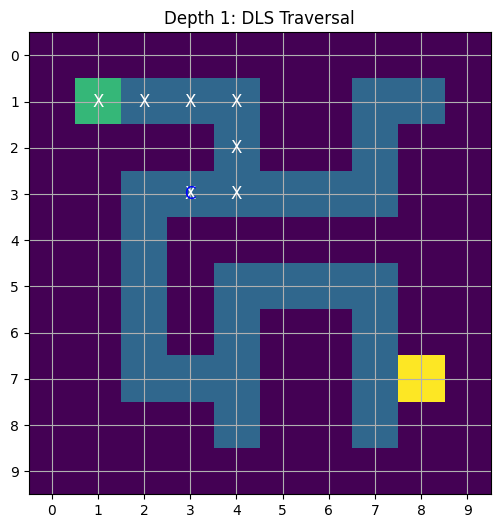

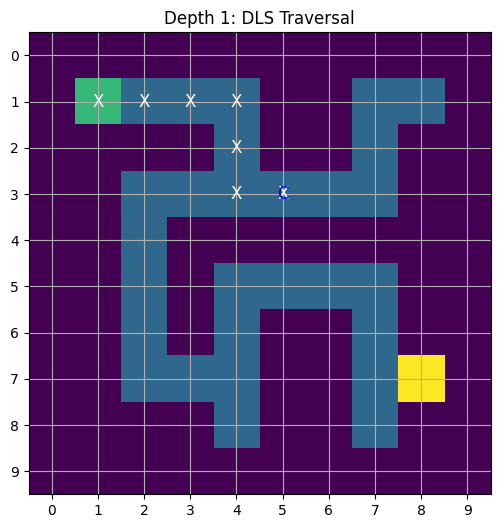

Searching with depth limit: 7


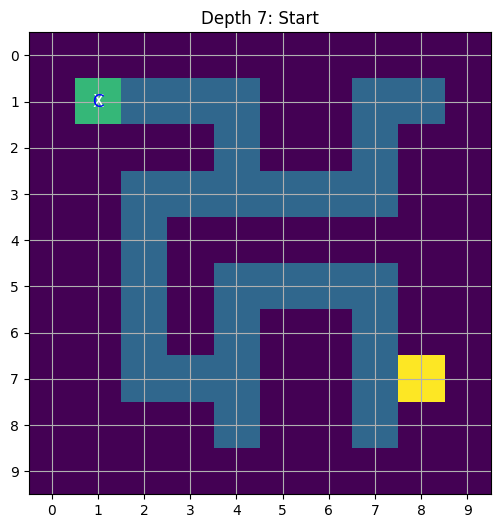

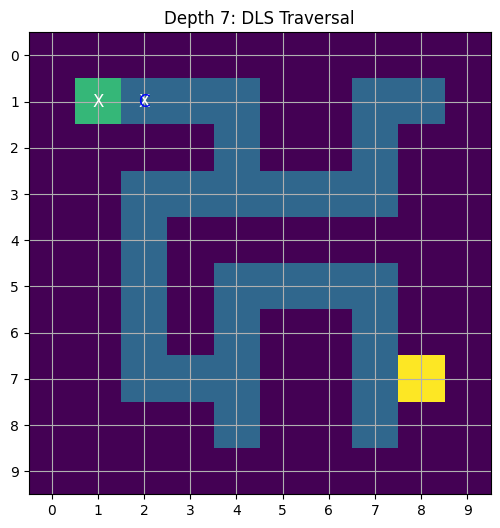

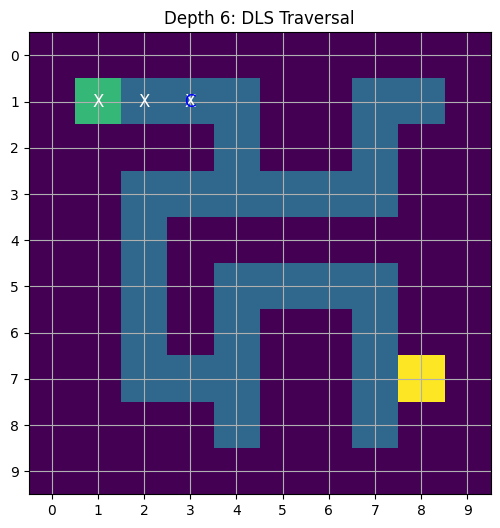

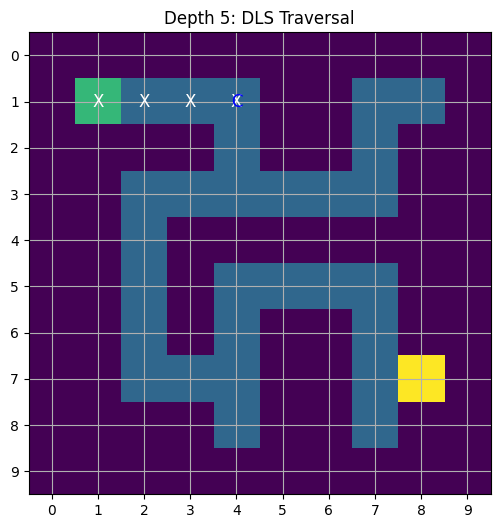

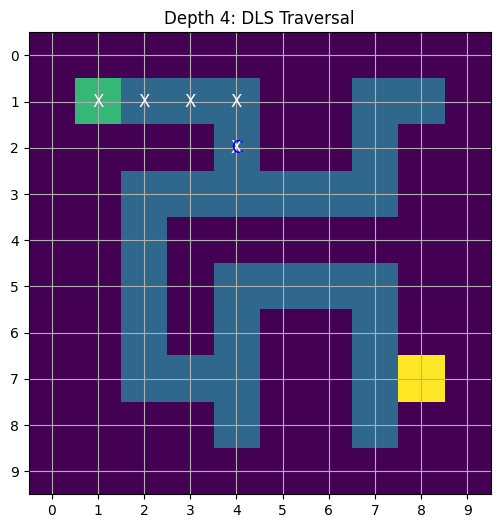

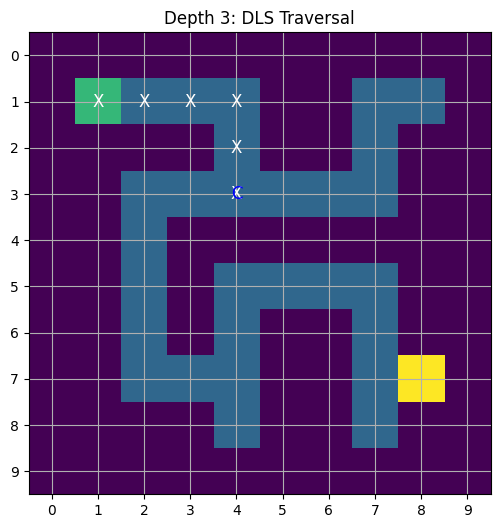

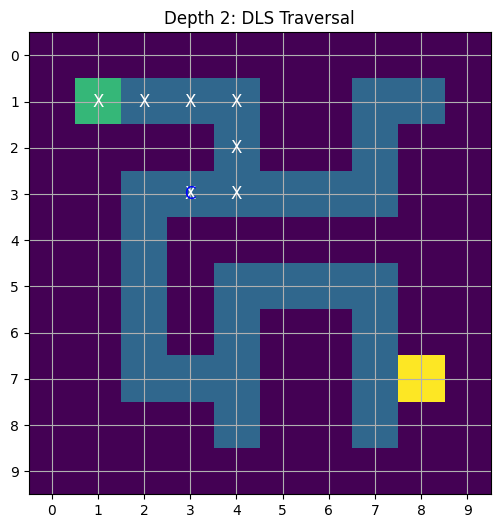

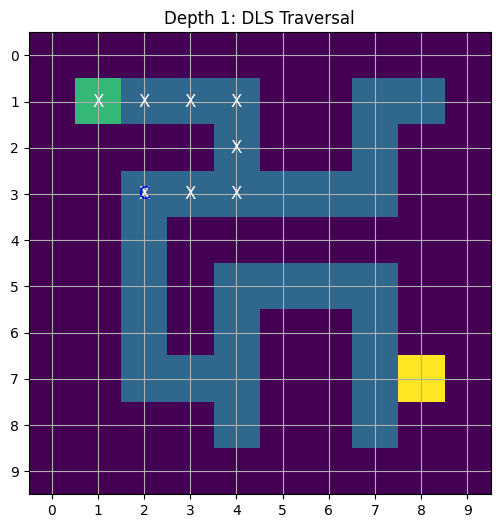

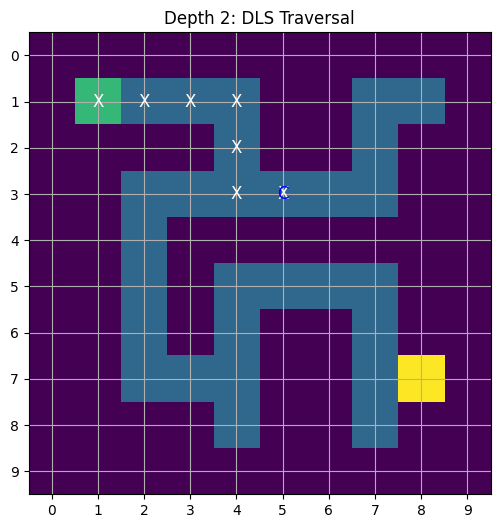

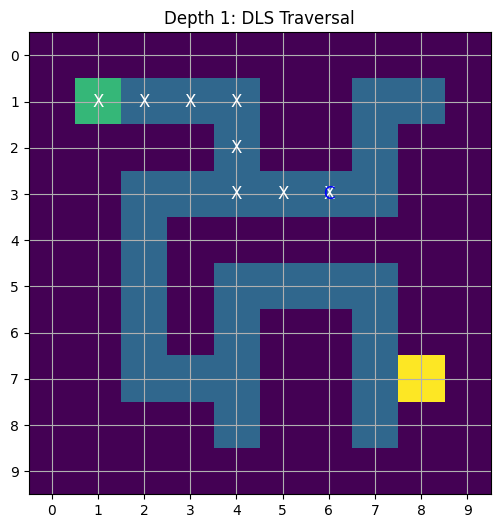

Searching with depth limit: 8


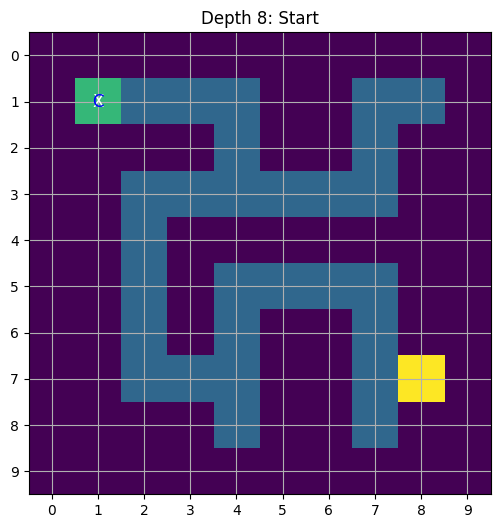

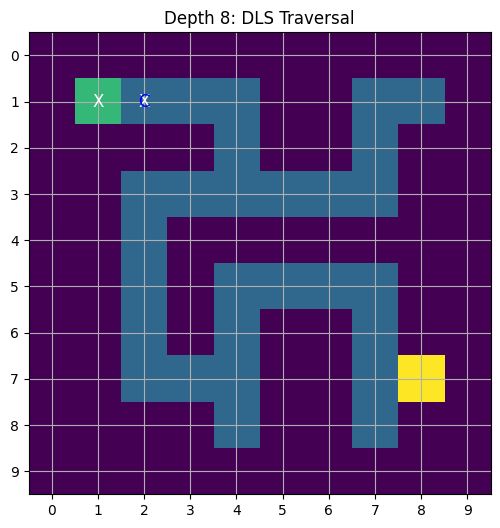

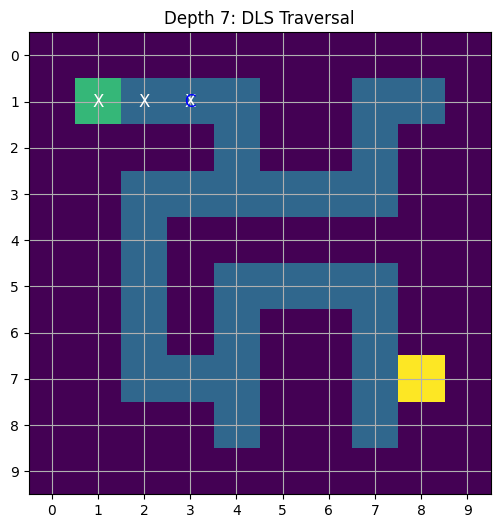

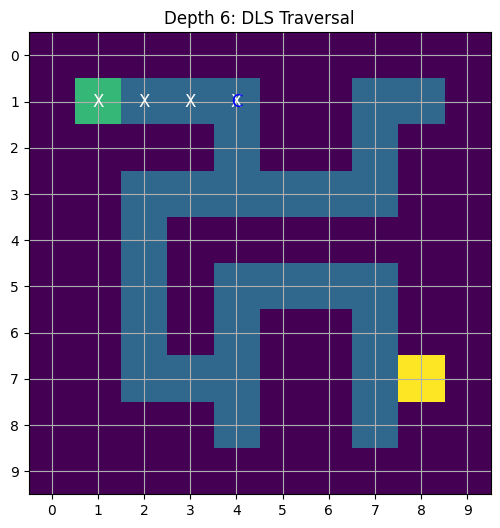

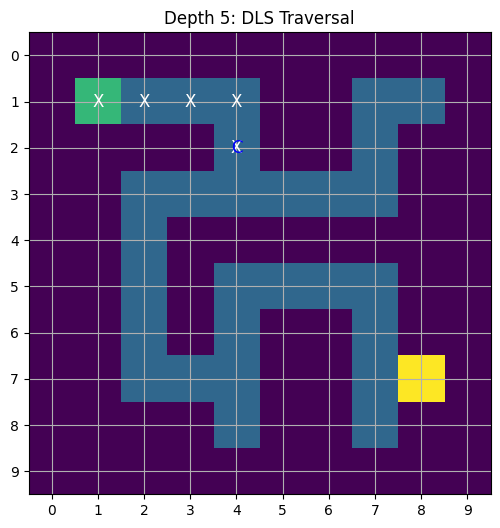

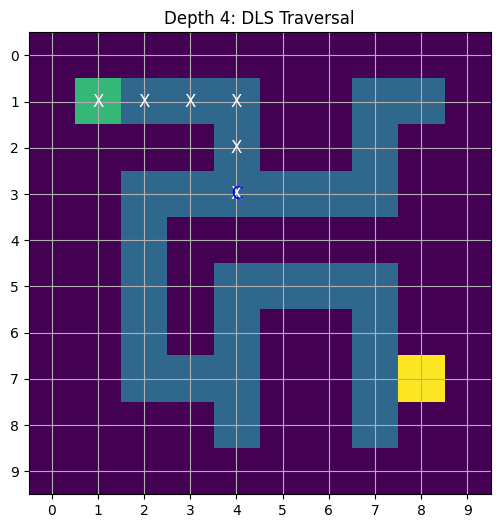

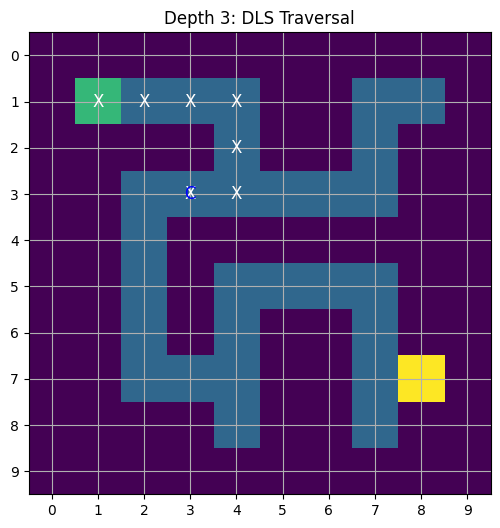

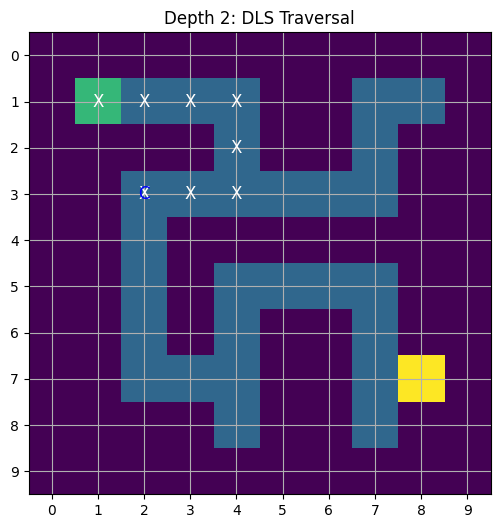

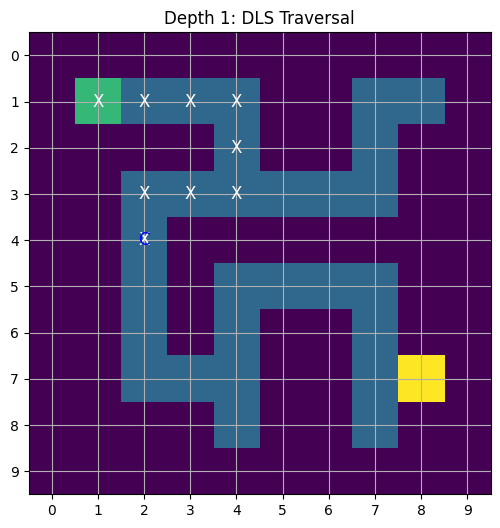

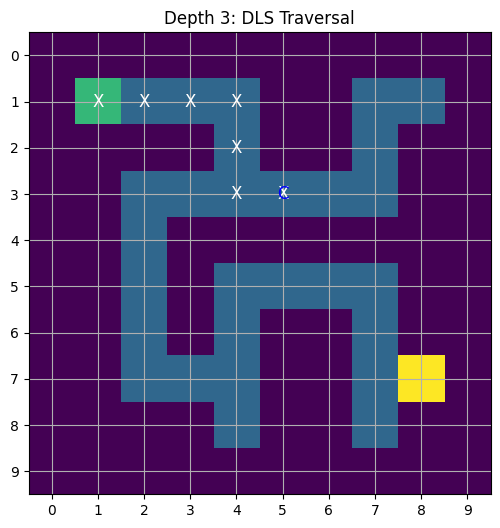

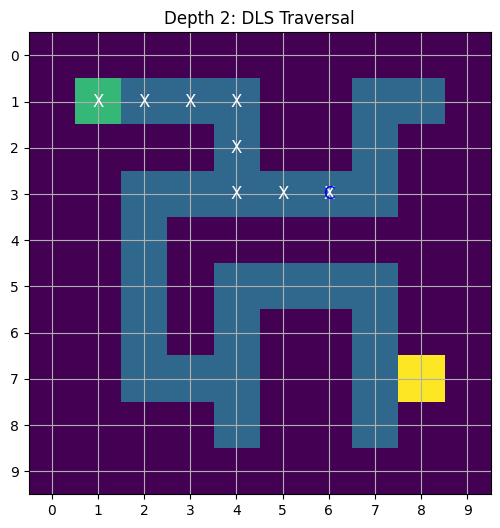

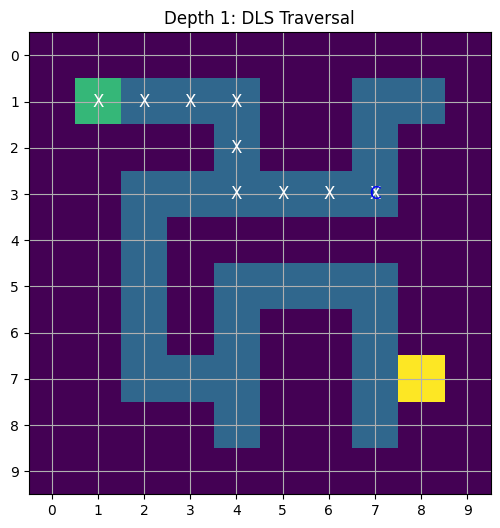

Searching with depth limit: 9


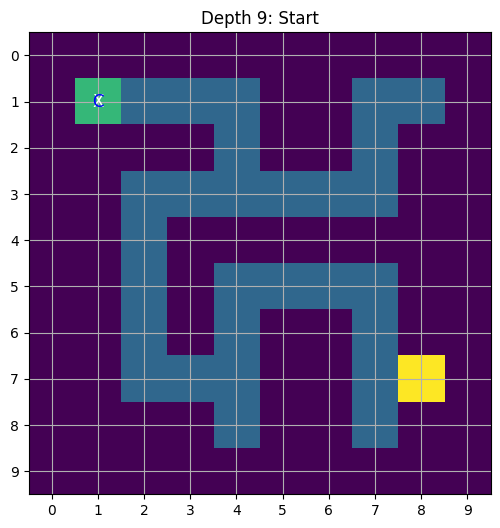

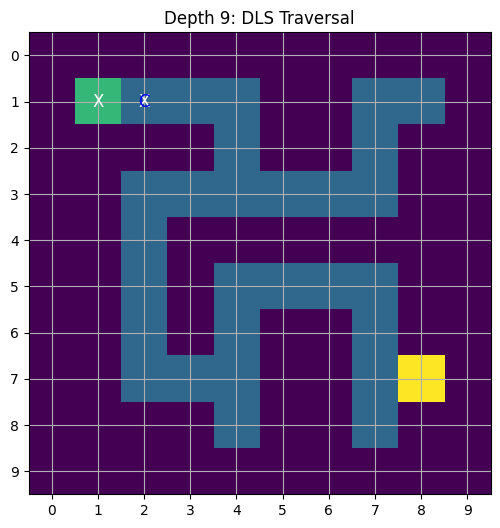

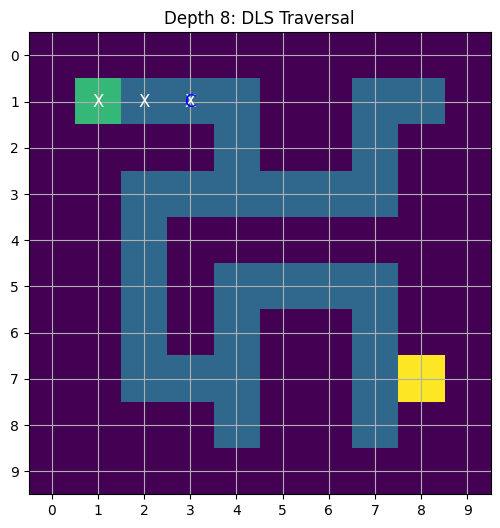

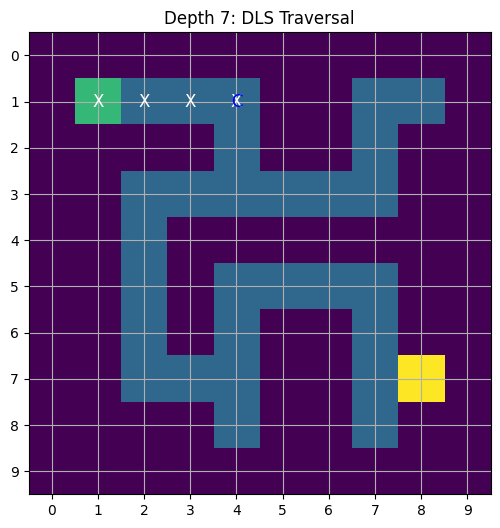

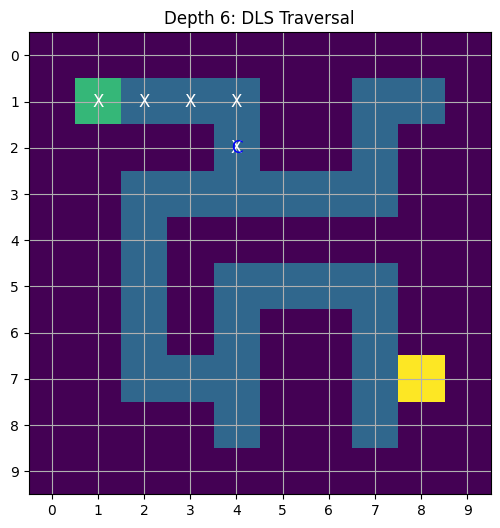

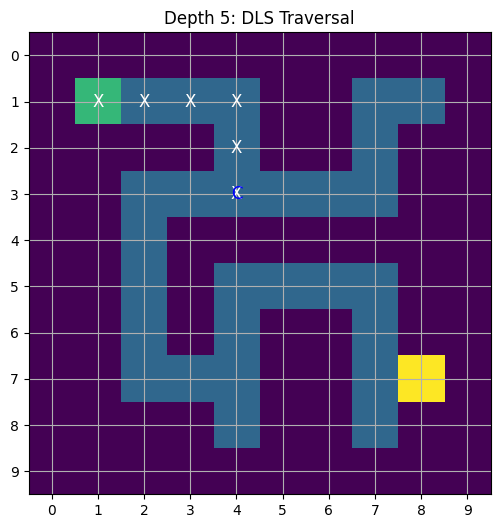

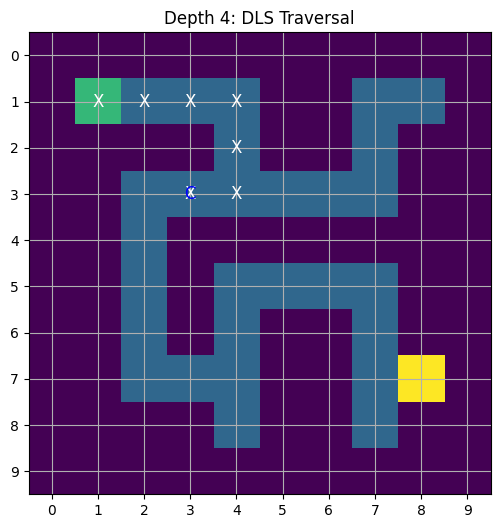

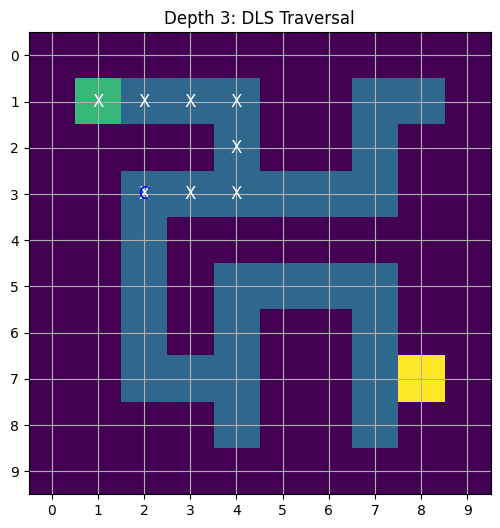

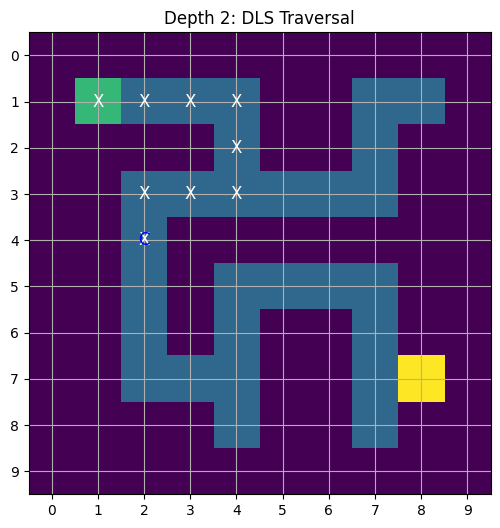

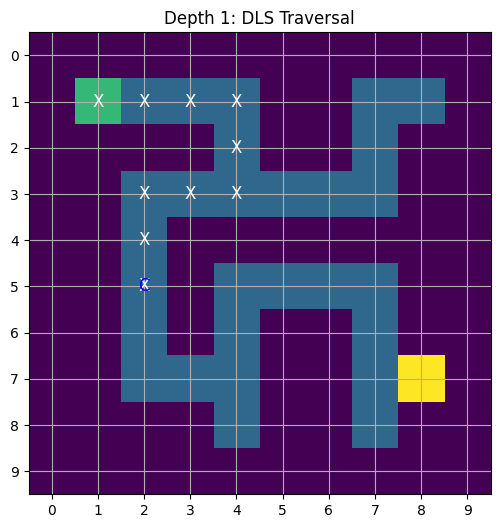

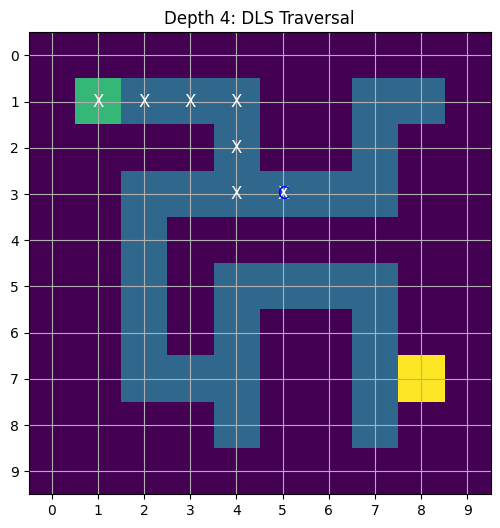

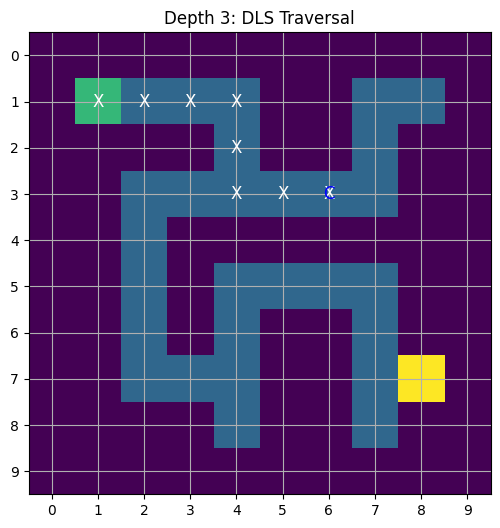

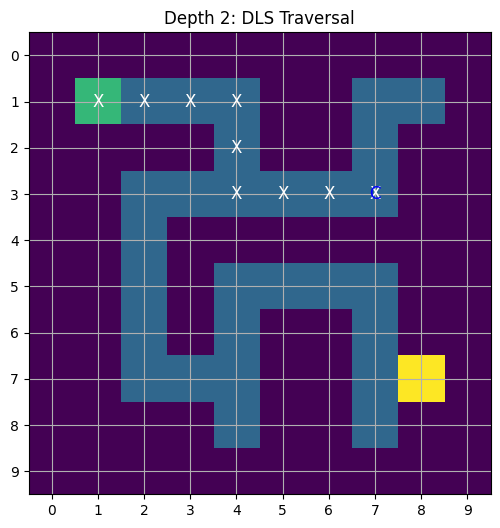

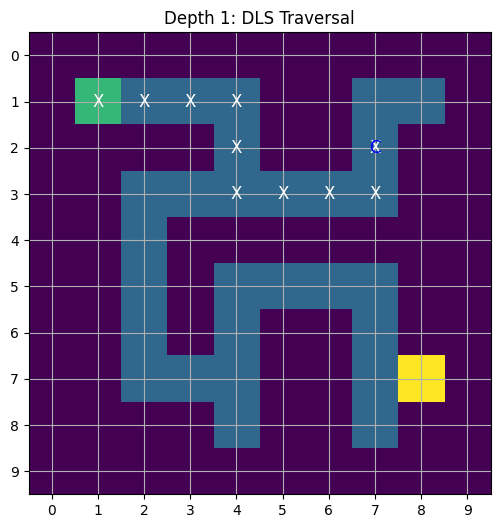

Searching with depth limit: 10


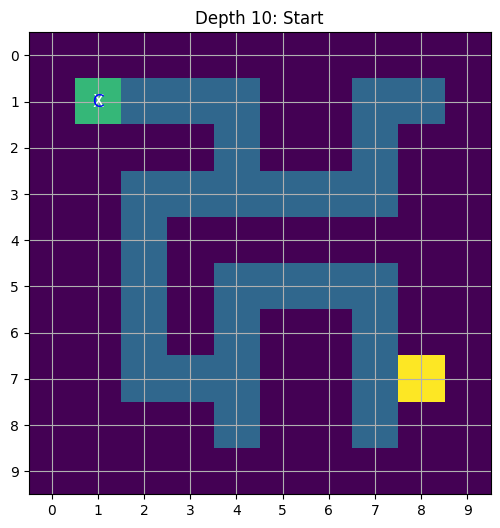

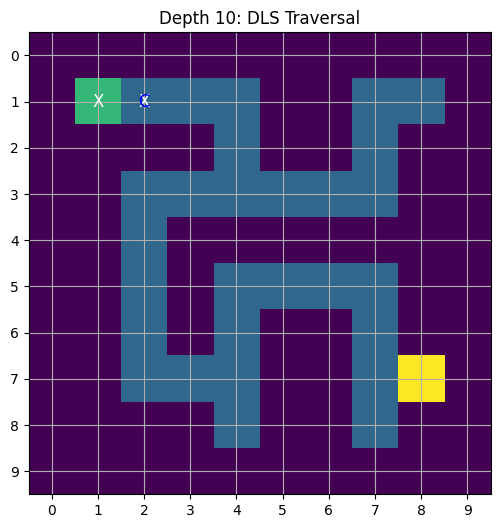

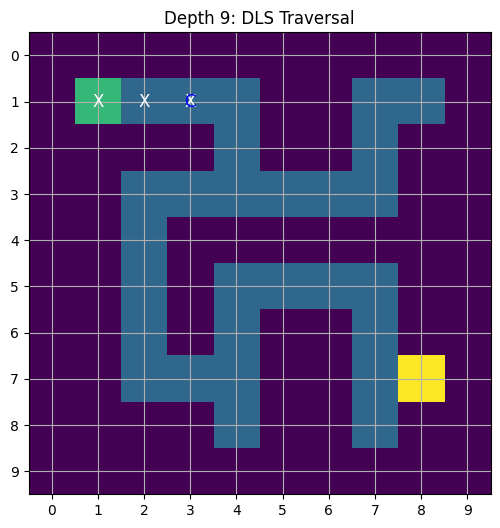

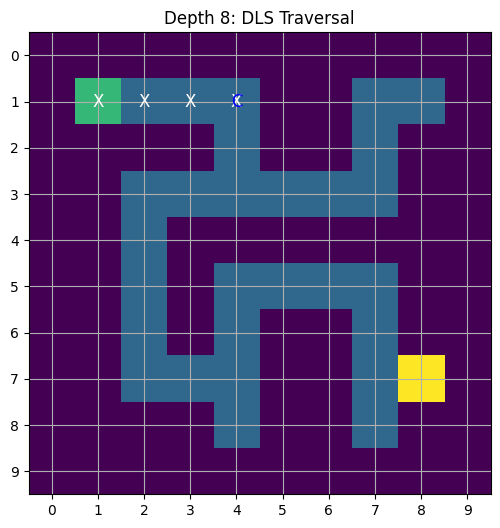

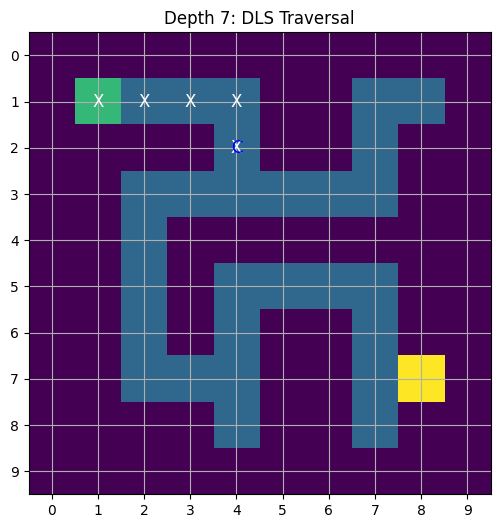

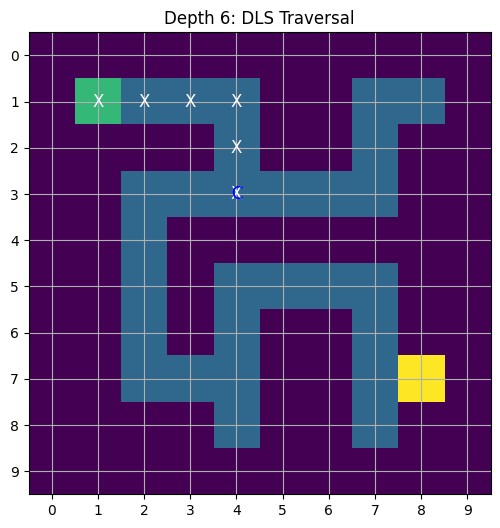

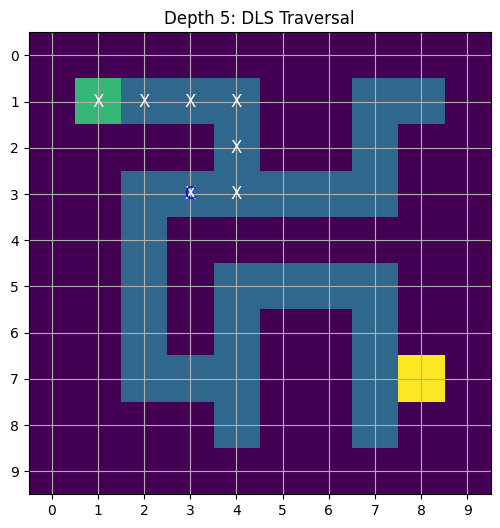

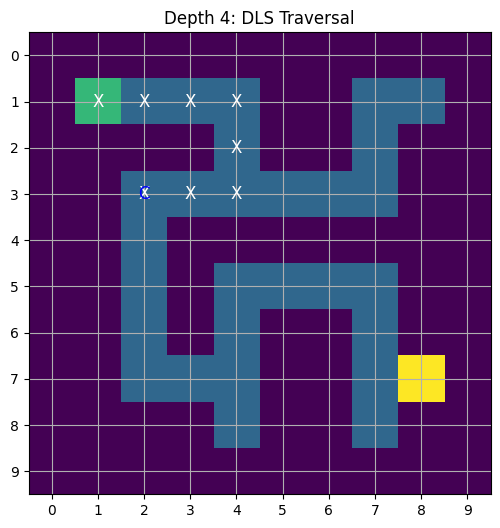

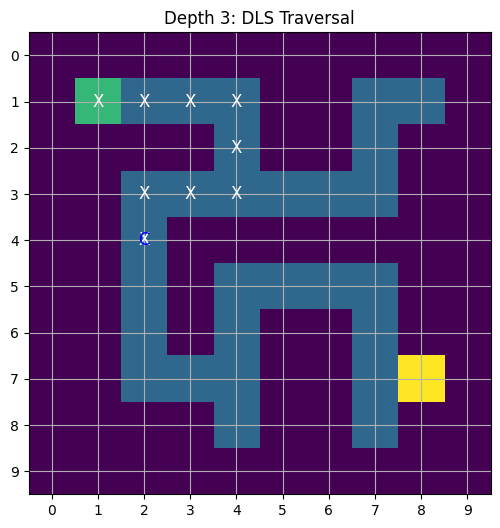

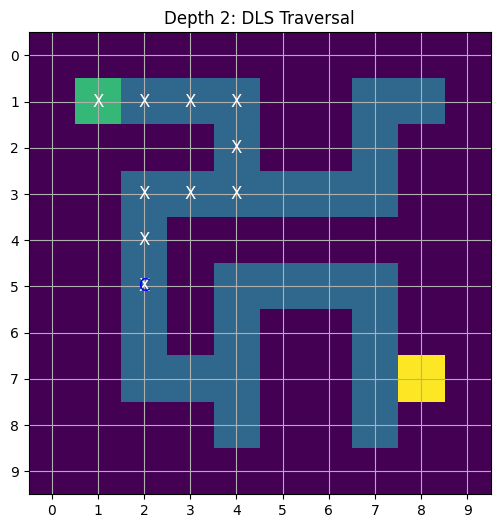

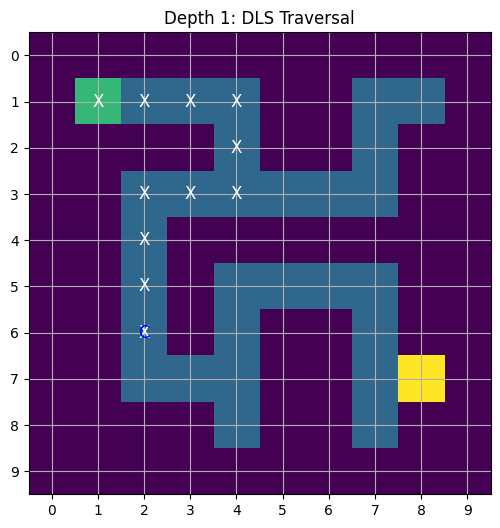

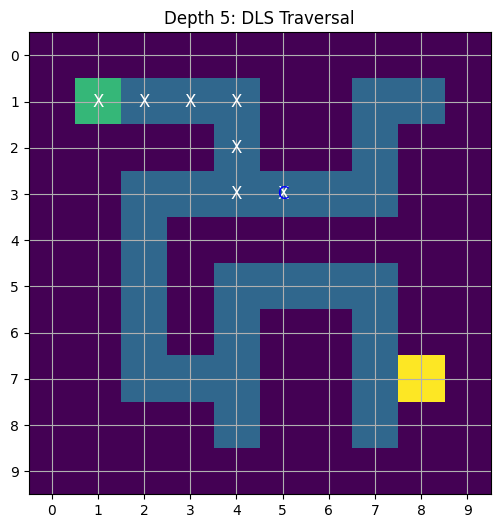

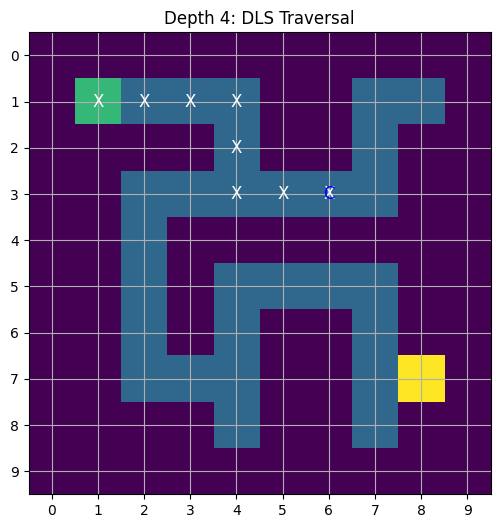

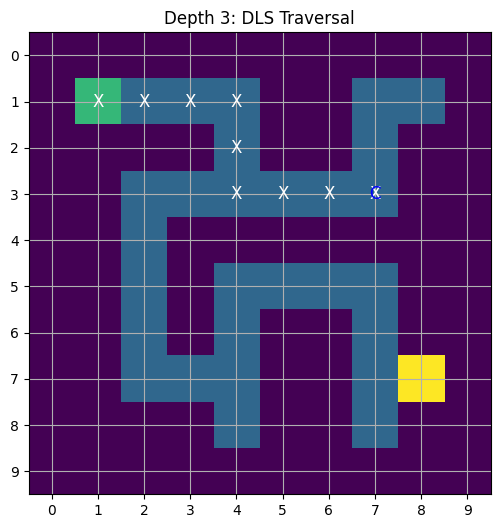

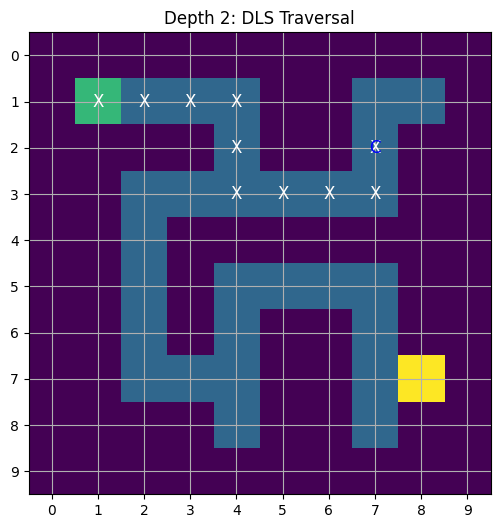

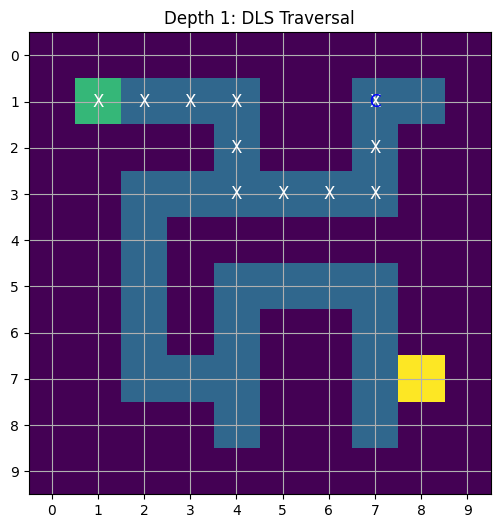

Searching with depth limit: 11


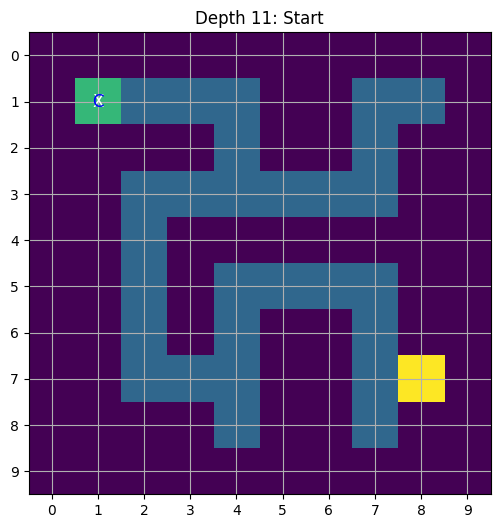

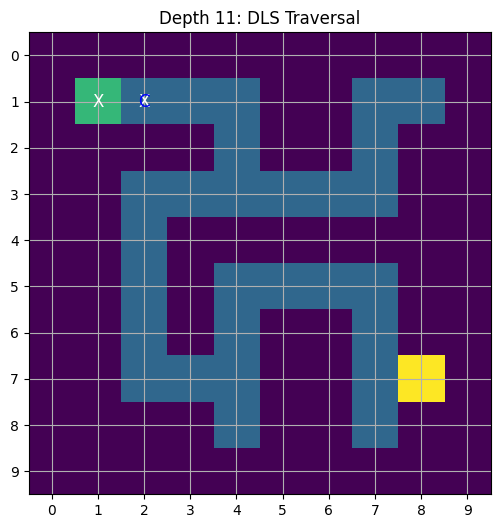

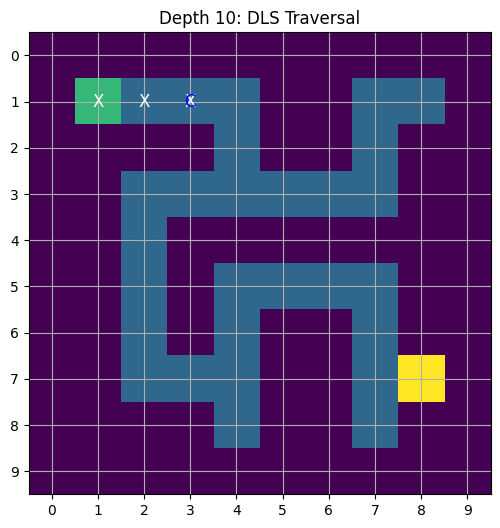

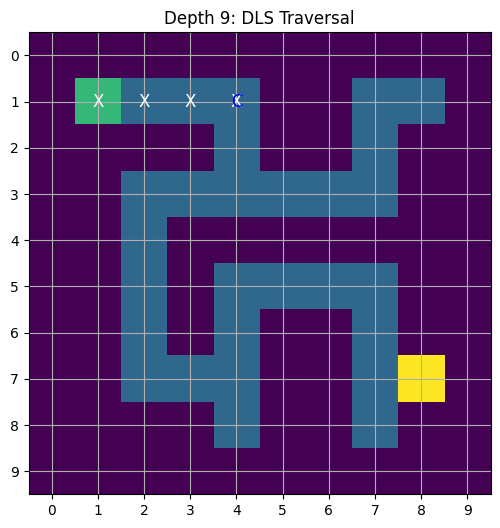

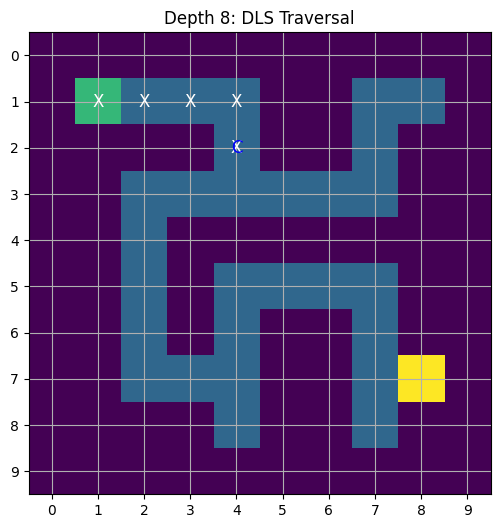

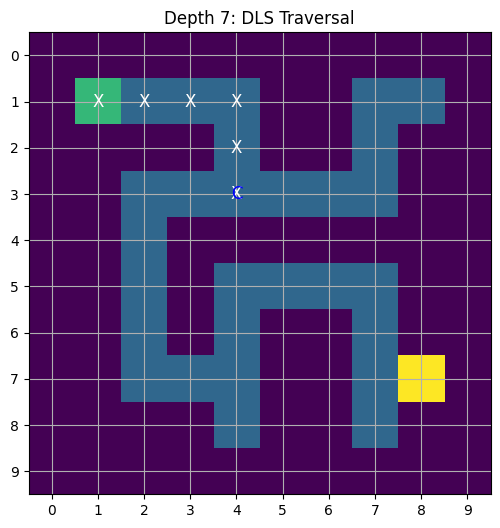

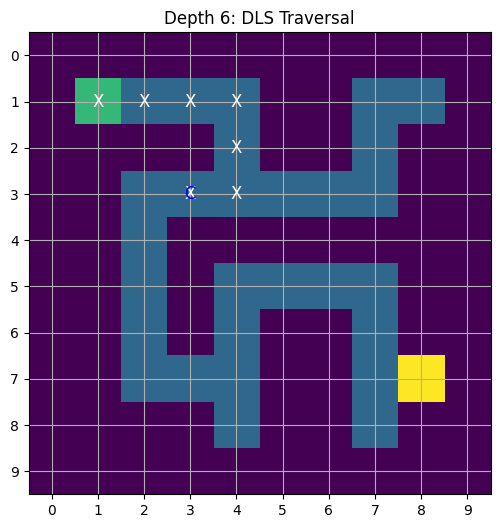

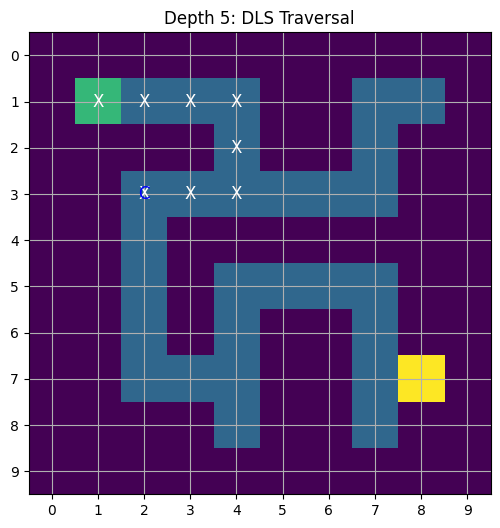

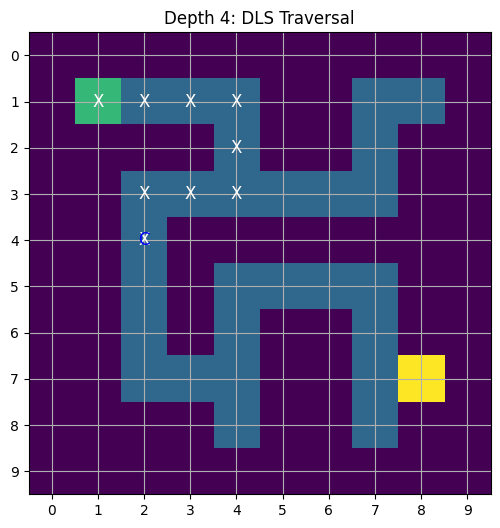

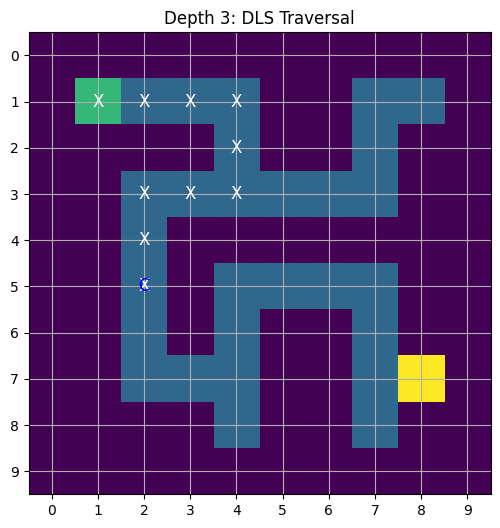

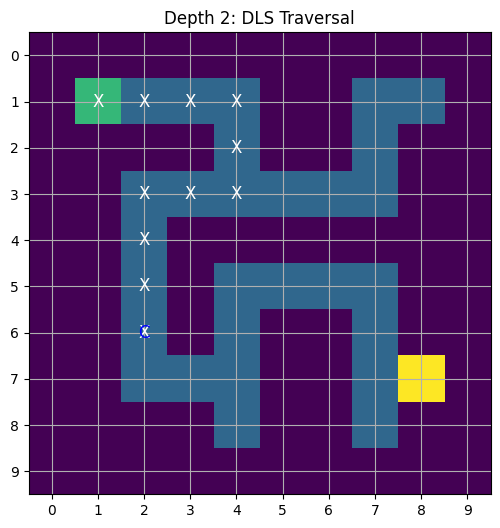

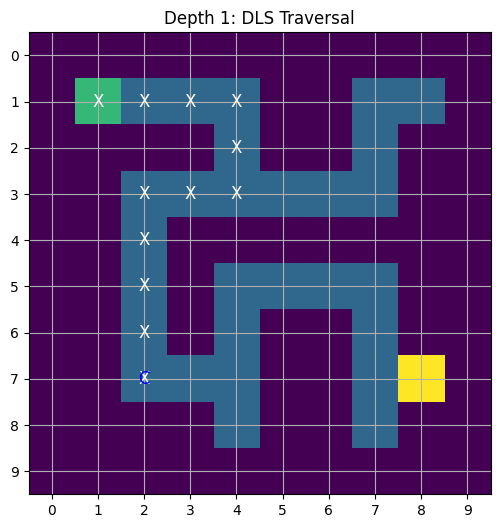

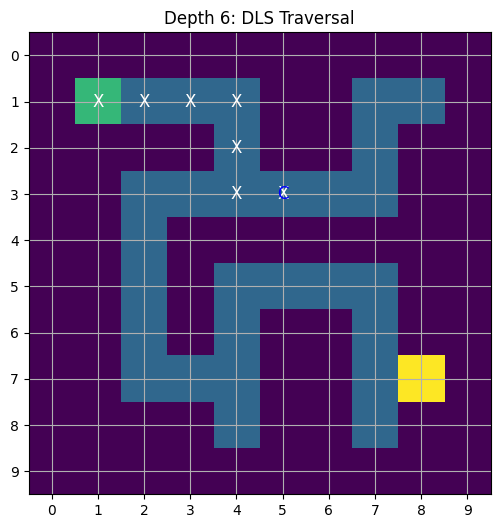

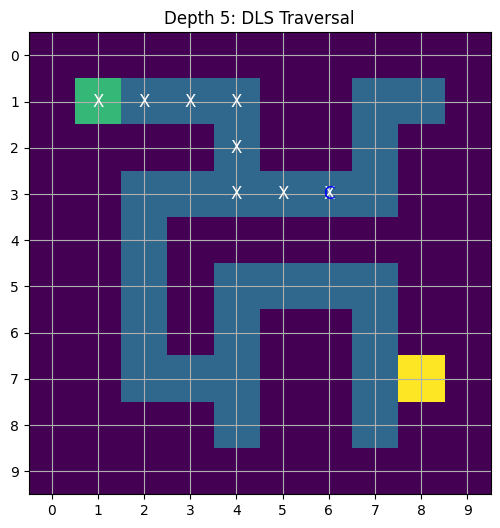

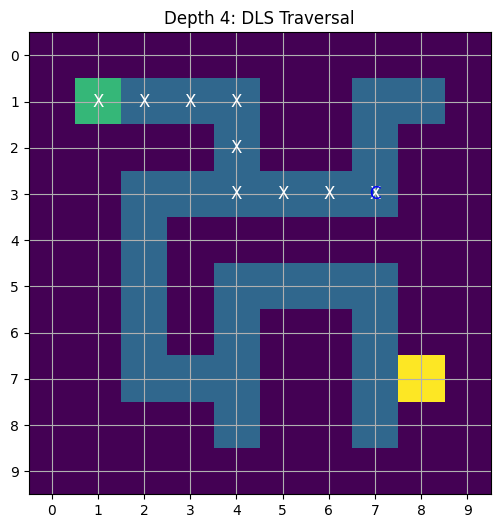

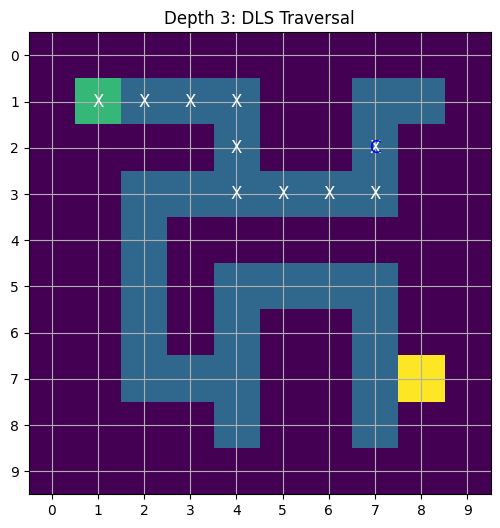

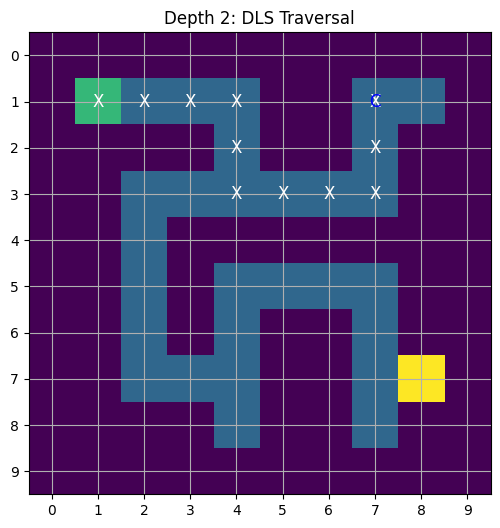

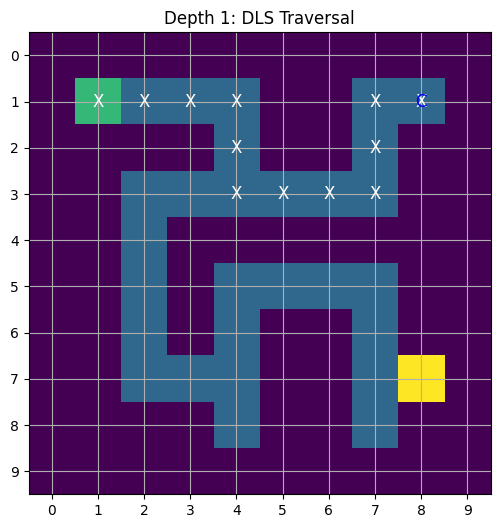

Searching with depth limit: 12


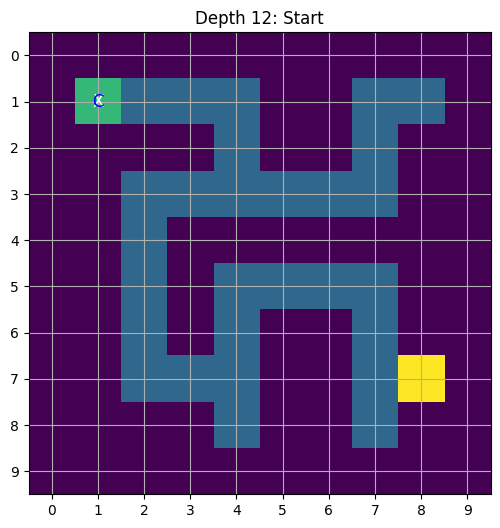

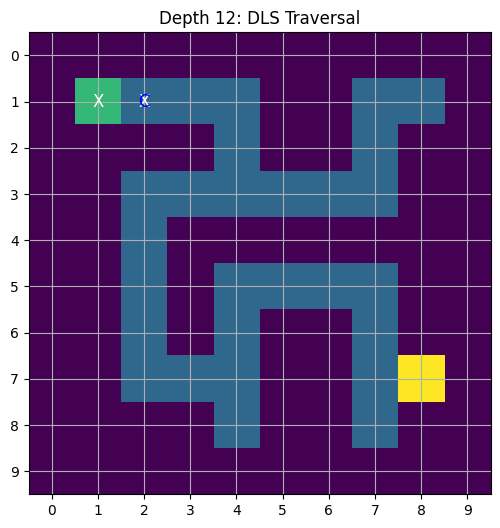

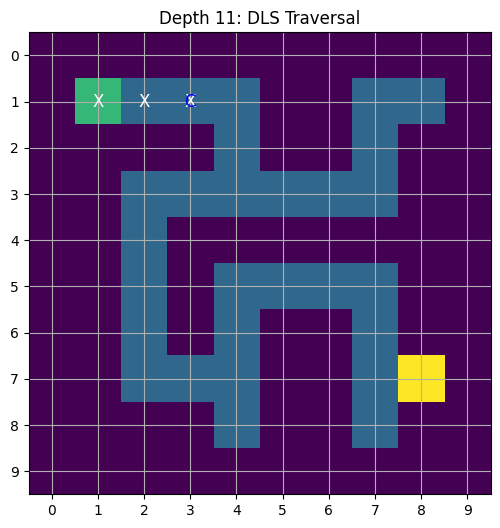

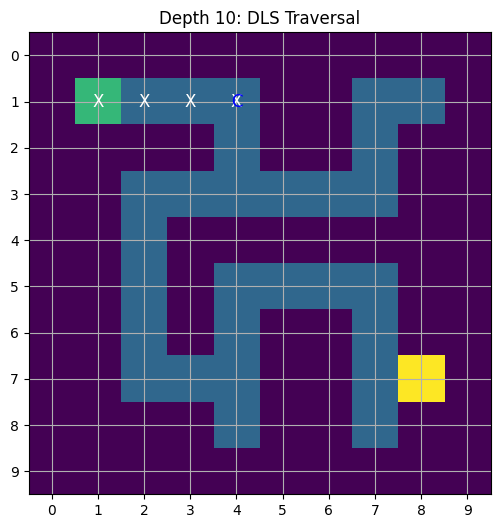

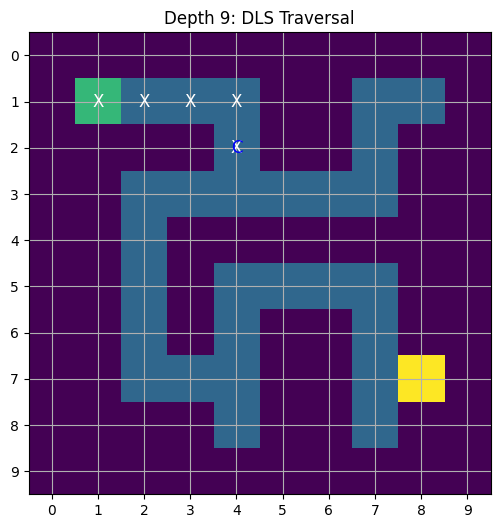

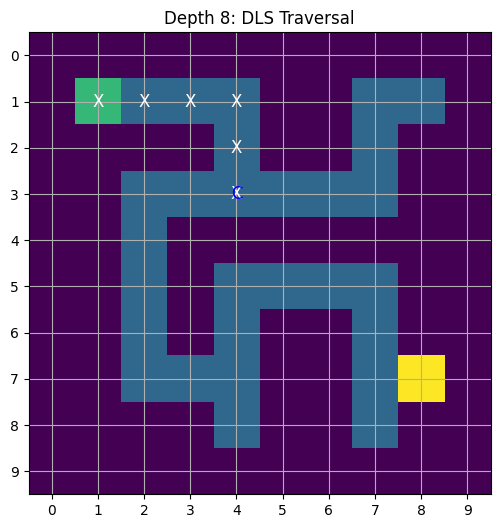

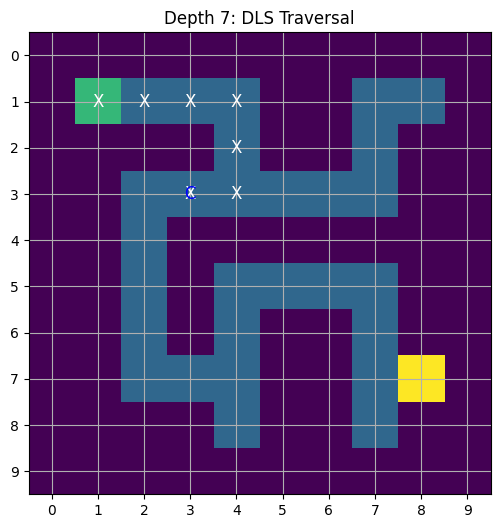

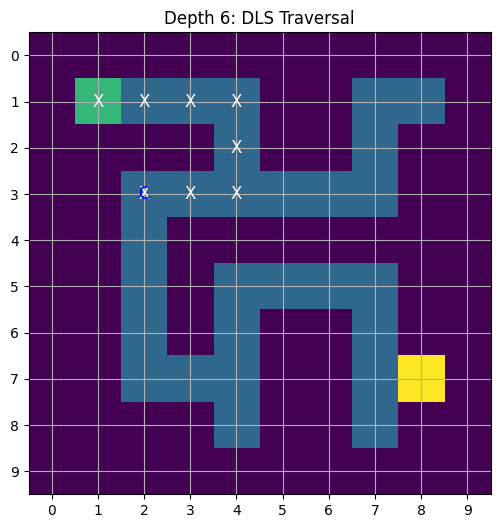

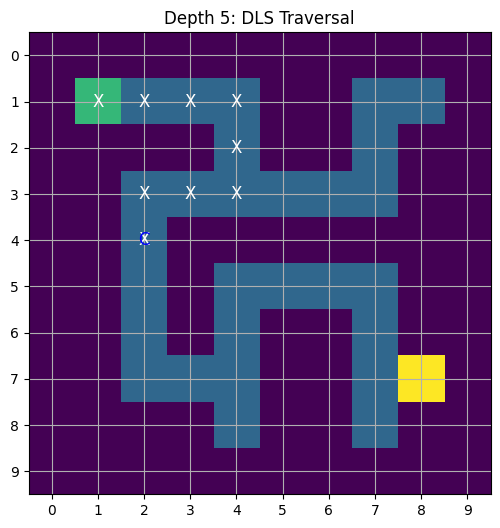

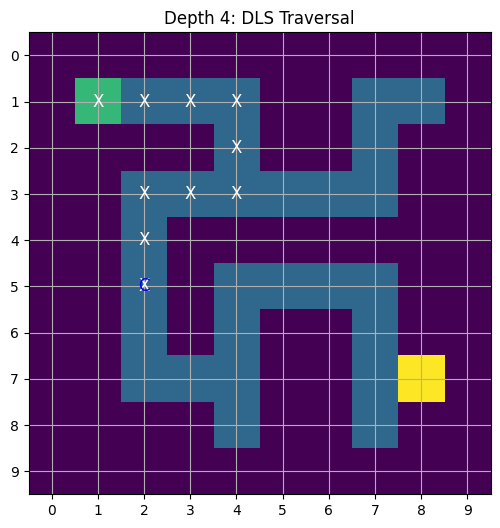

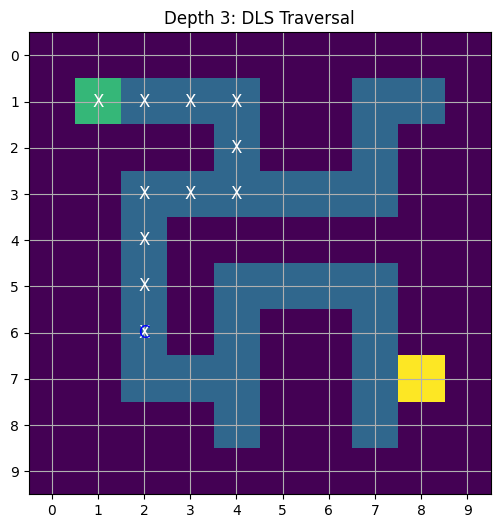

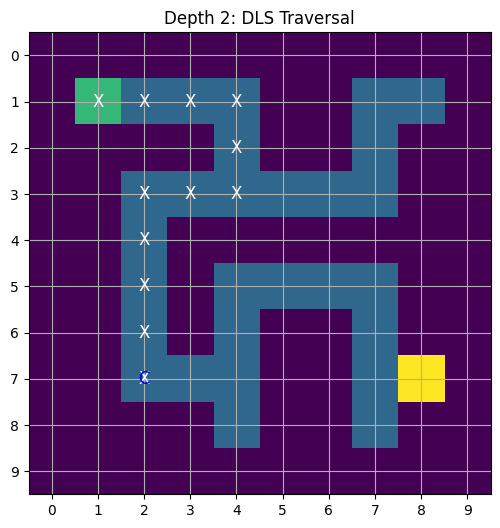

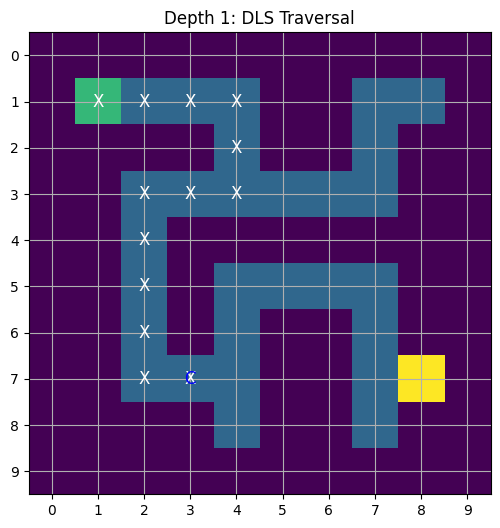

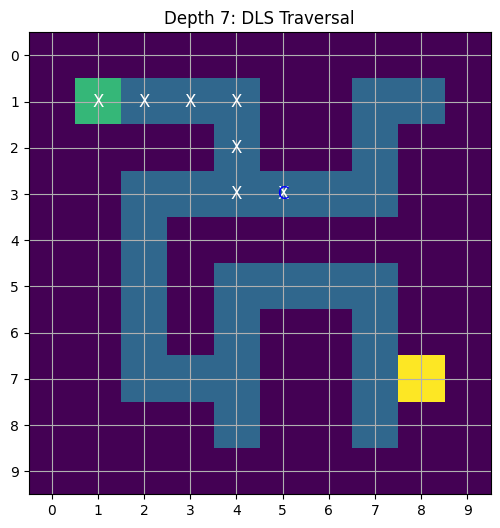

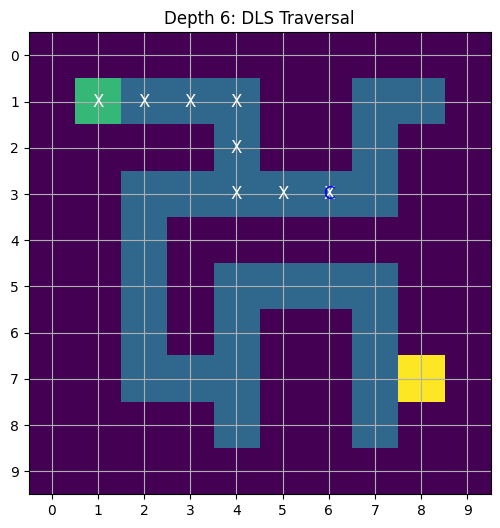

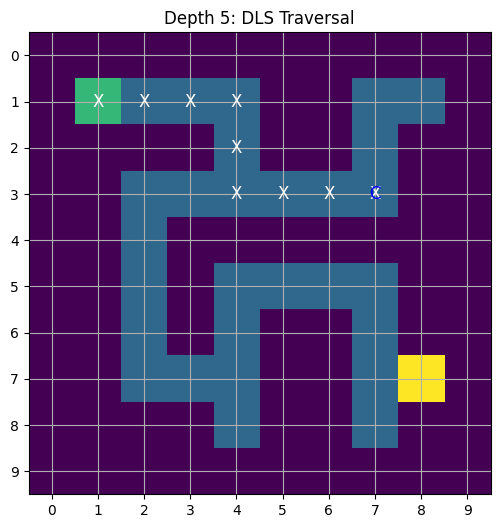

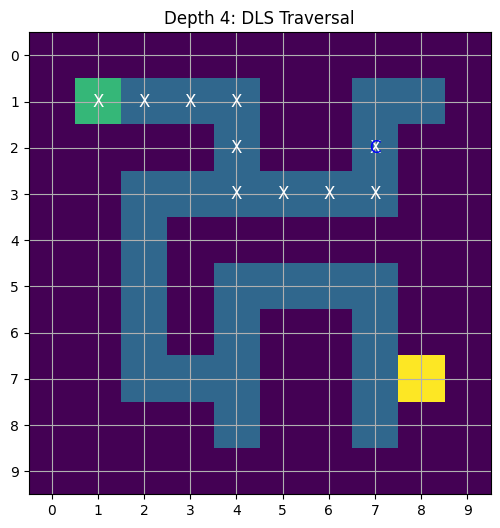

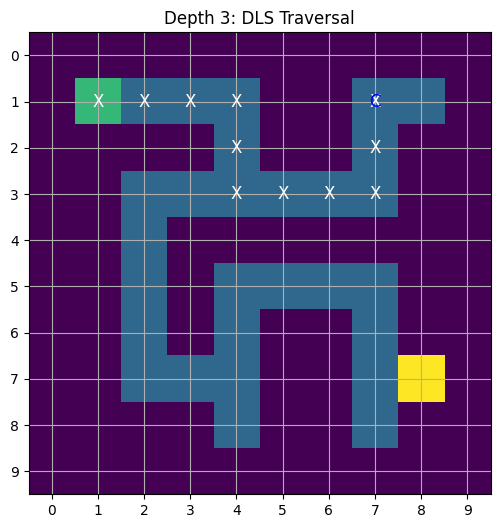

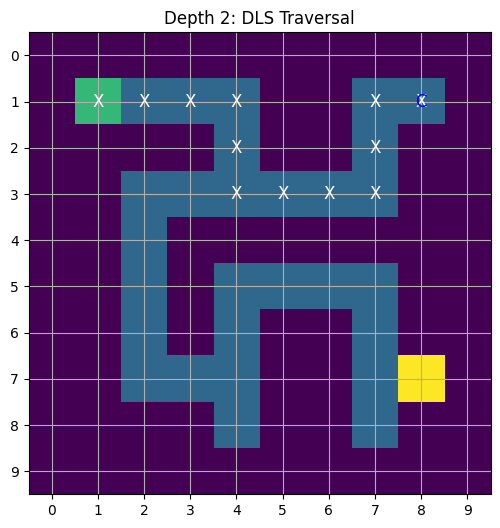

Searching with depth limit: 13


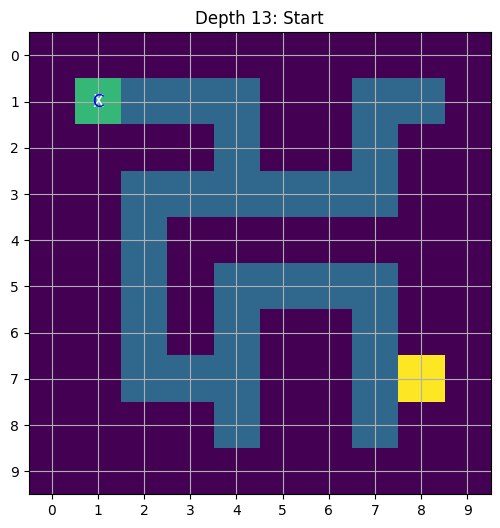

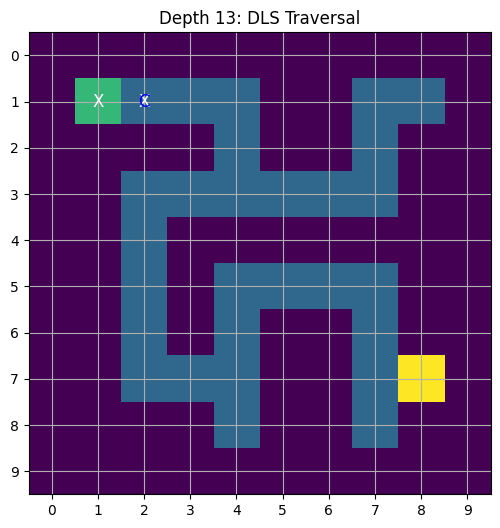

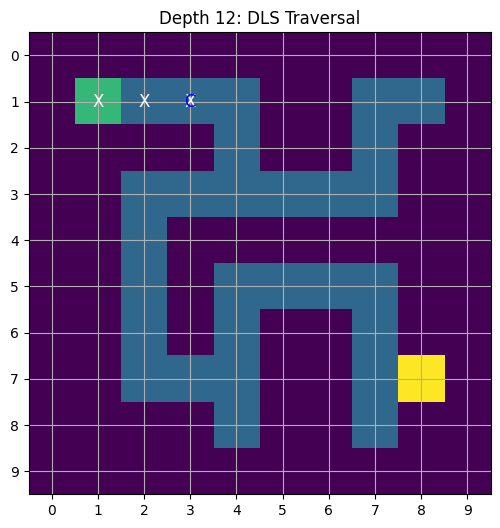

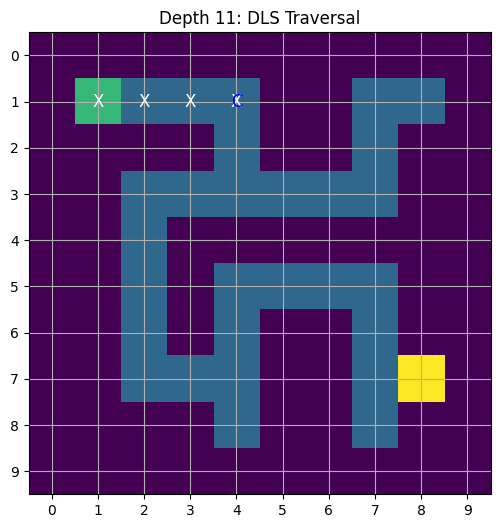

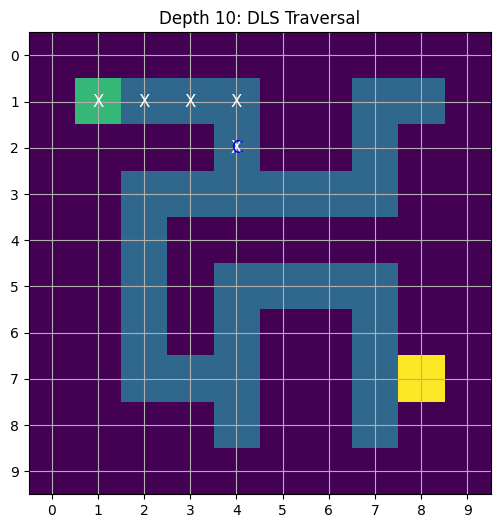

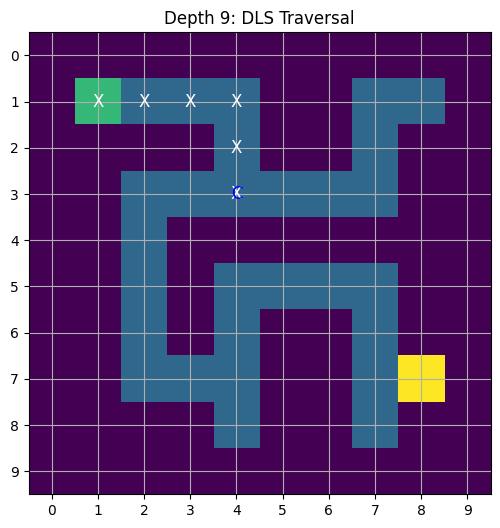

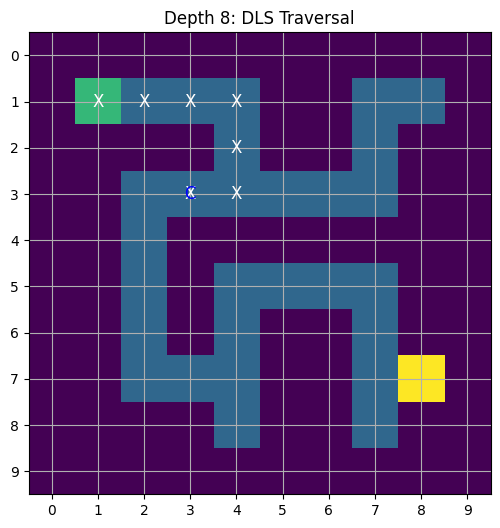

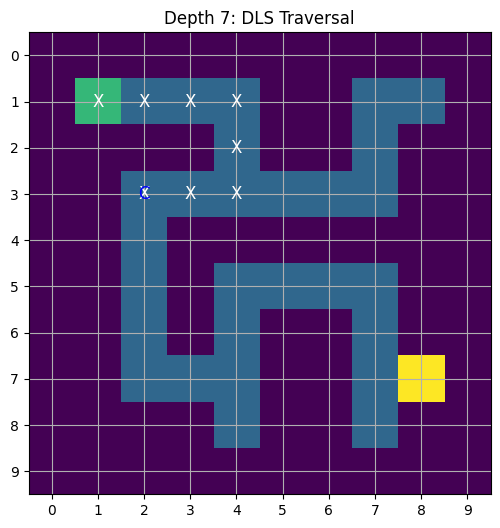

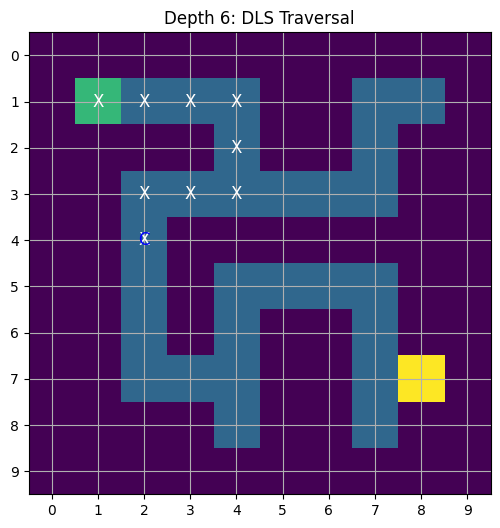

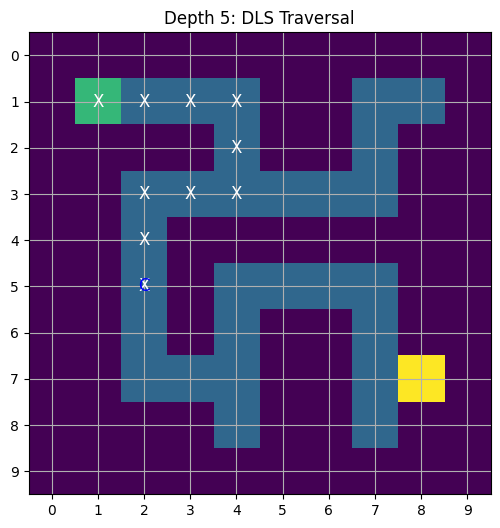

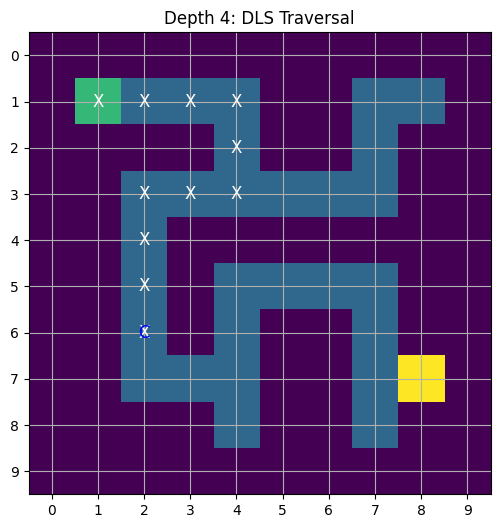

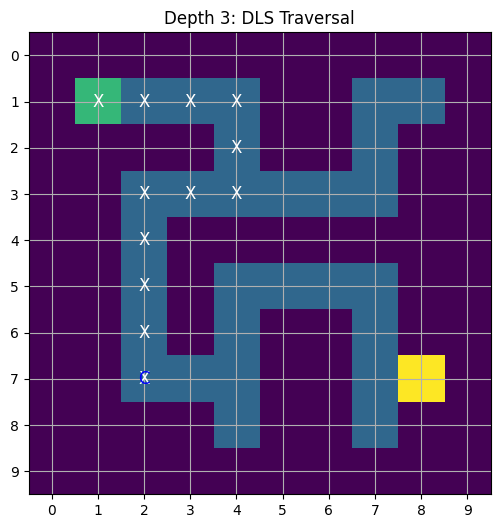

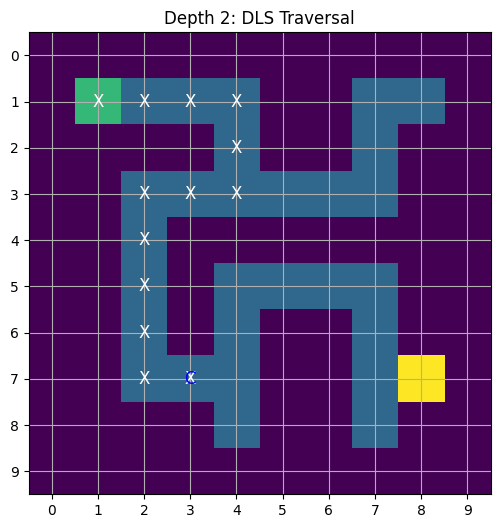

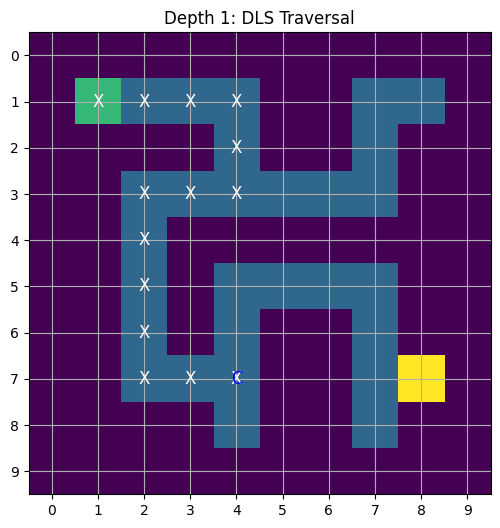

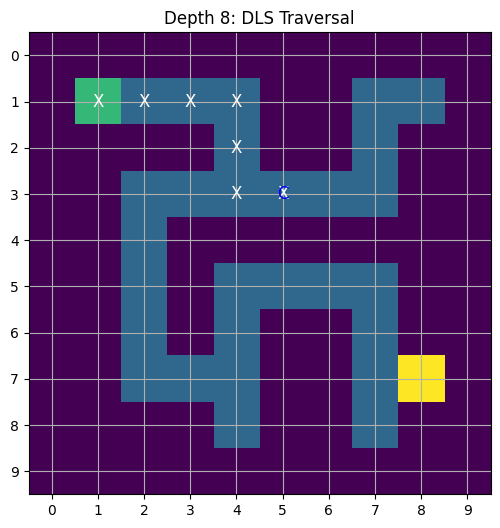

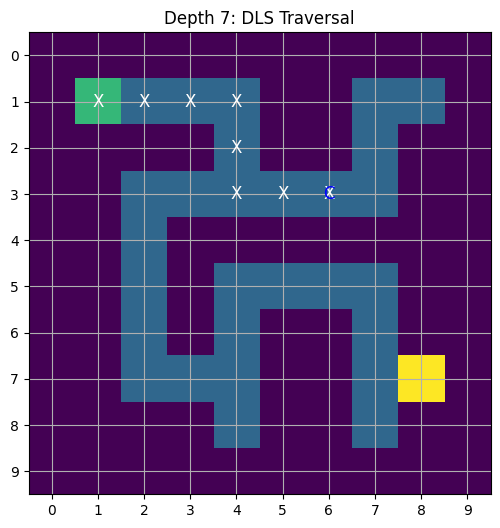

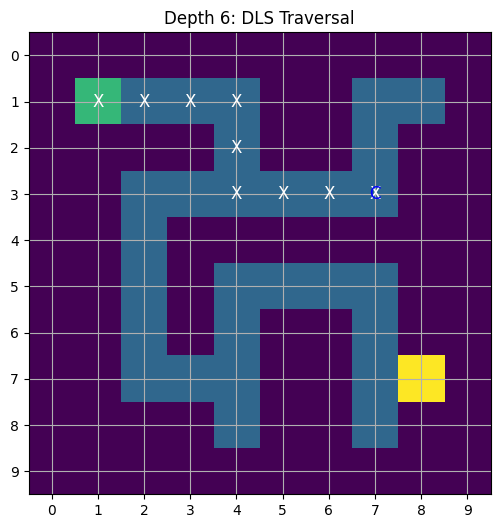

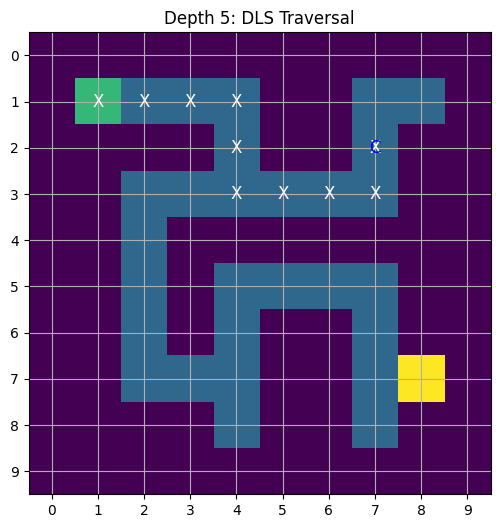

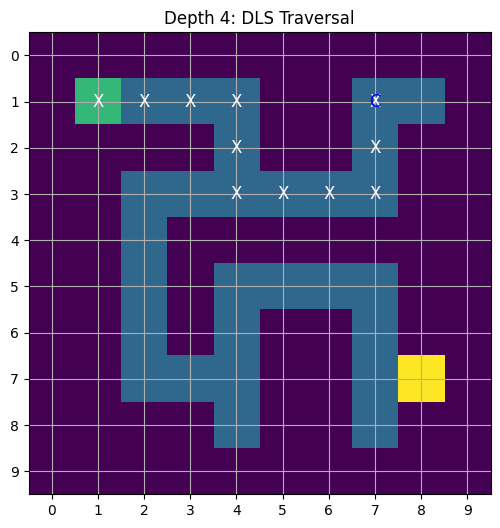

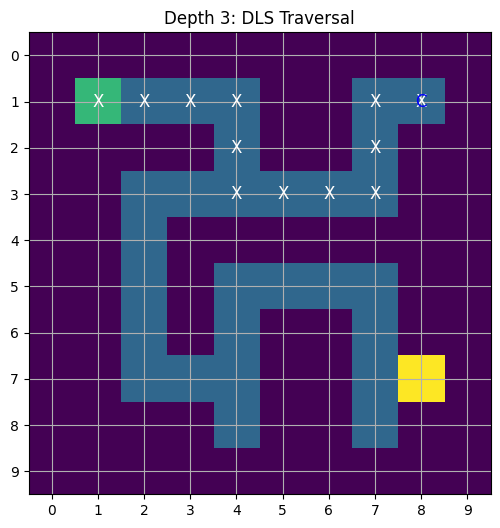

Searching with depth limit: 14


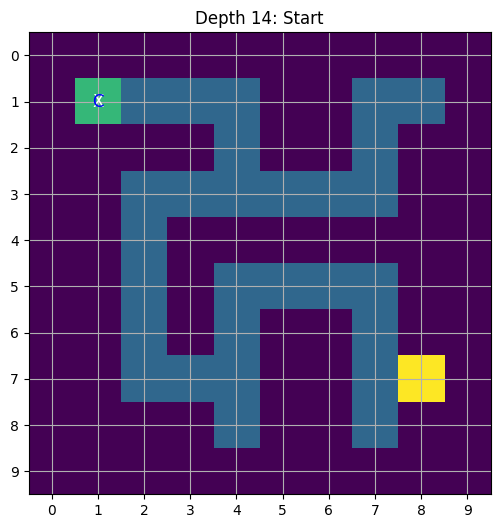

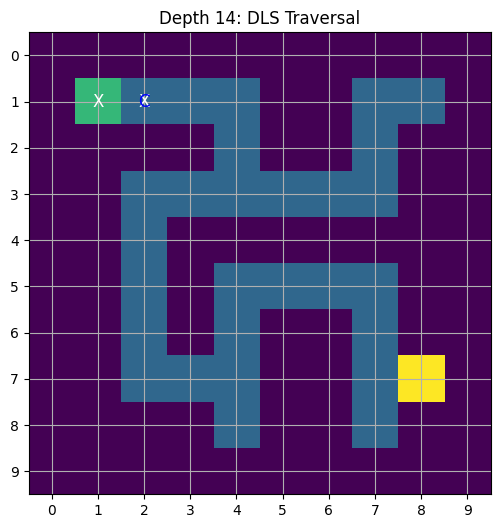

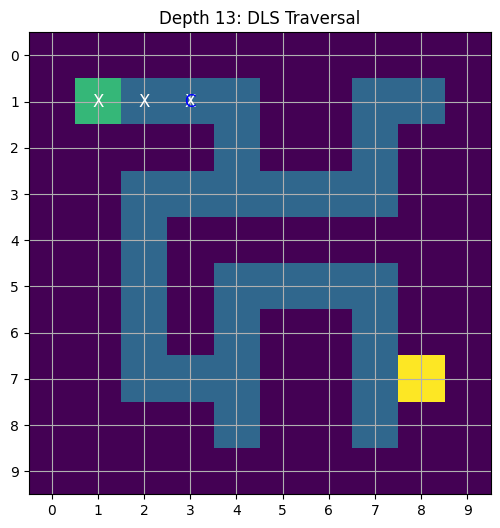

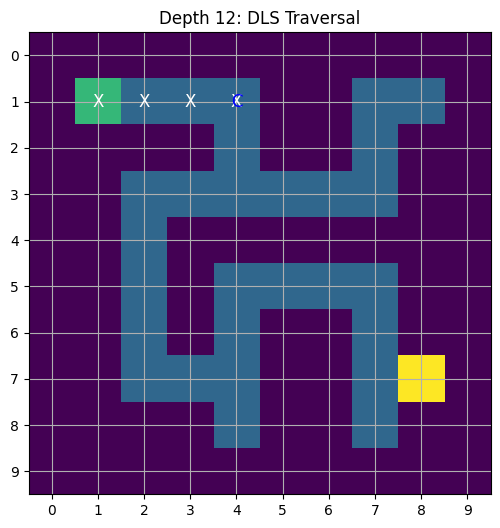

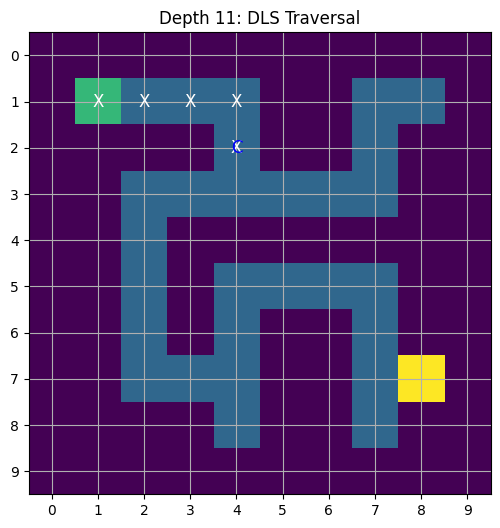

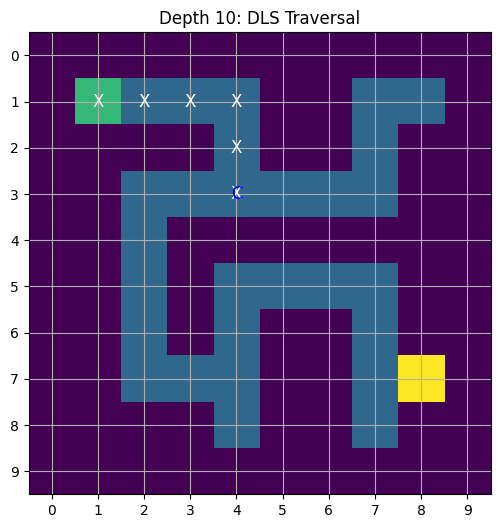

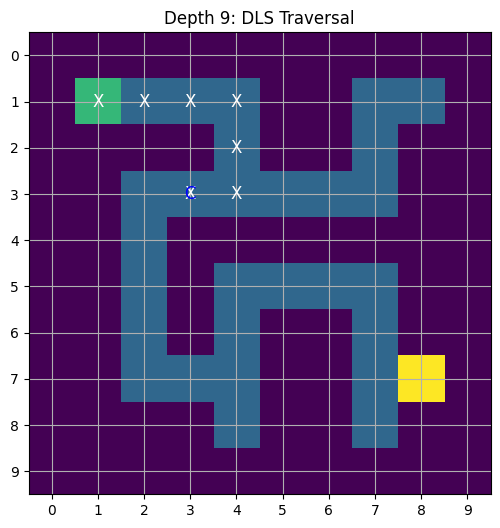

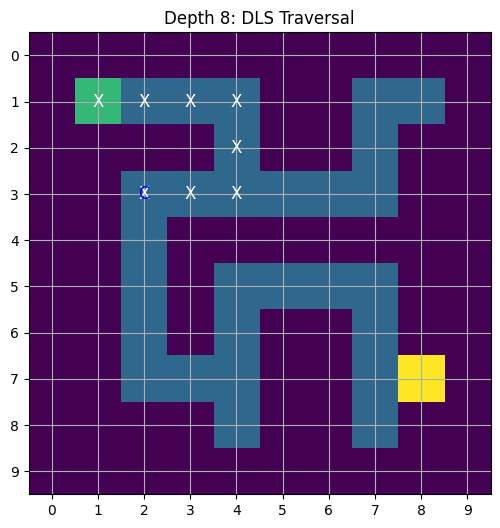

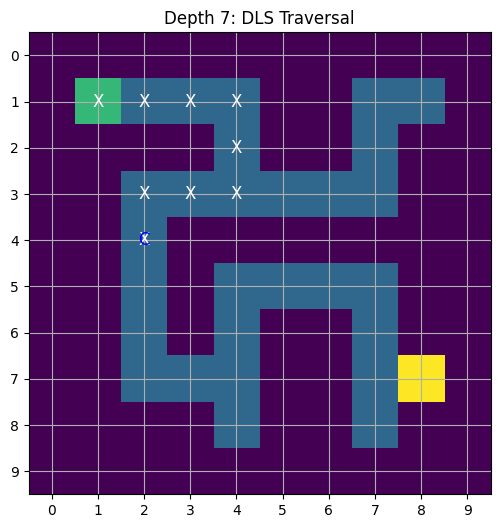

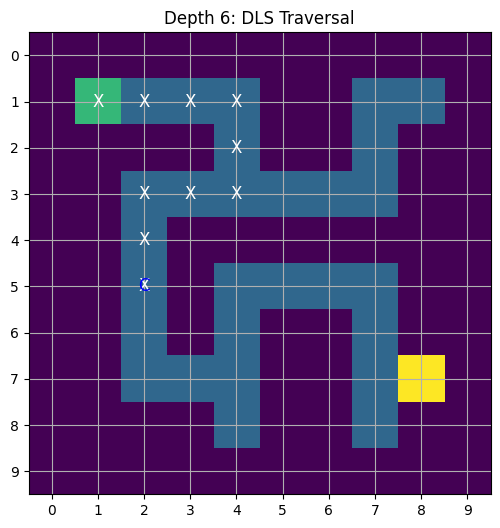

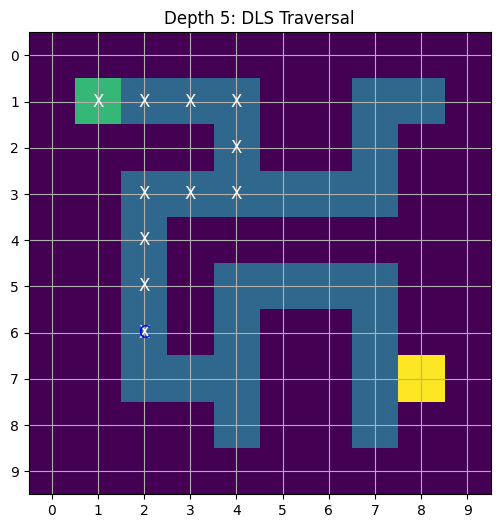

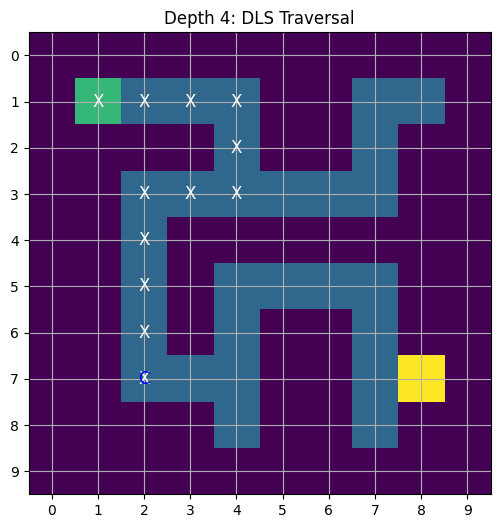

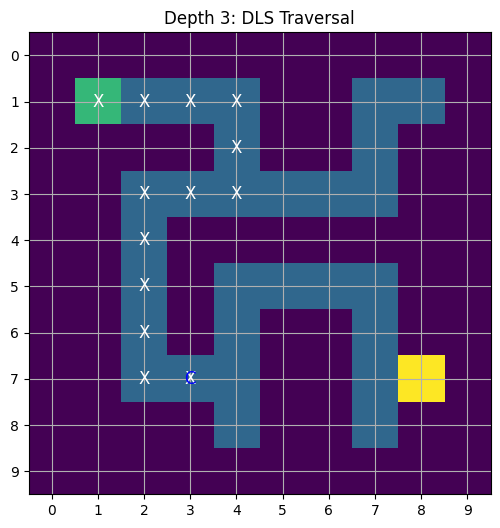

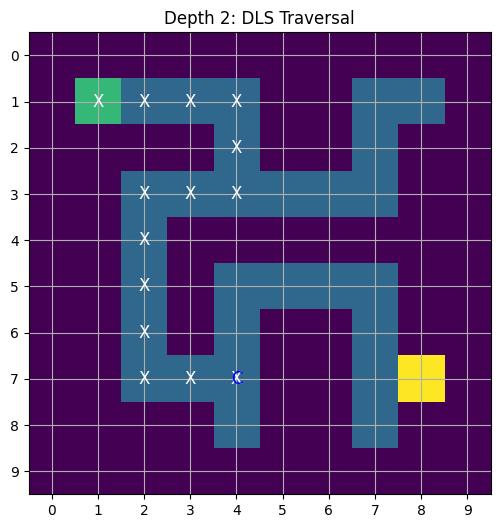

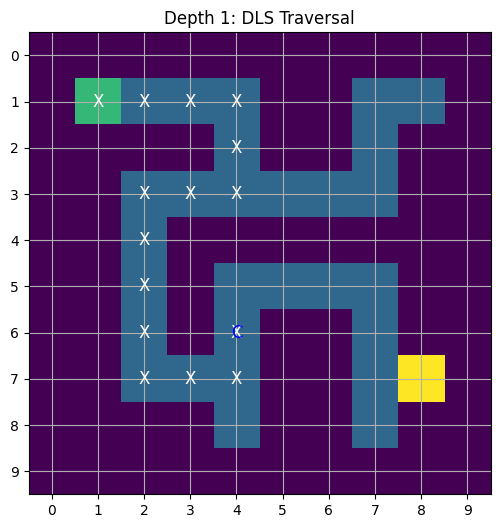

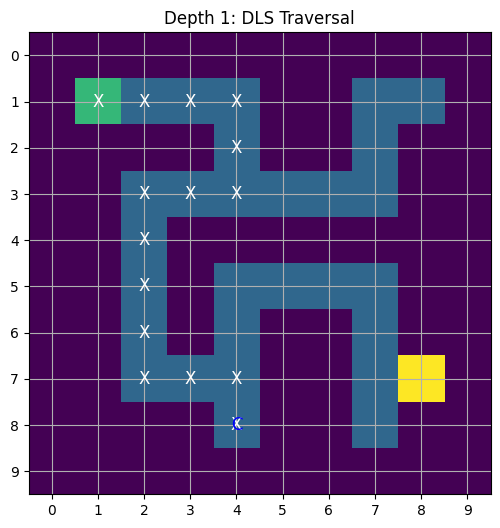

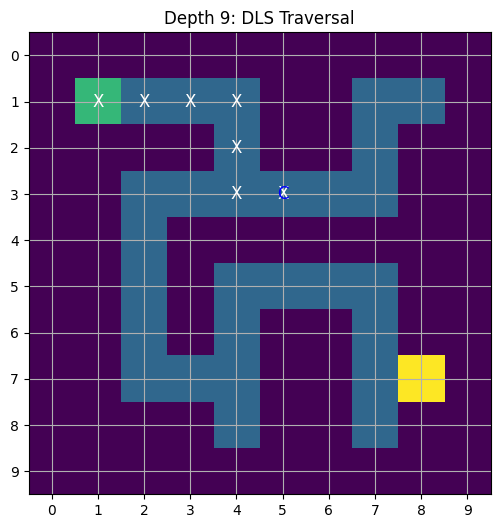

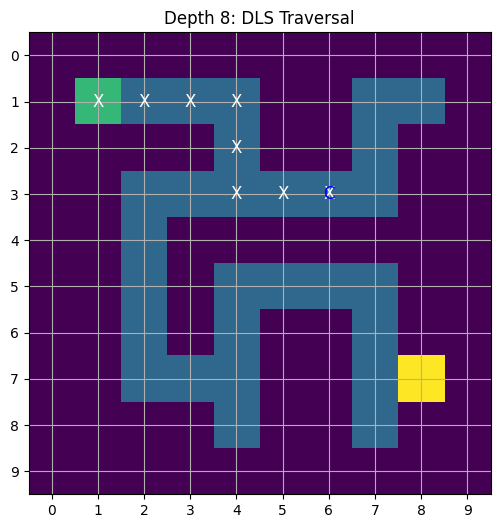

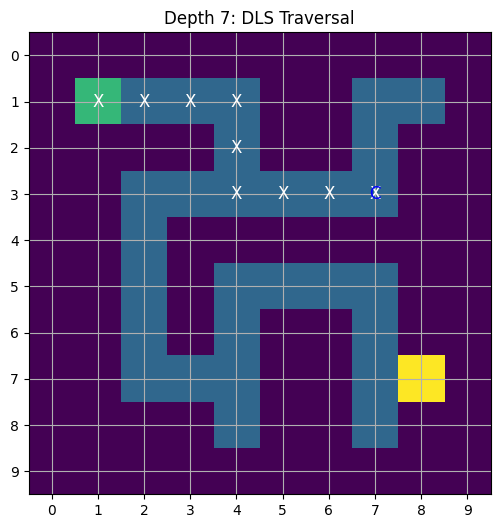

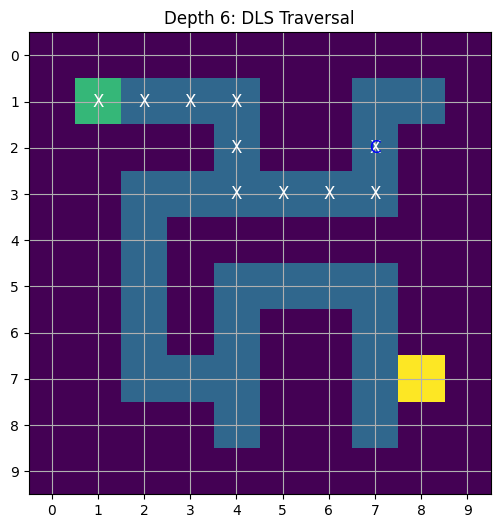

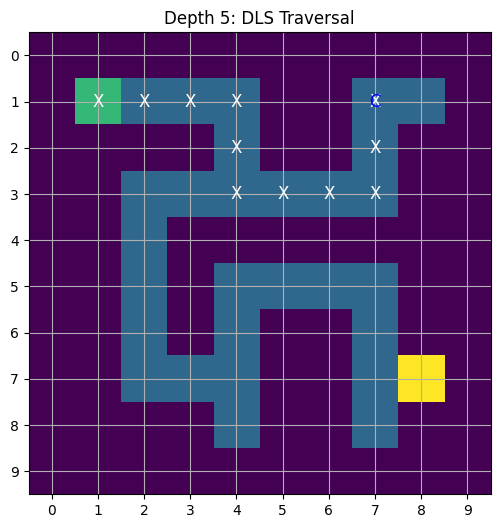

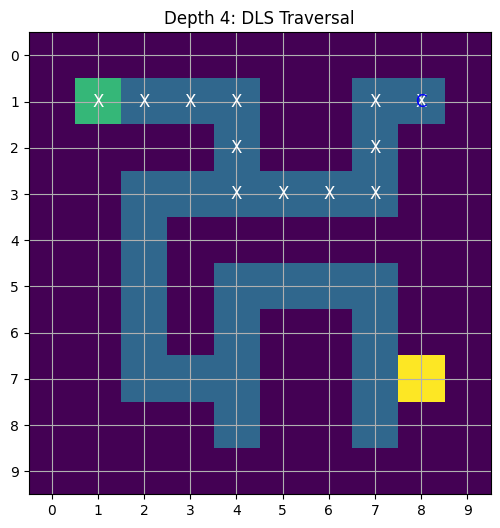

Searching with depth limit: 15


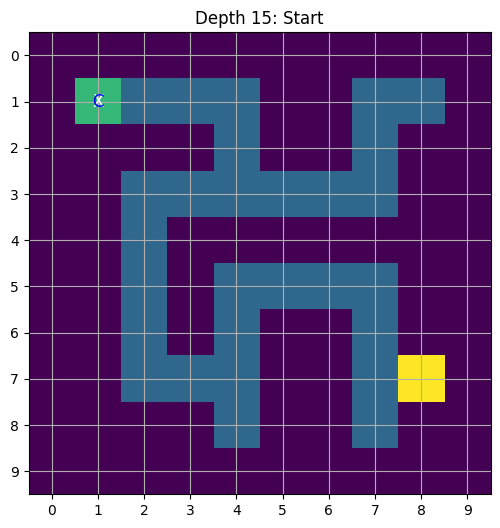

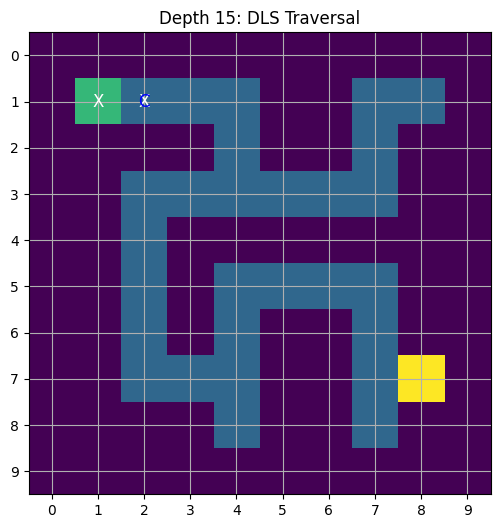

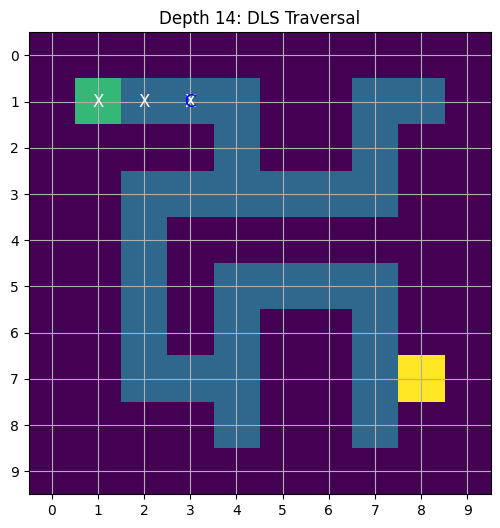

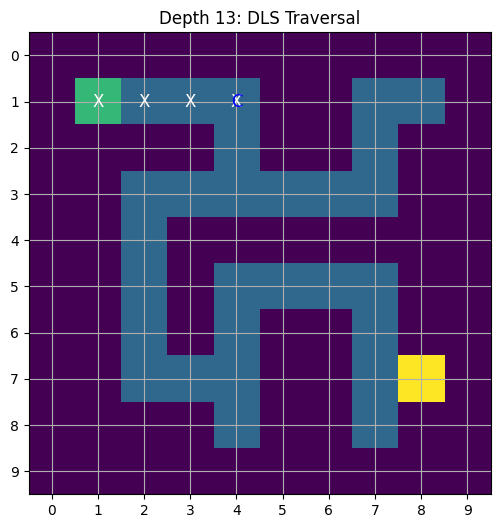

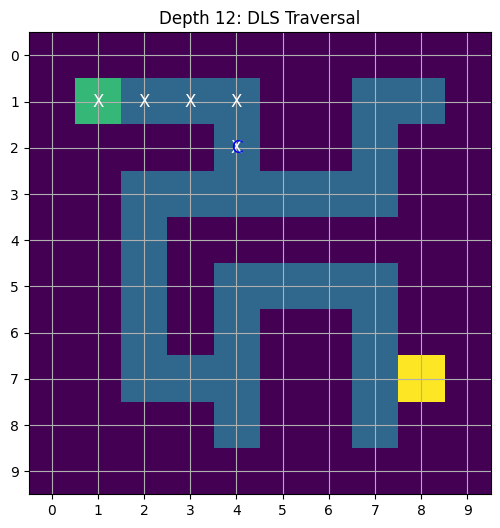

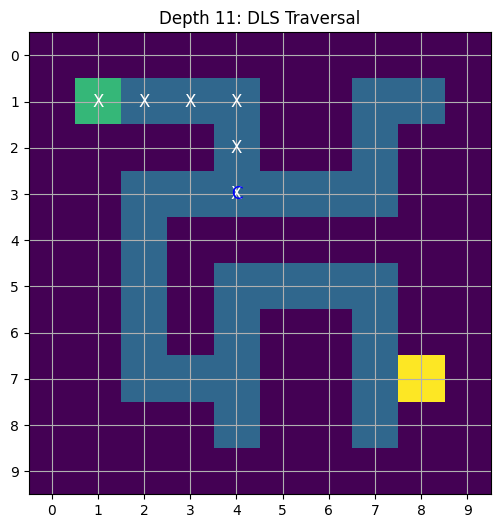

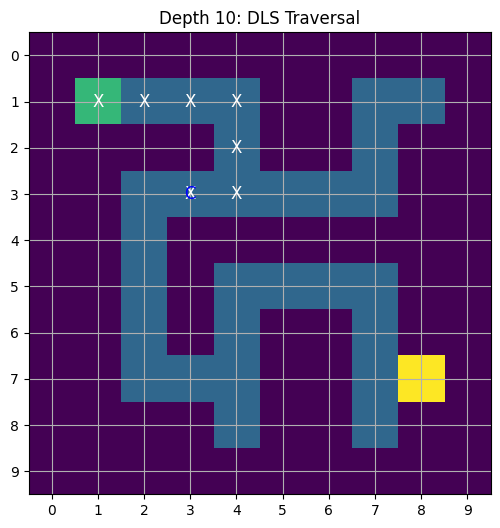

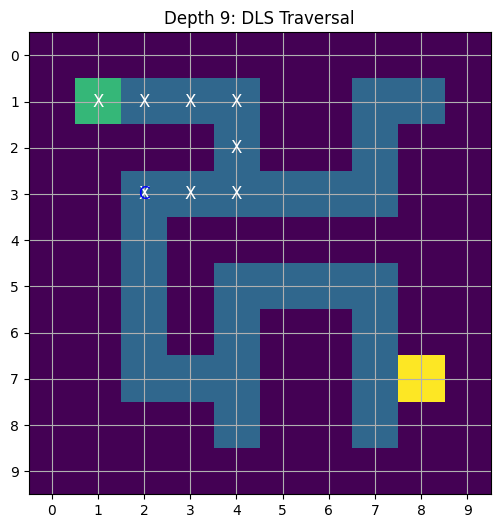

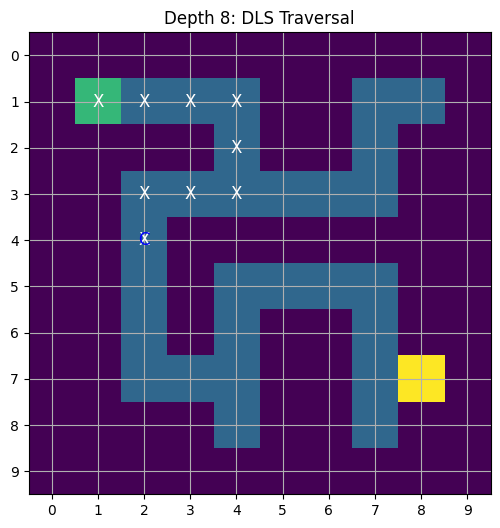

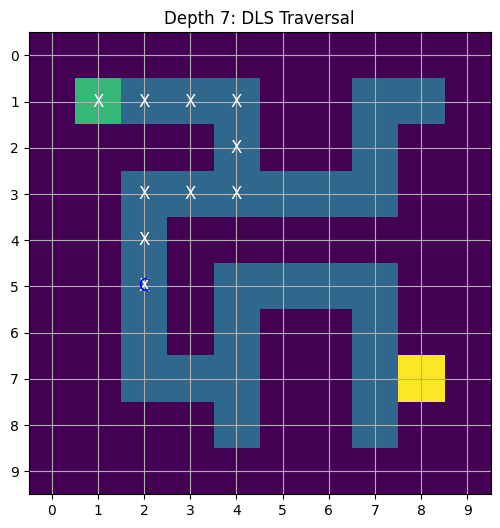

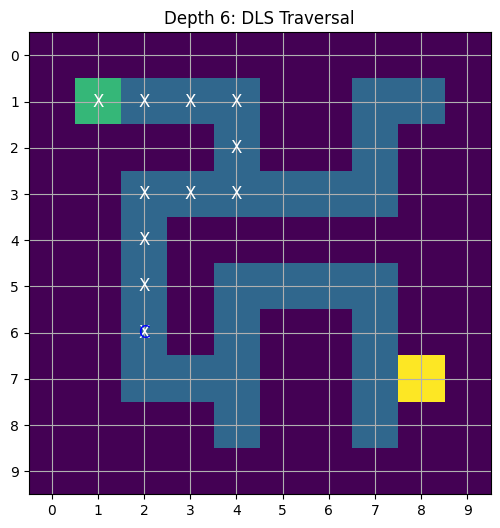

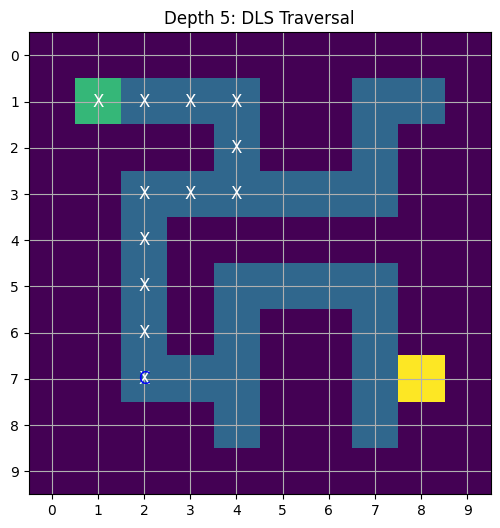

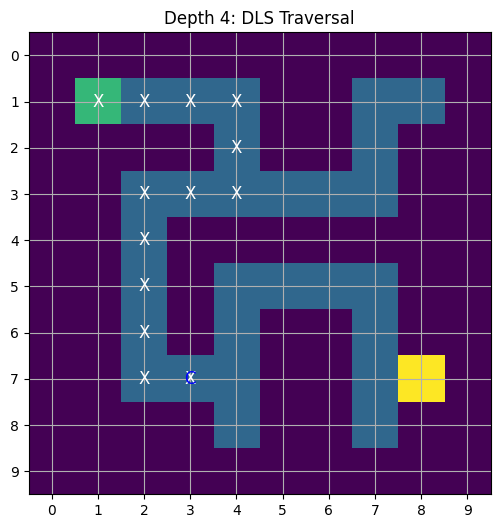

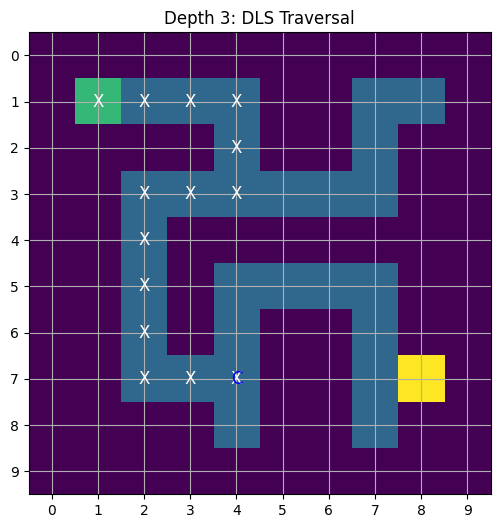

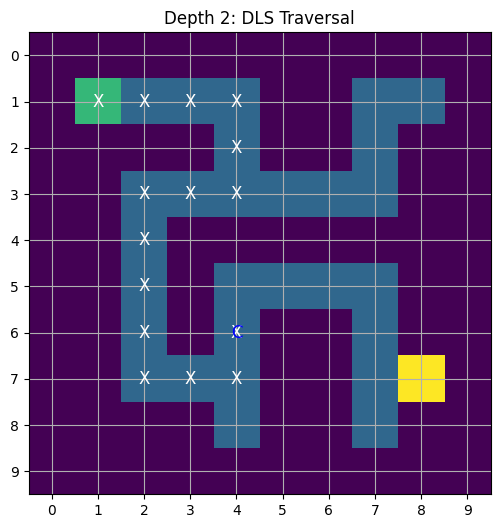

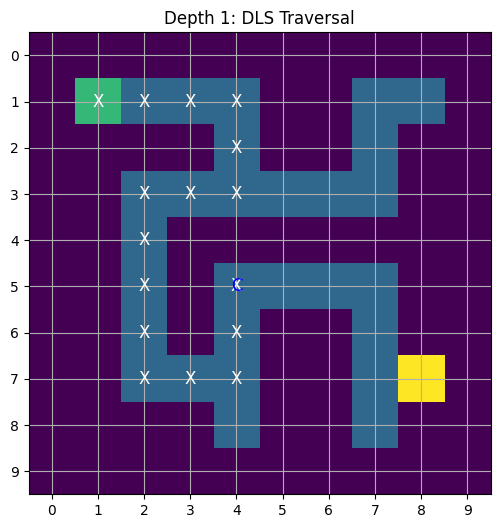

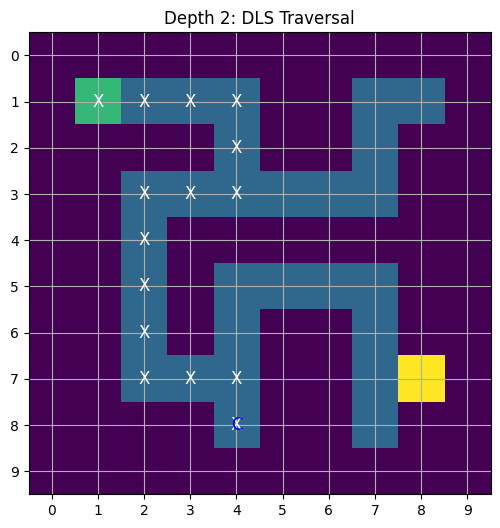

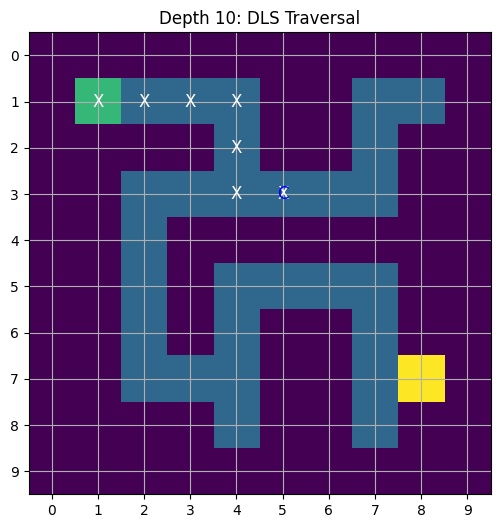

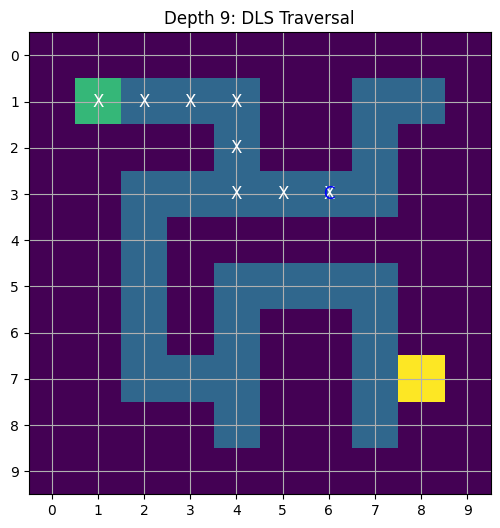

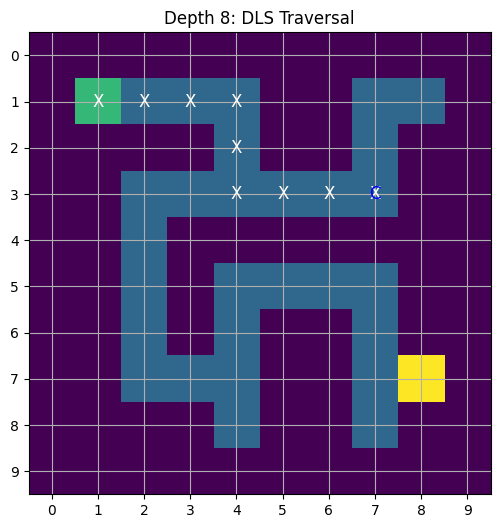

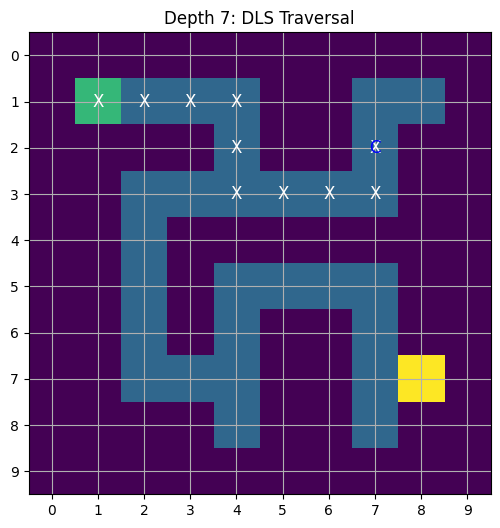

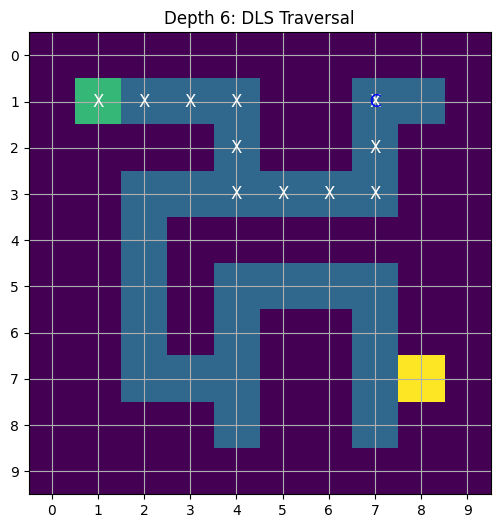

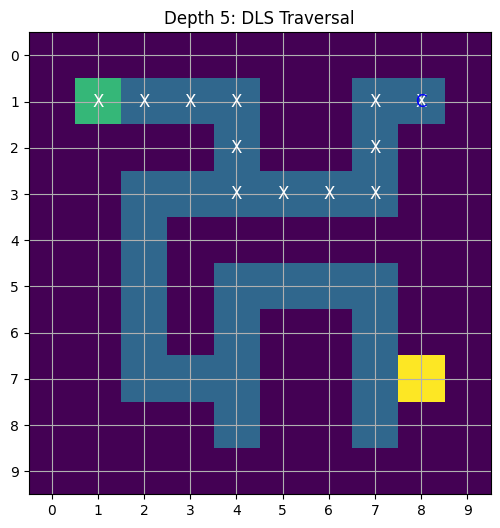

Searching with depth limit: 16


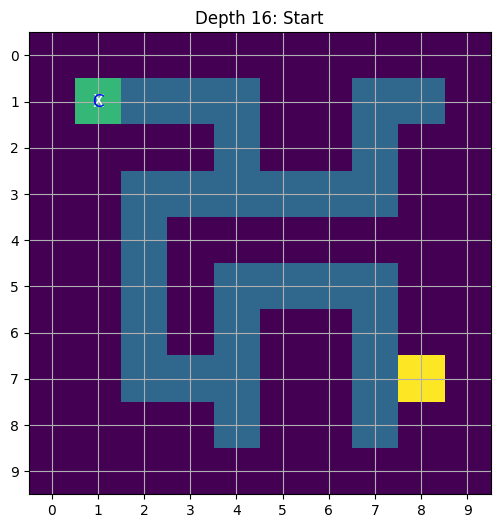

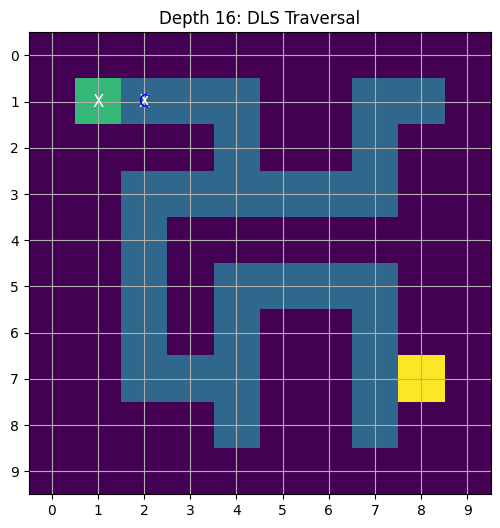

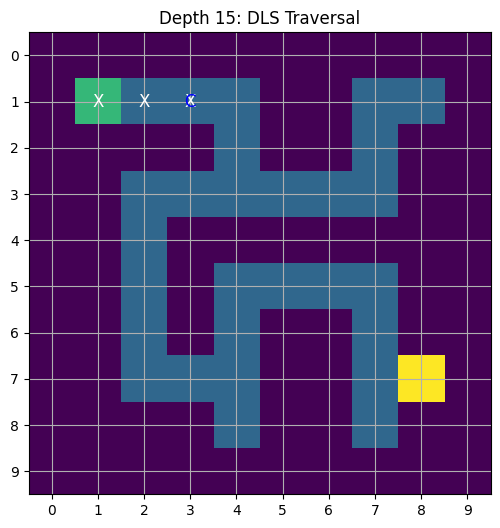

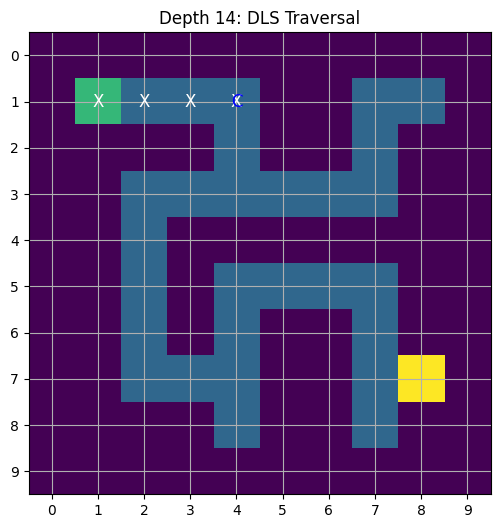

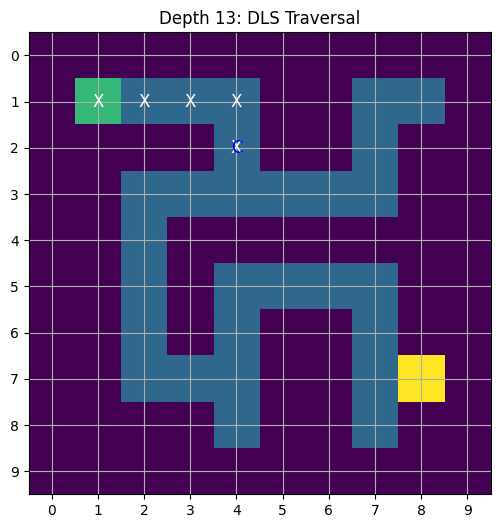

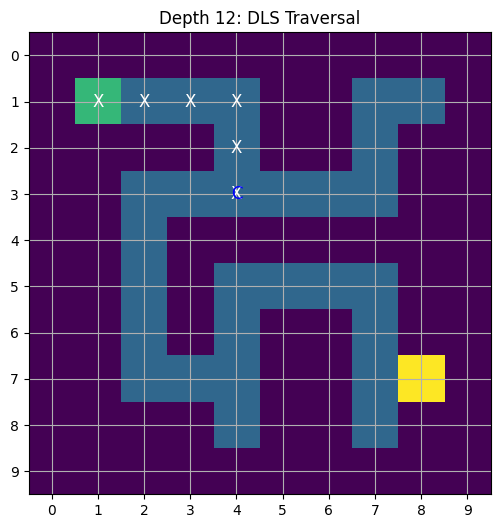

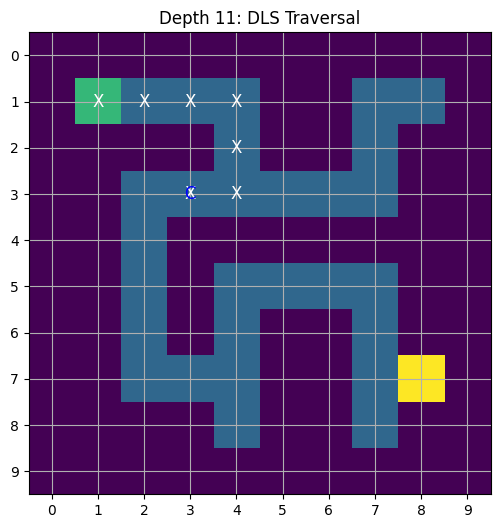

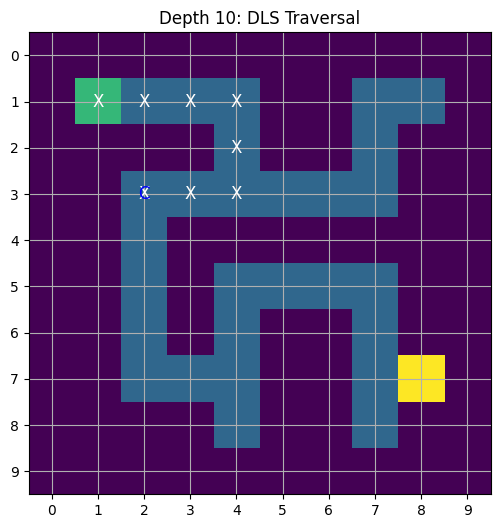

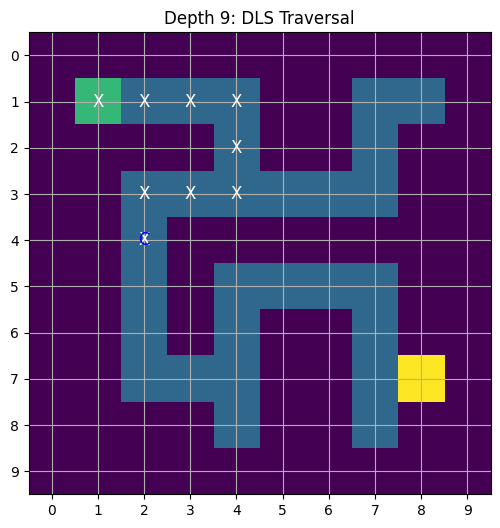

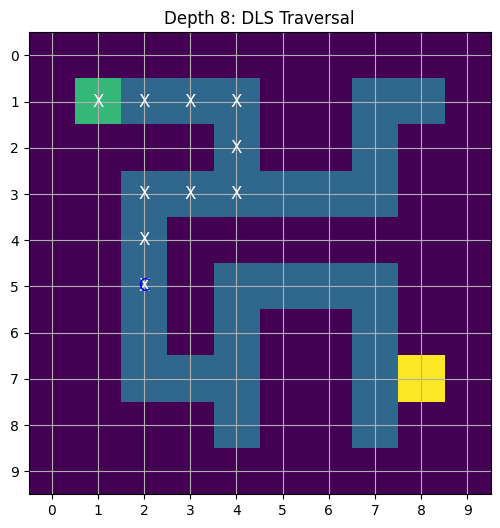

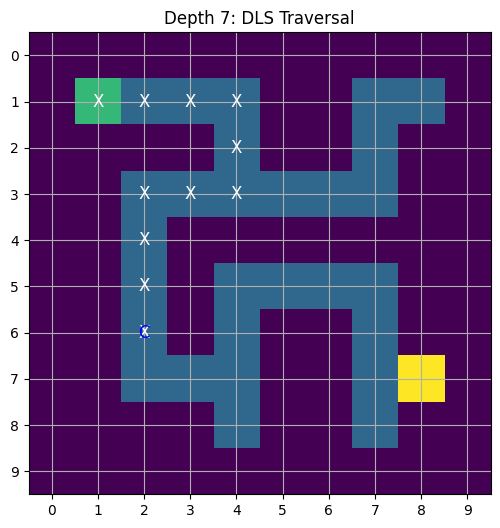

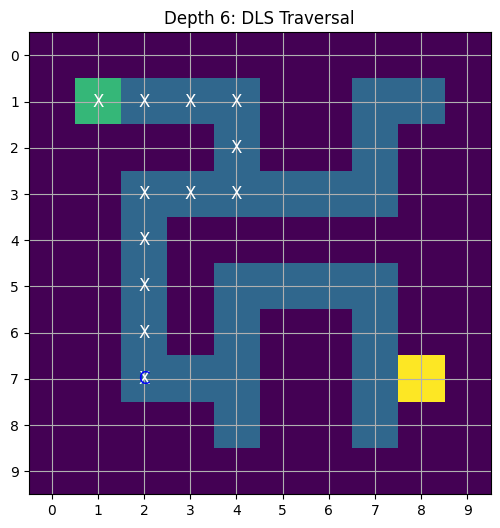

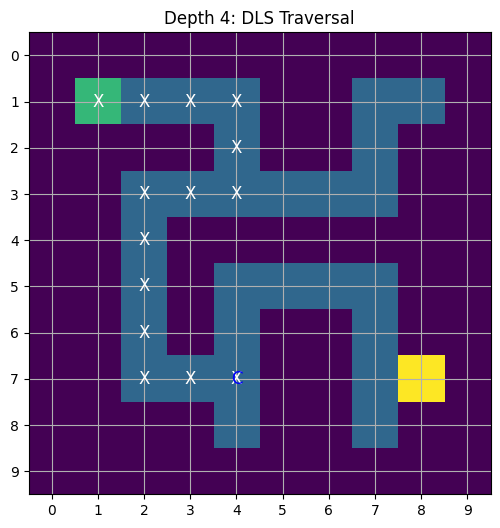

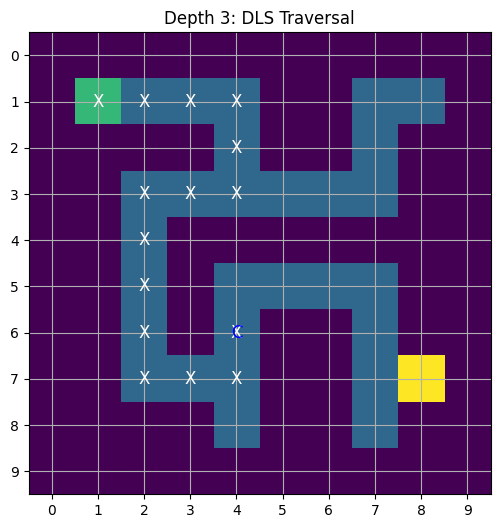

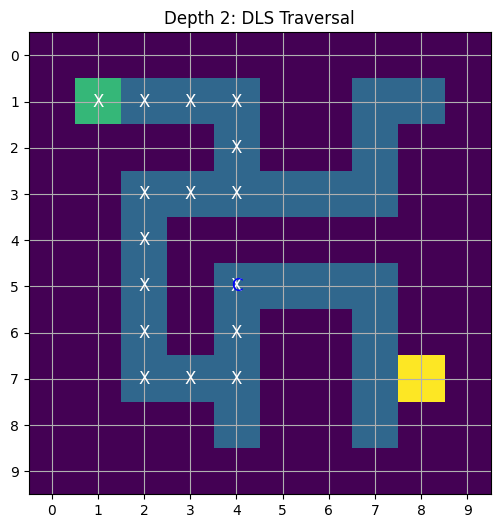

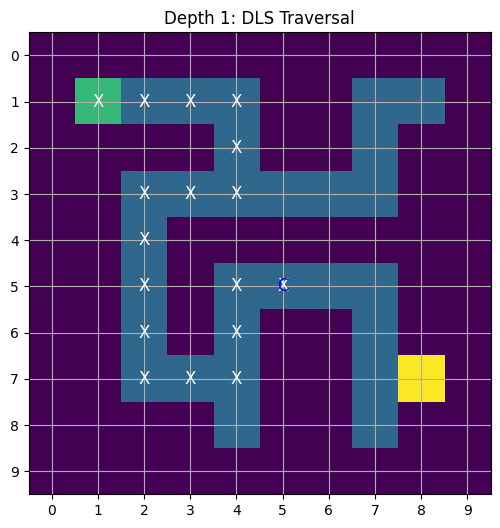

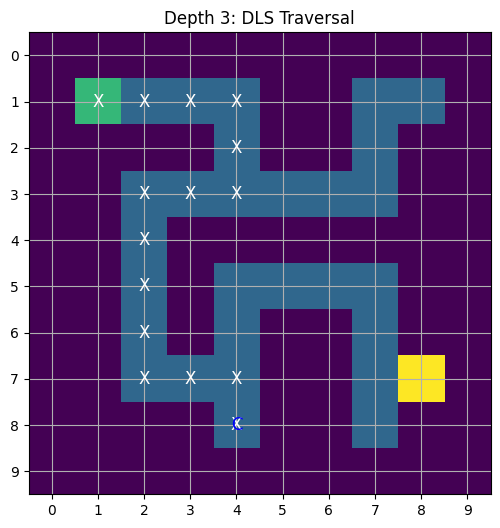

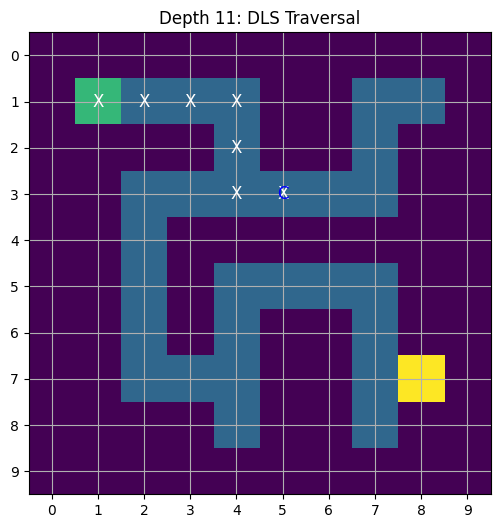

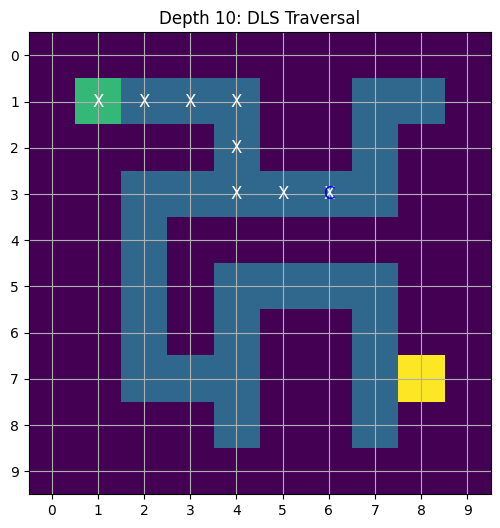

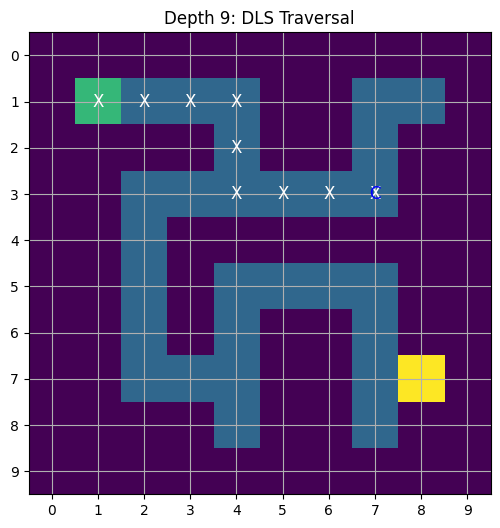

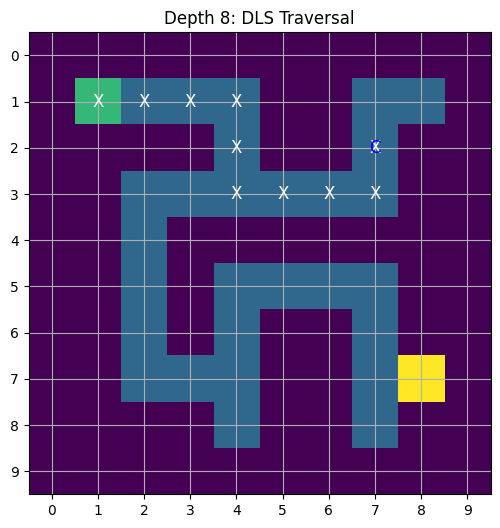

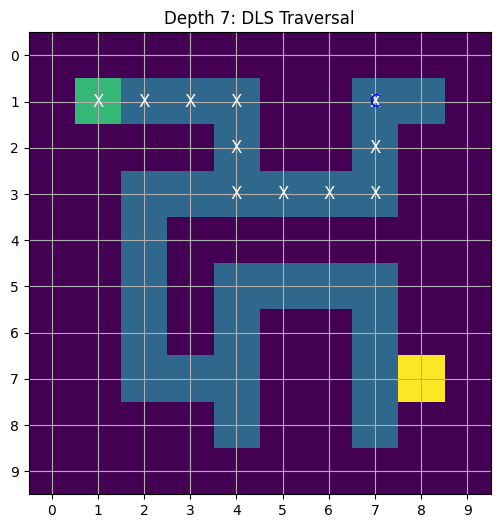

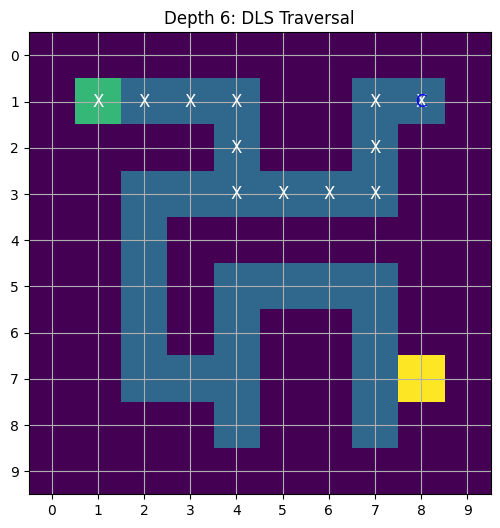

Searching with depth limit: 17


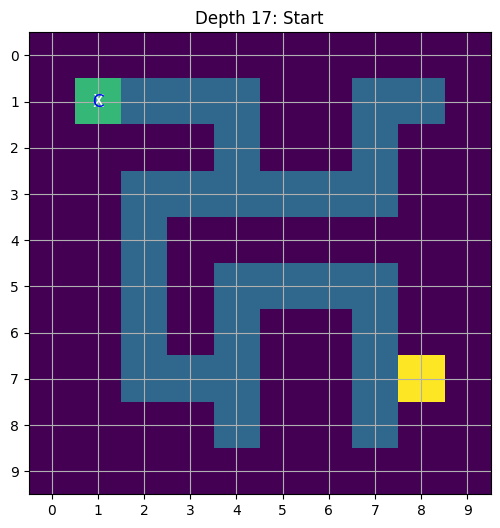

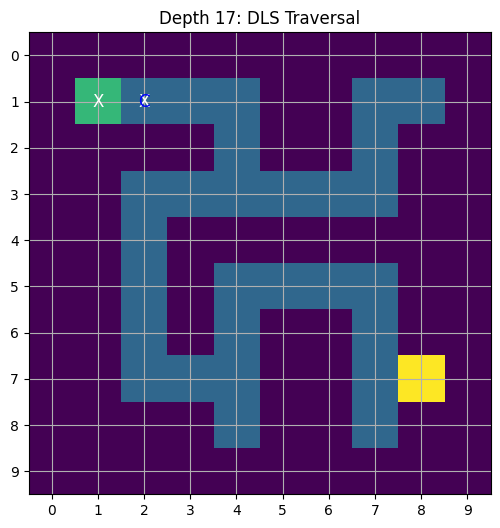

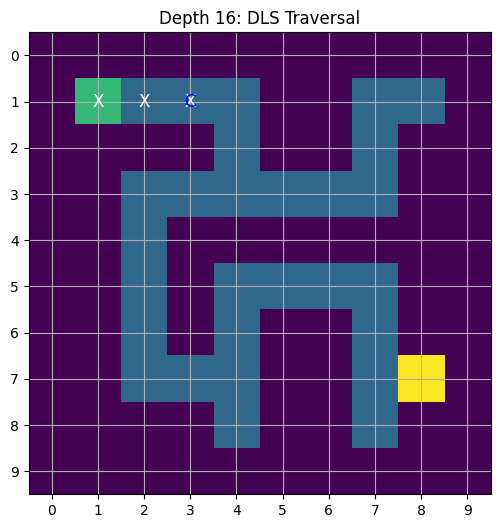

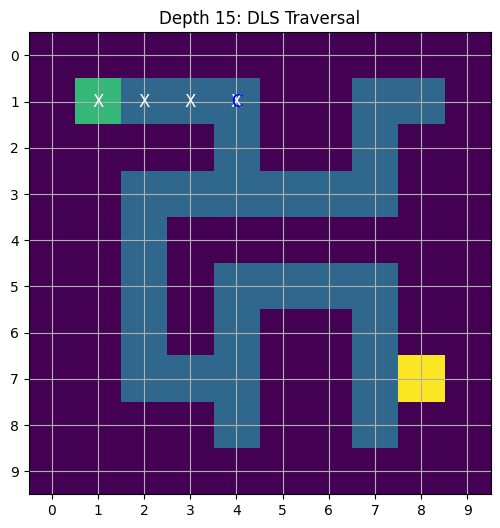

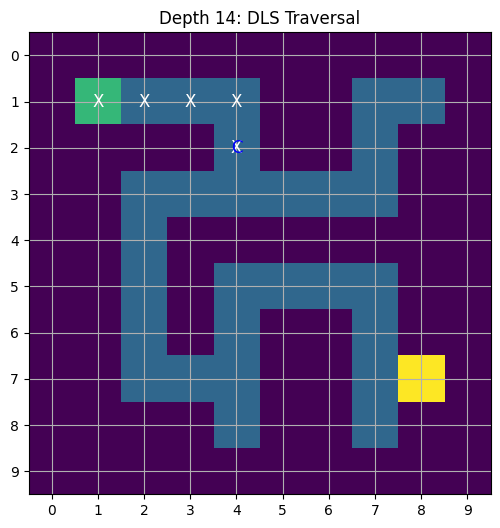

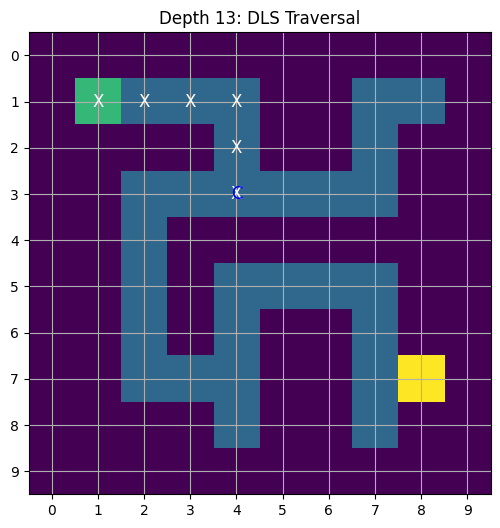

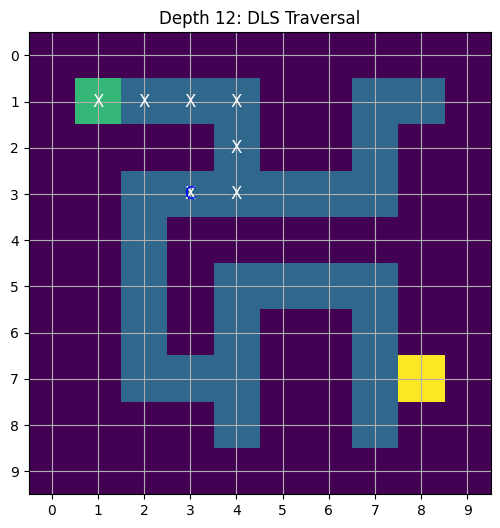

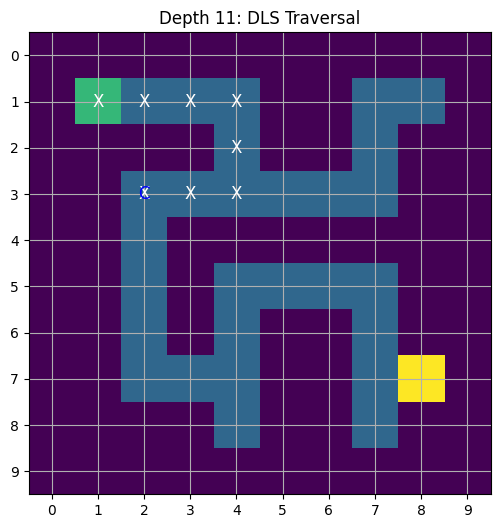

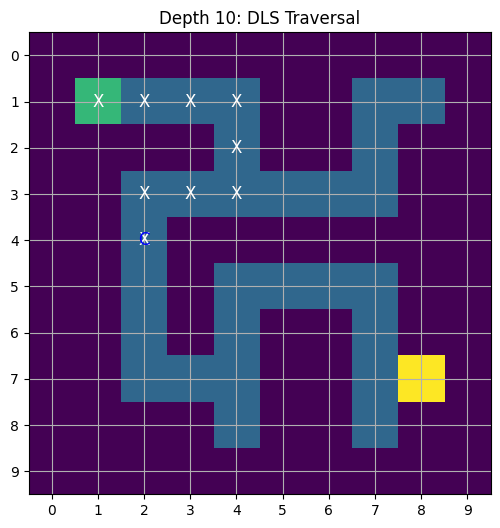

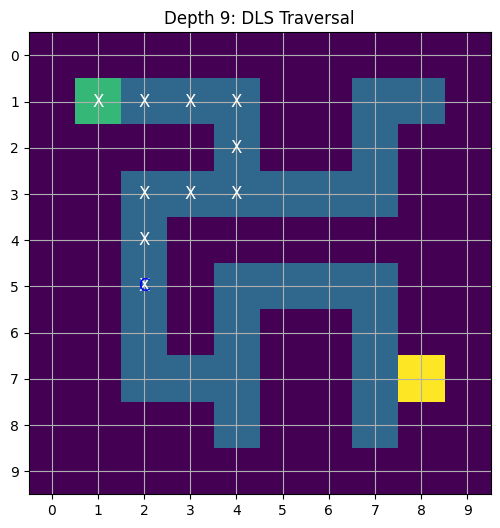

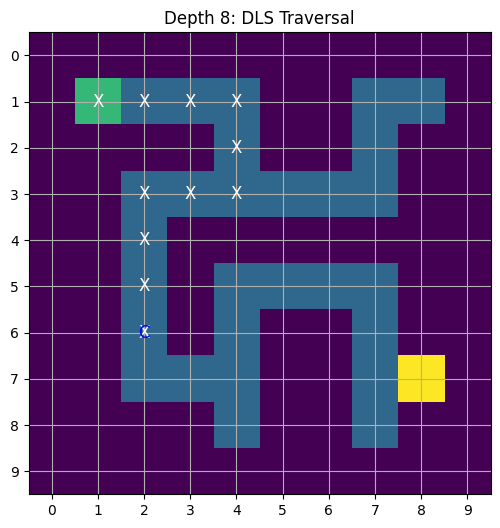

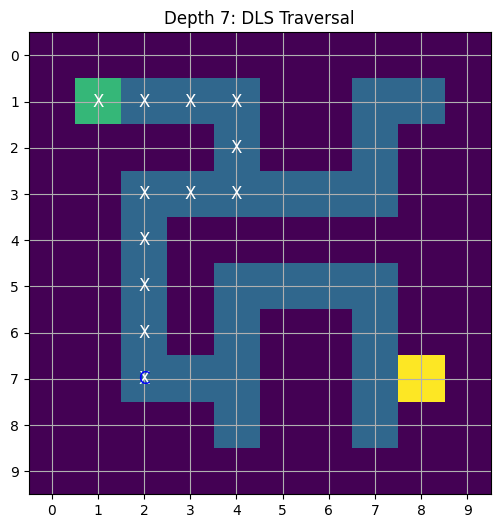

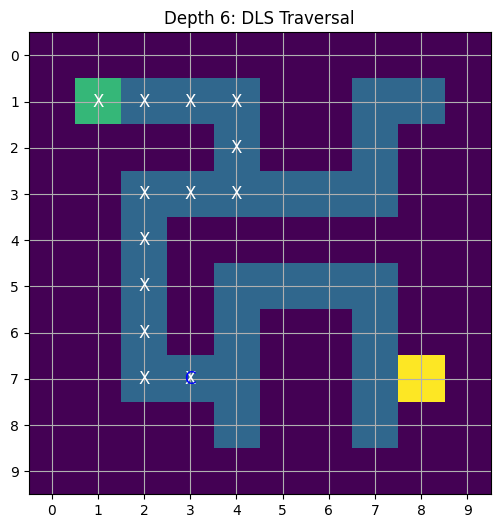

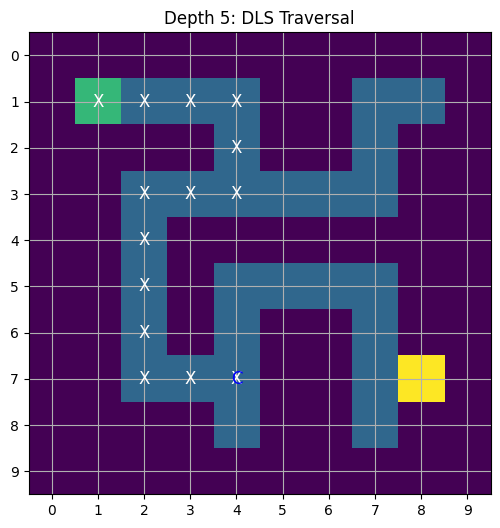

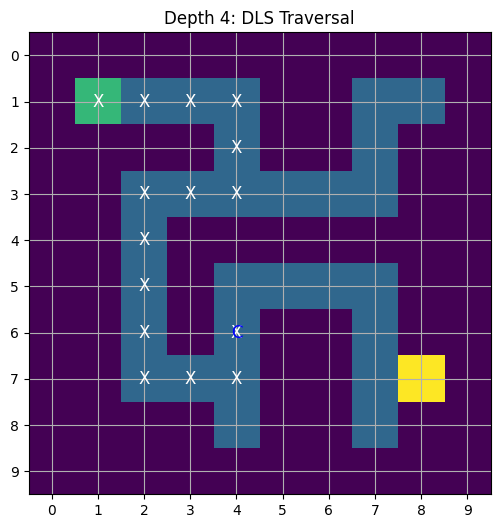

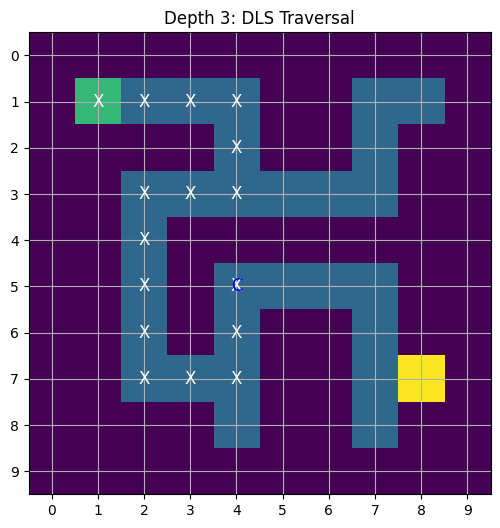

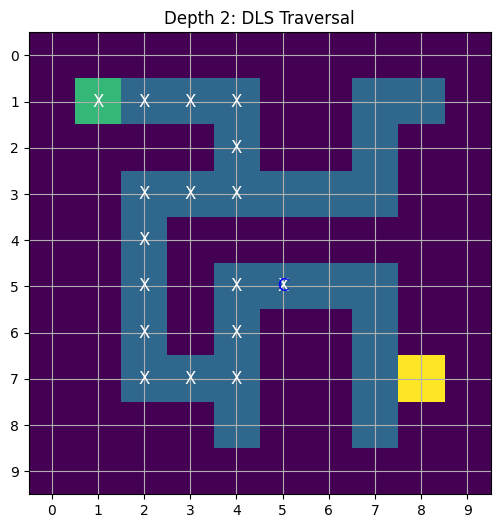

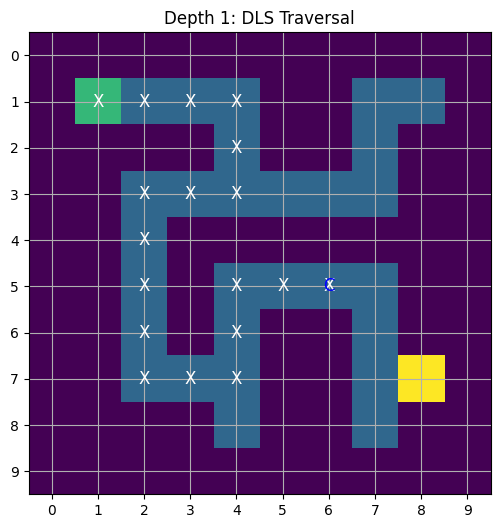

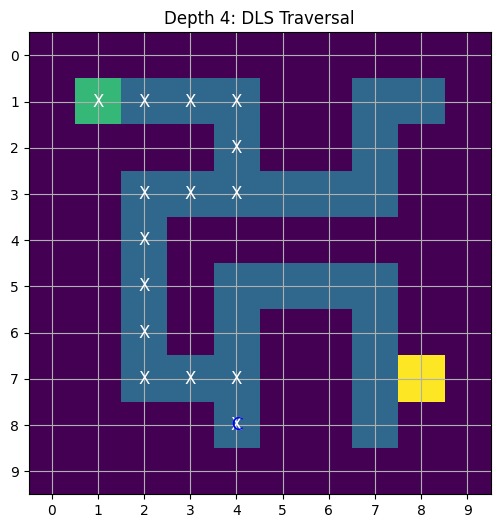

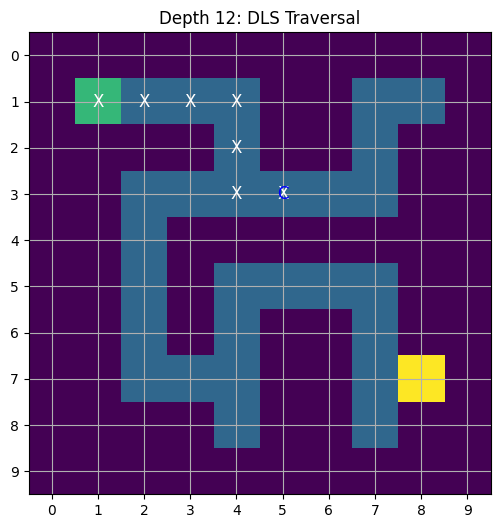

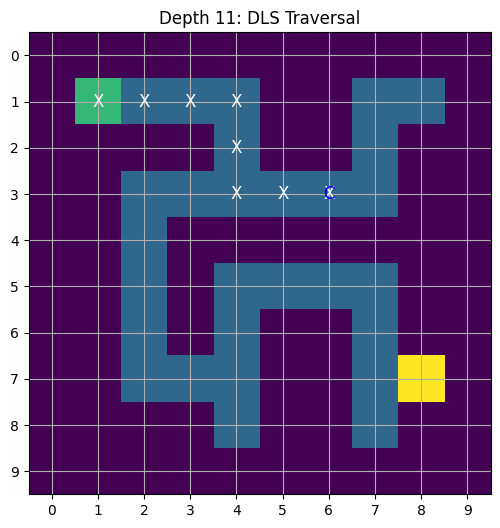

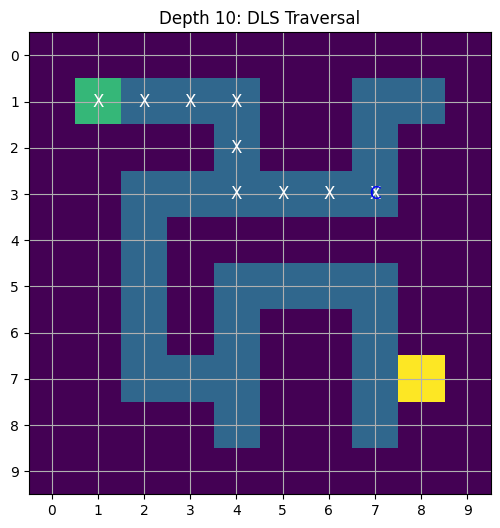

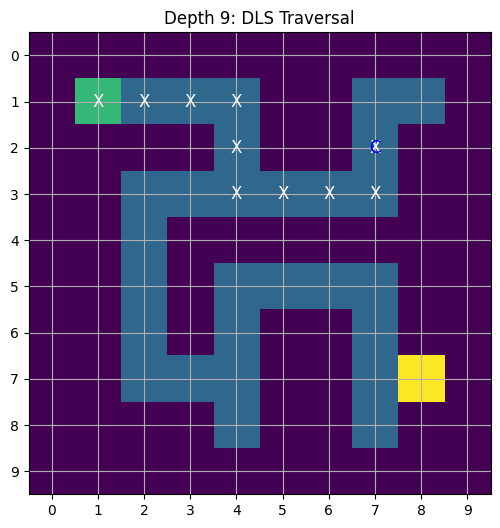

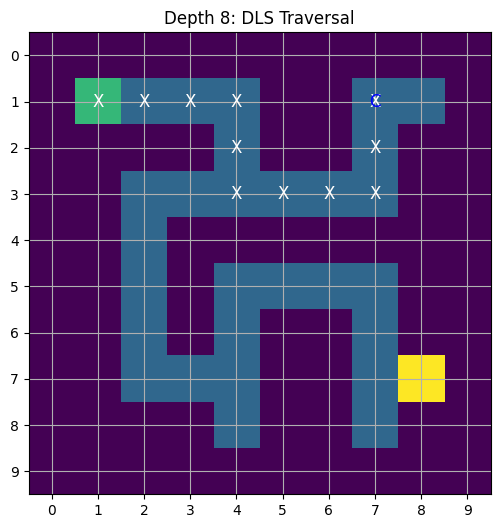

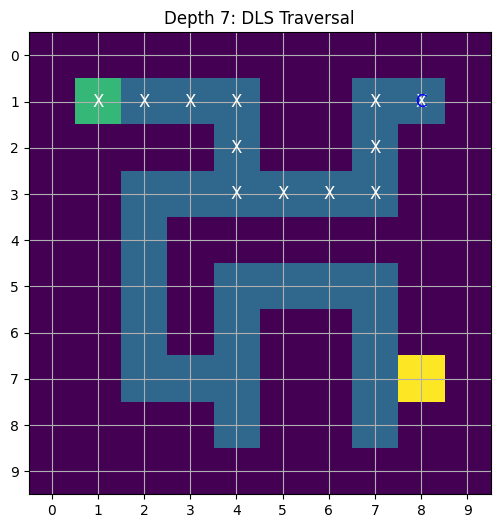

Searching with depth limit: 18


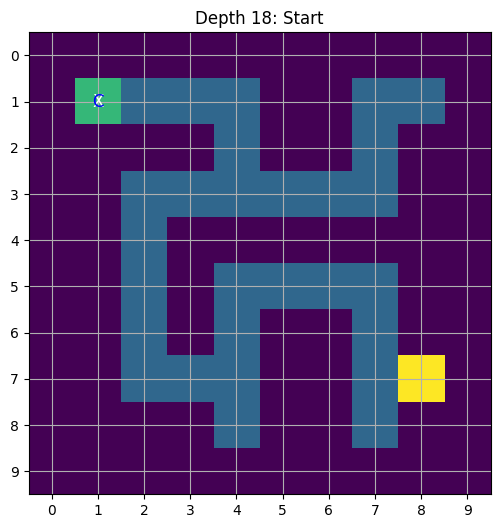

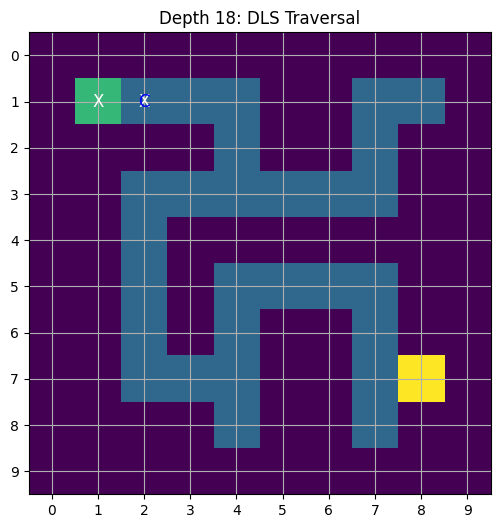

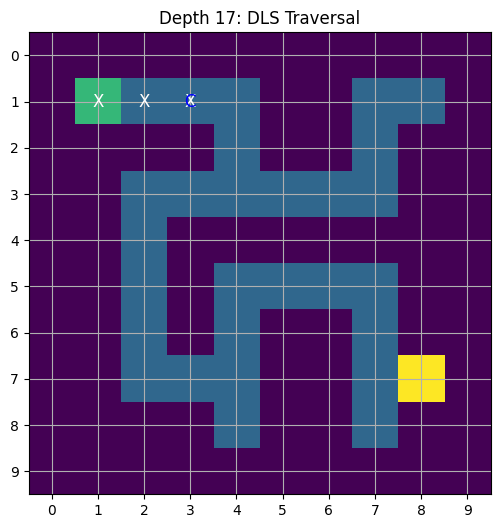

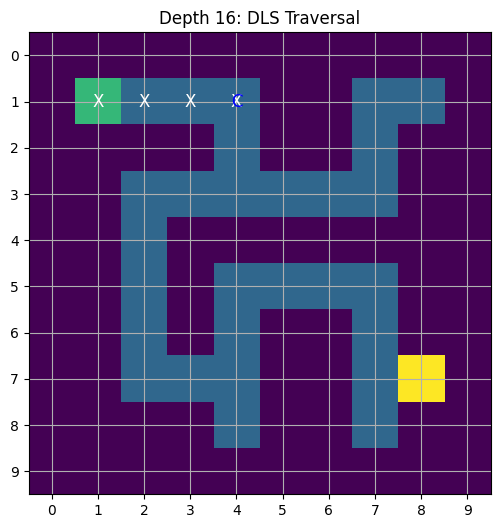

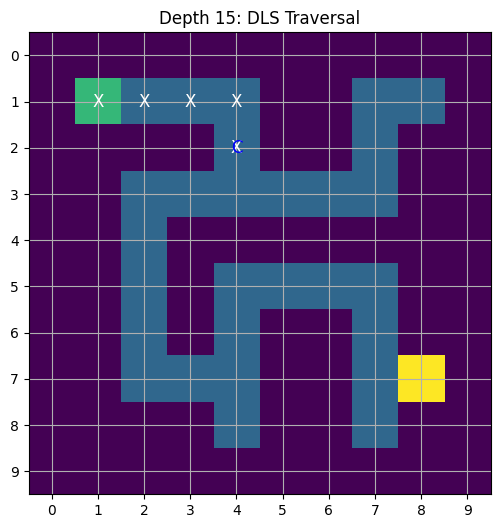

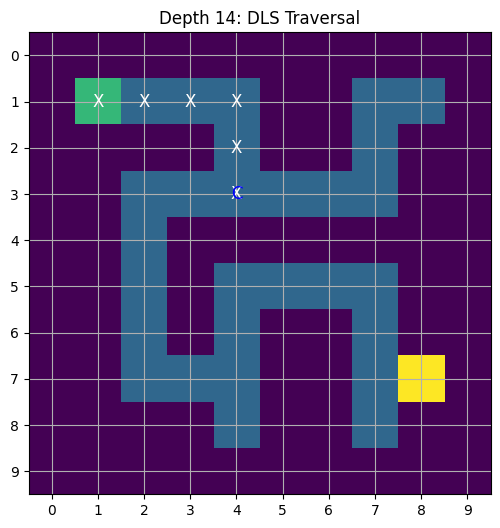

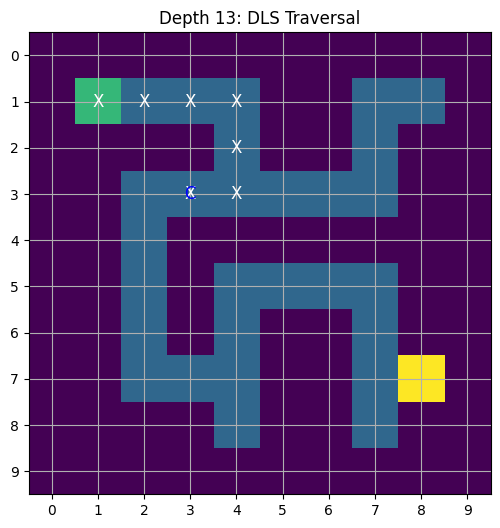

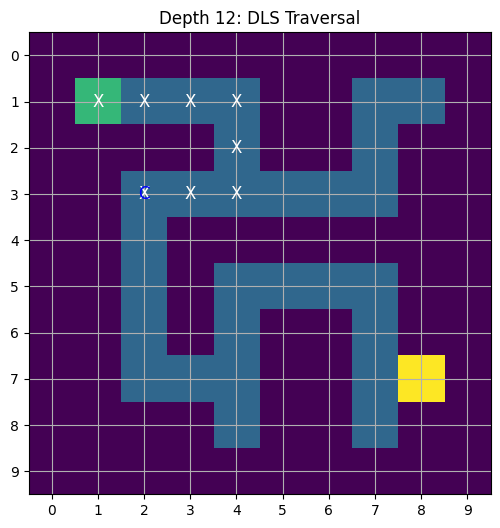

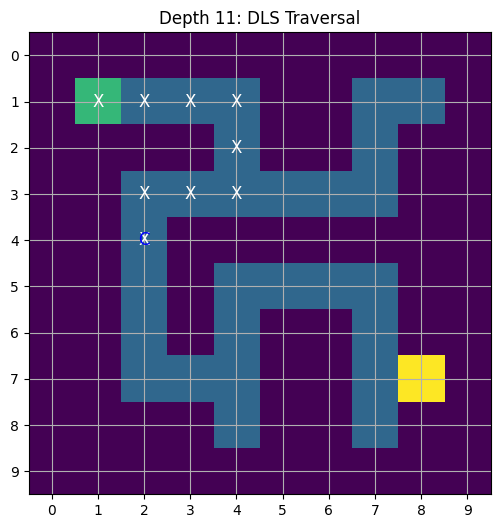

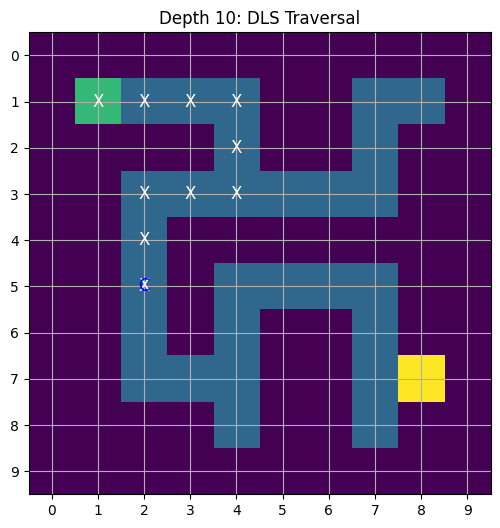

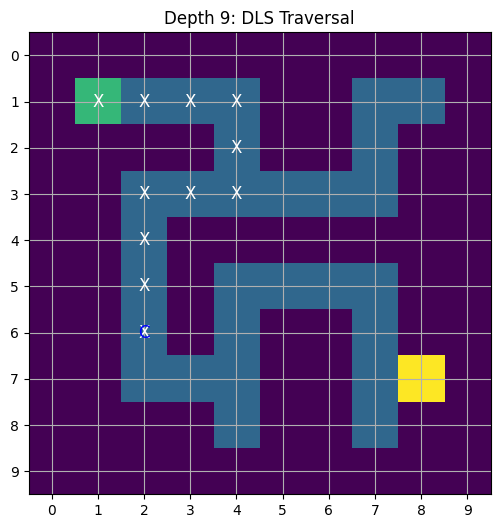

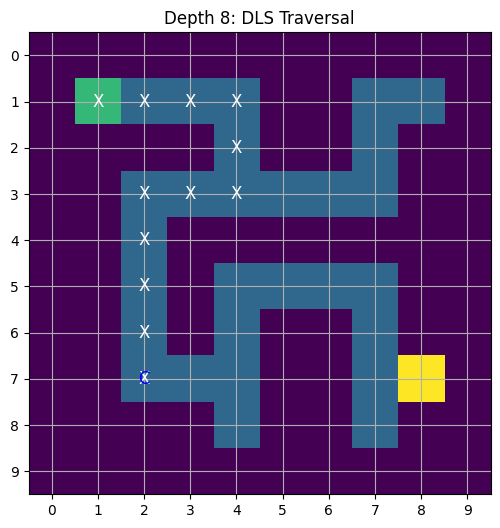

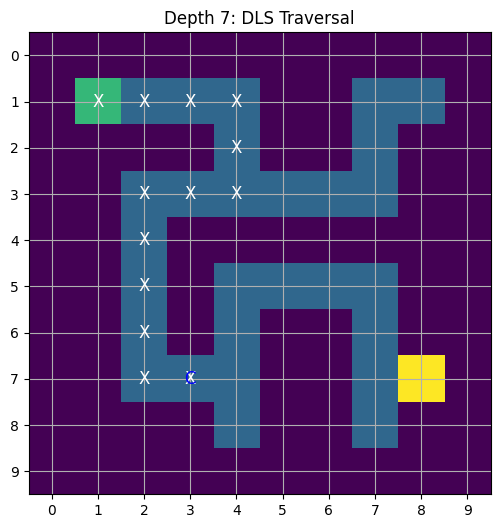

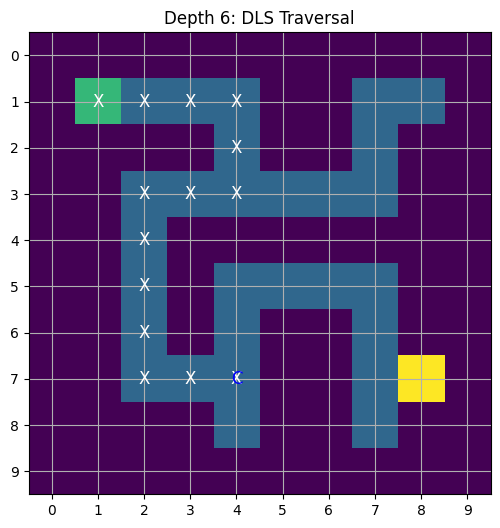

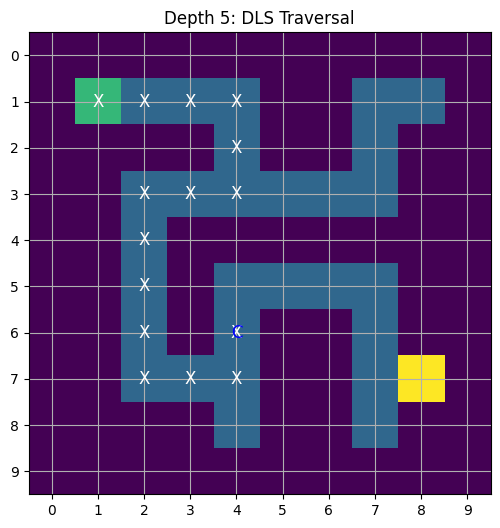

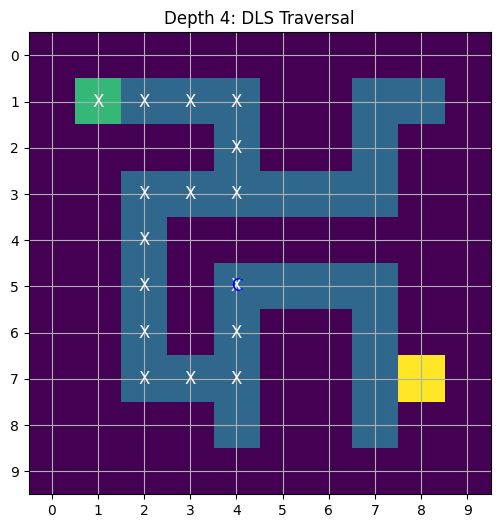

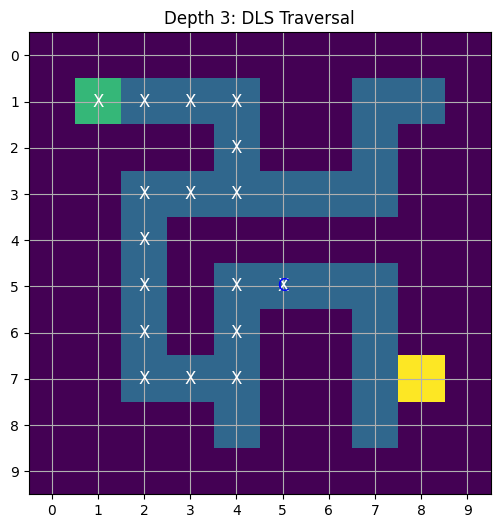

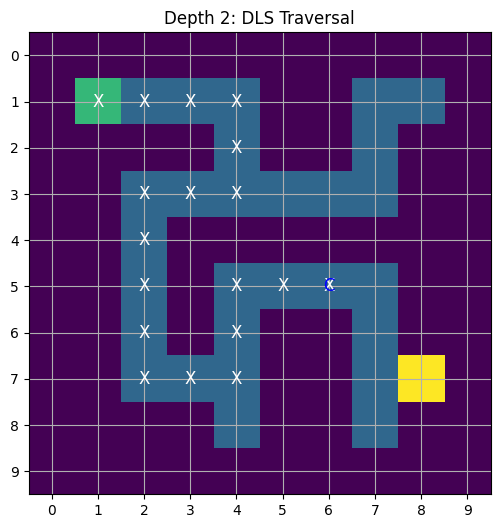

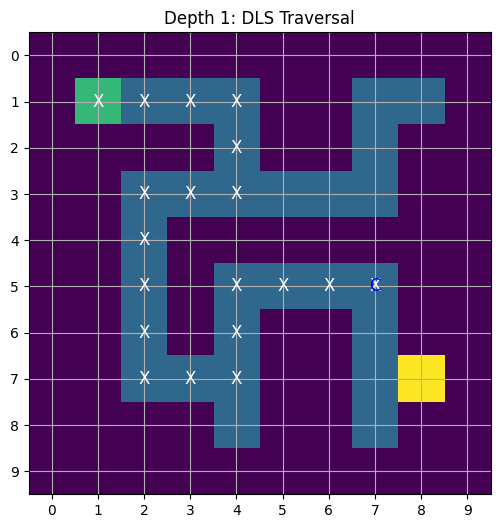

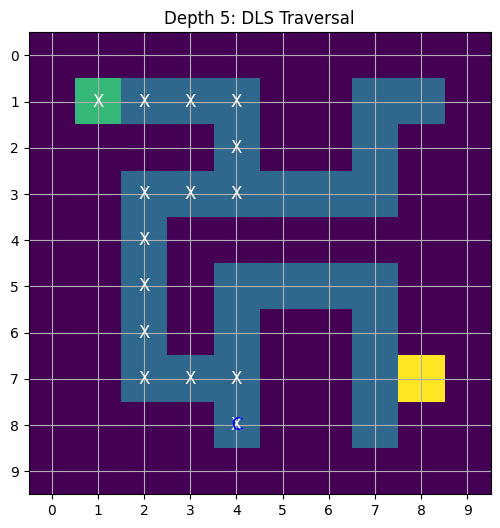

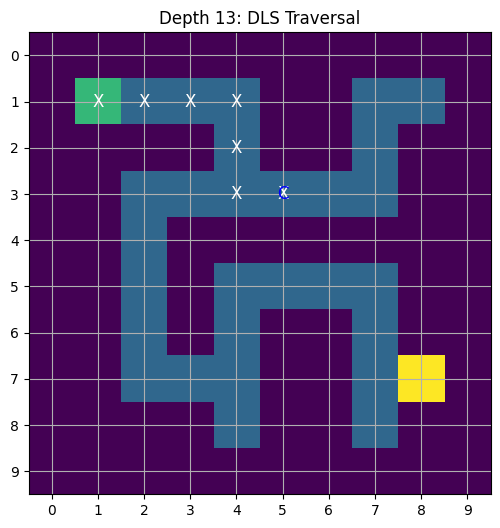

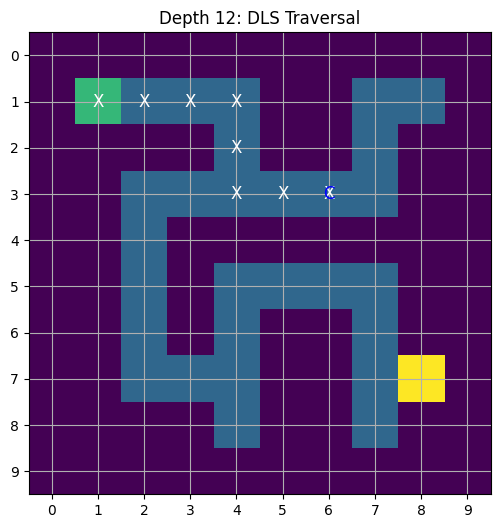

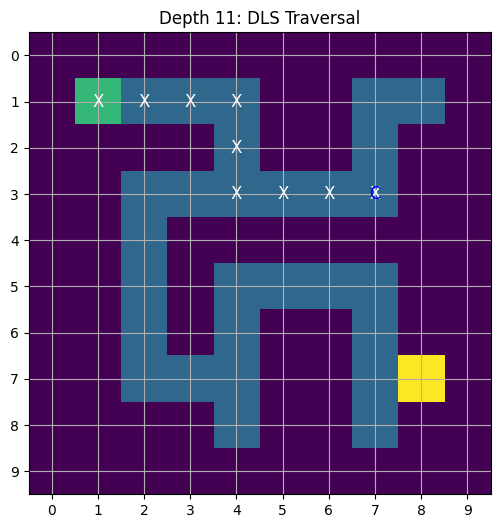

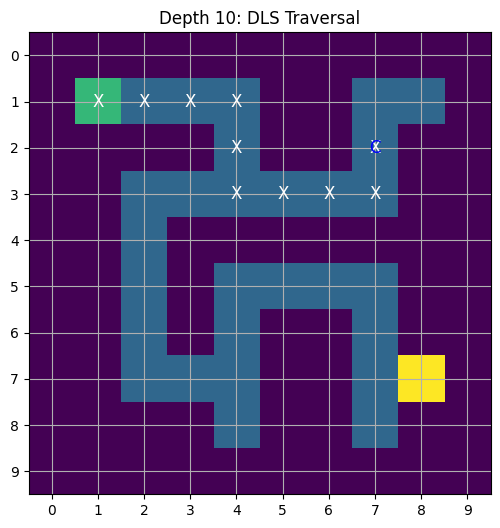

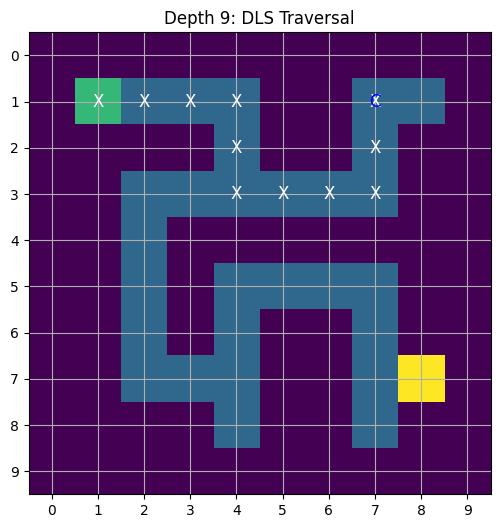

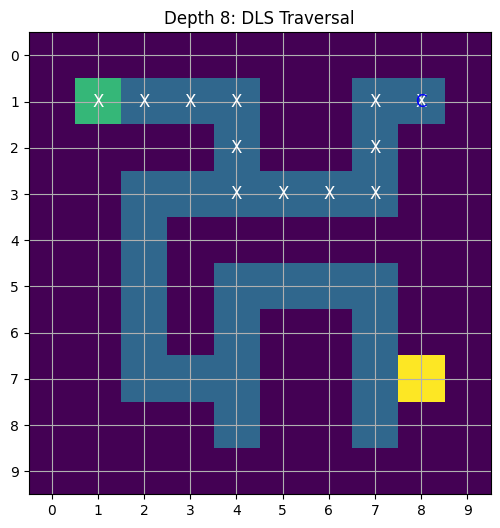

Searching with depth limit: 19


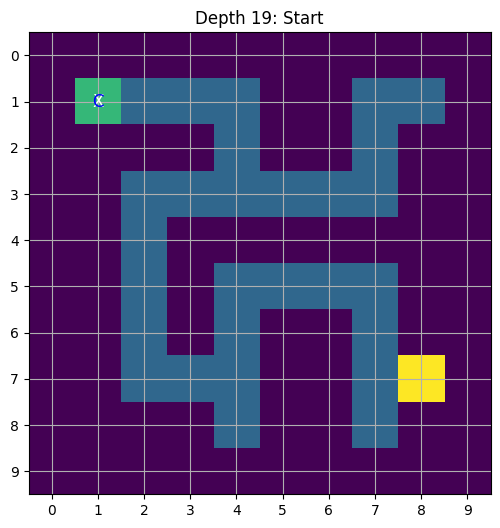

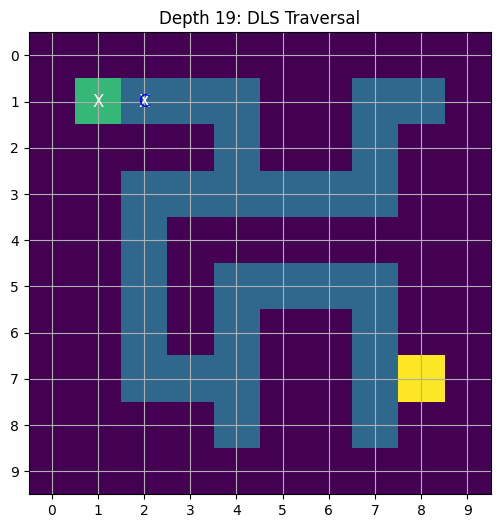

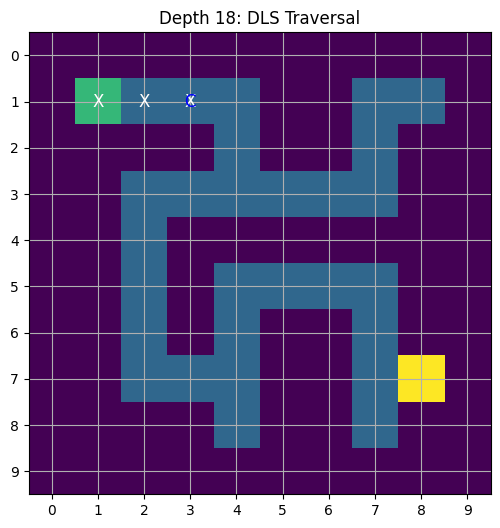

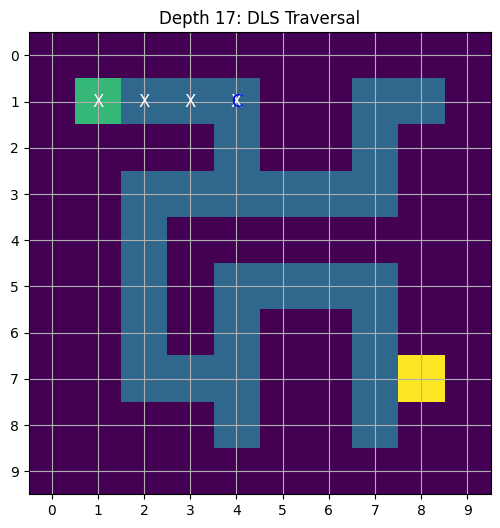

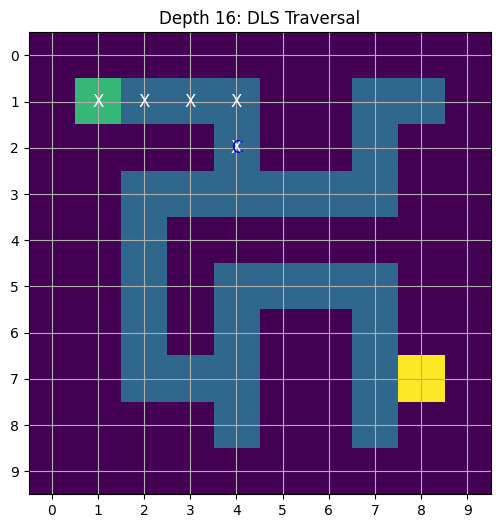

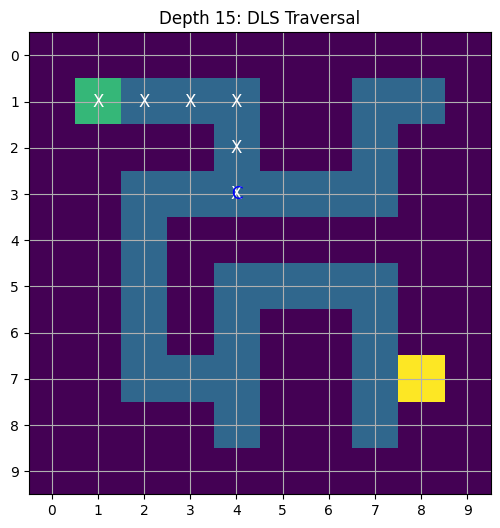

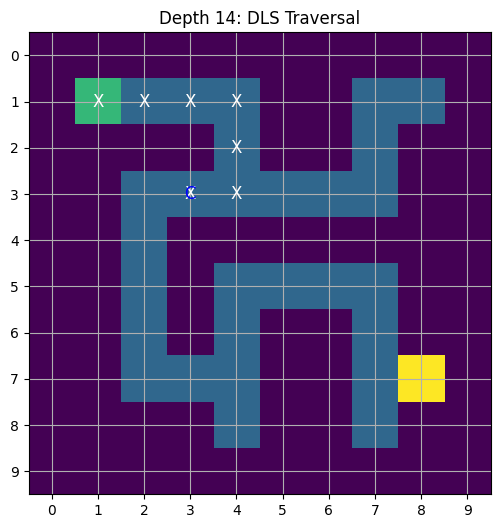

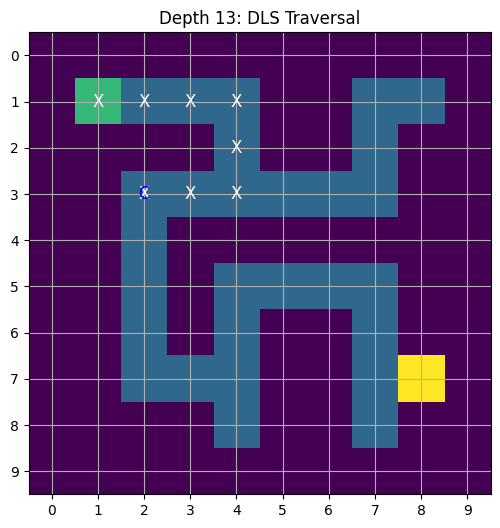

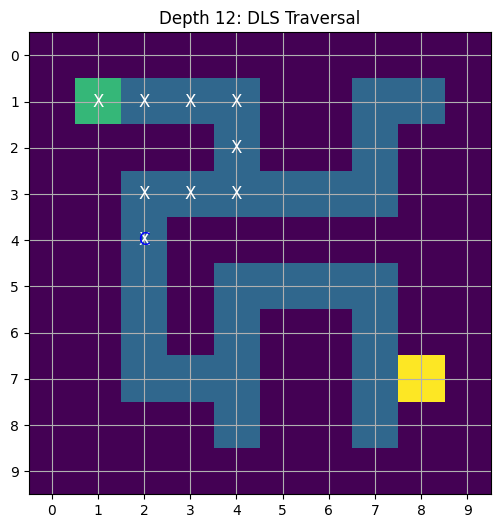

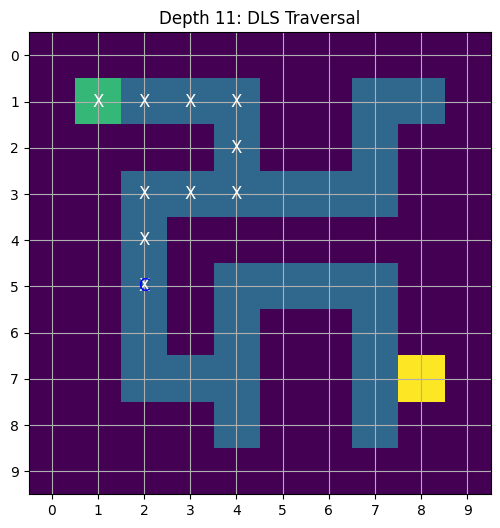

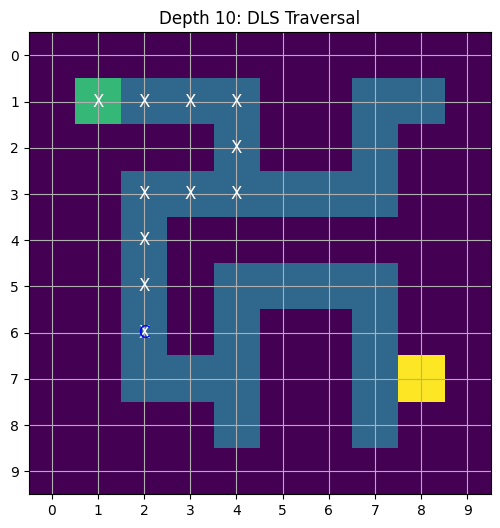

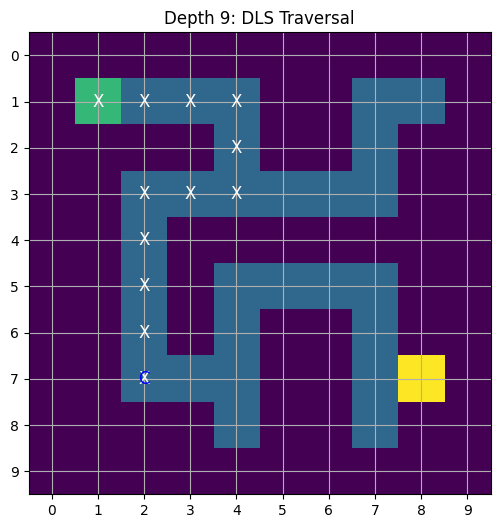

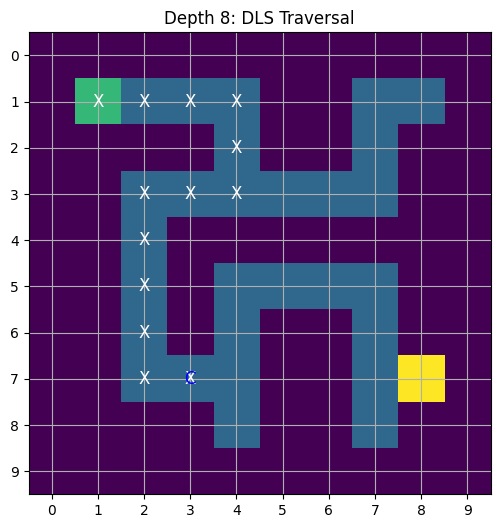

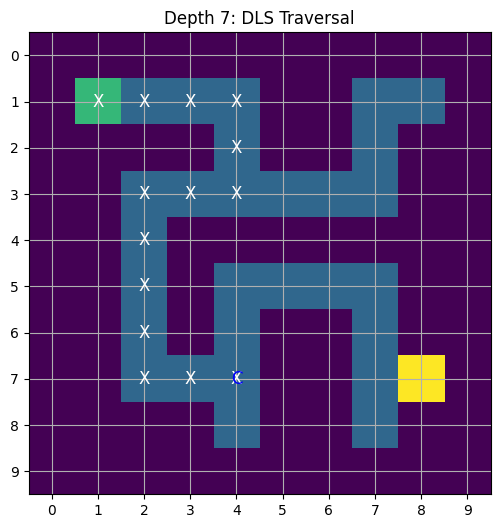

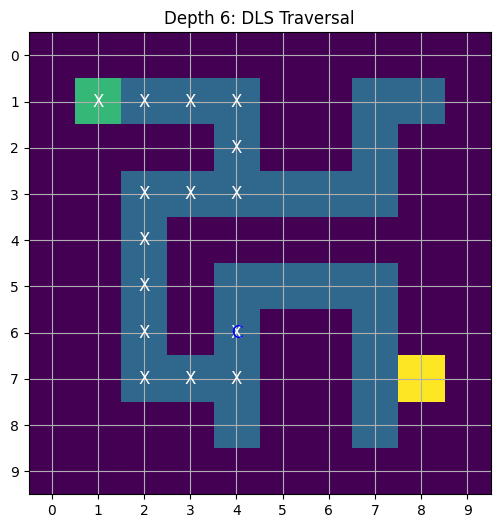

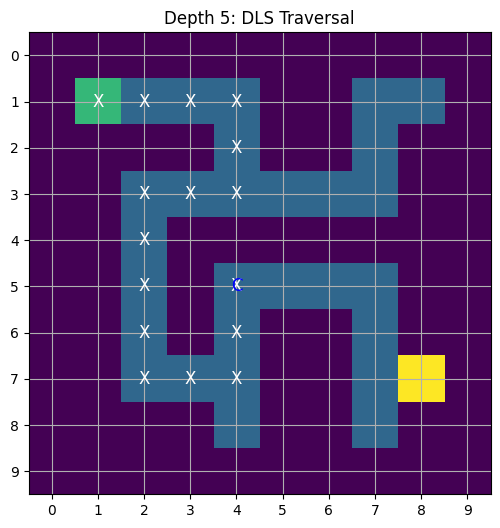

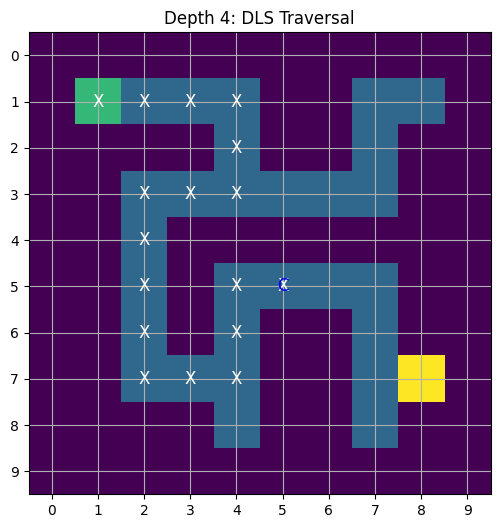

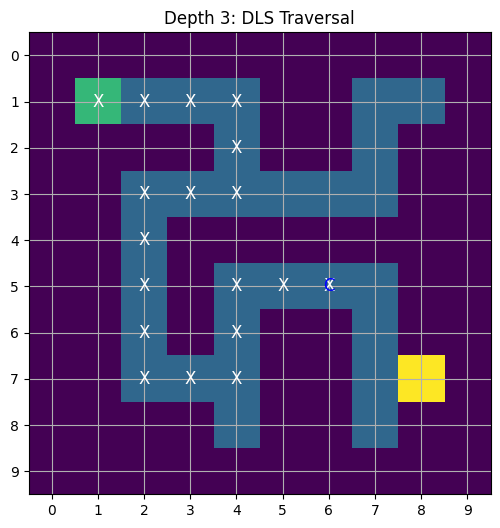

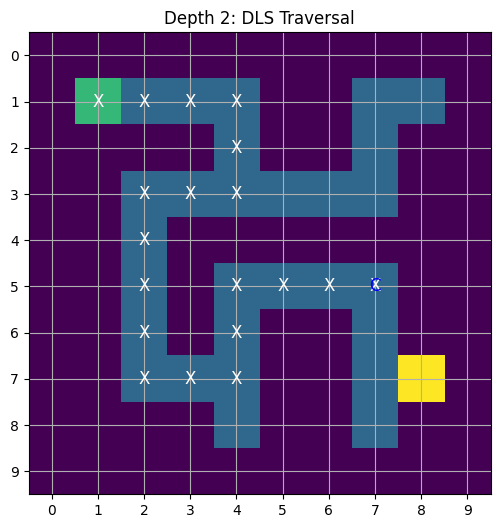

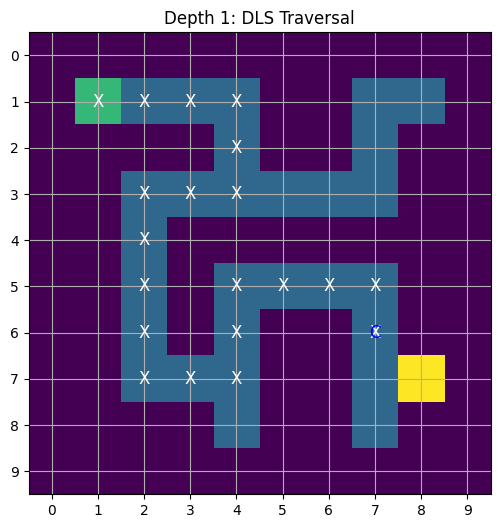

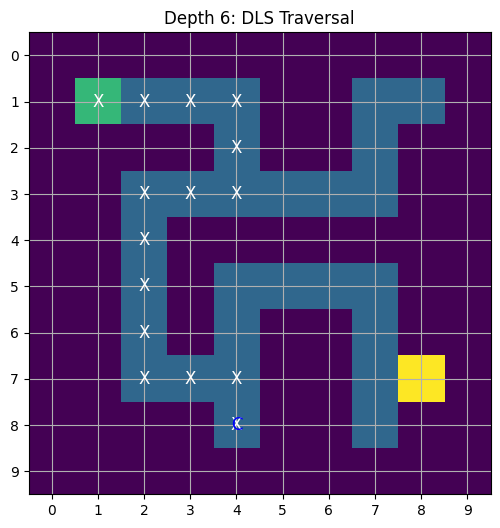

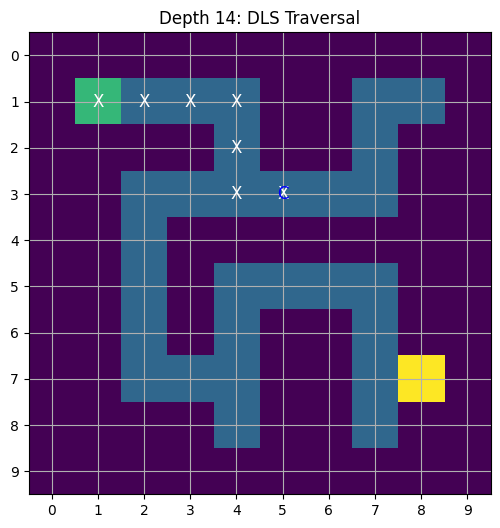

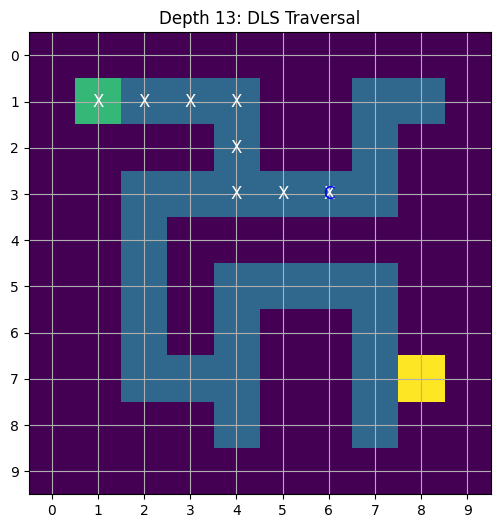

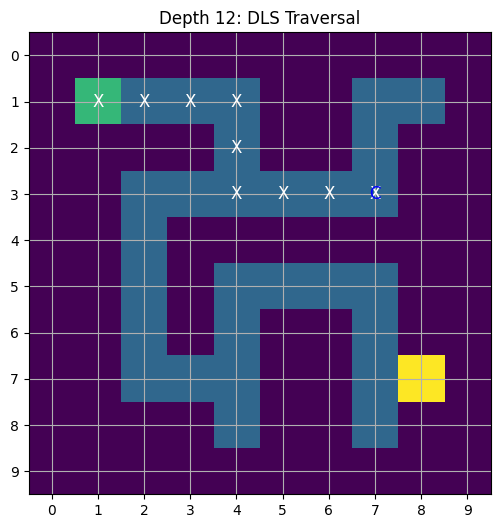

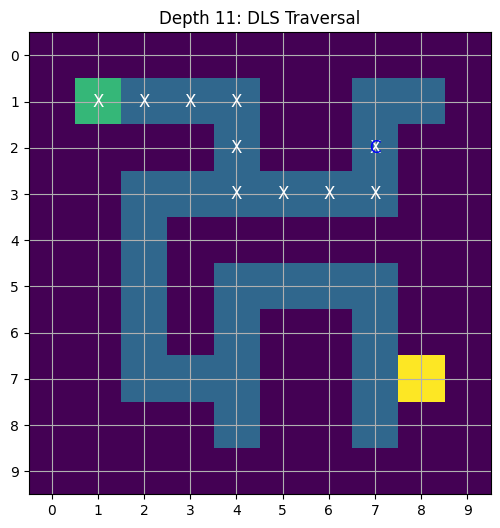

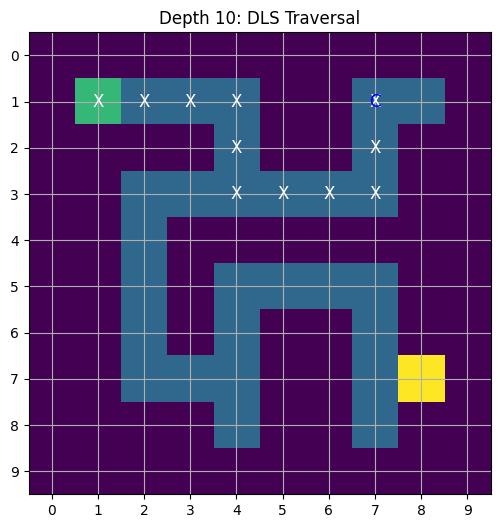

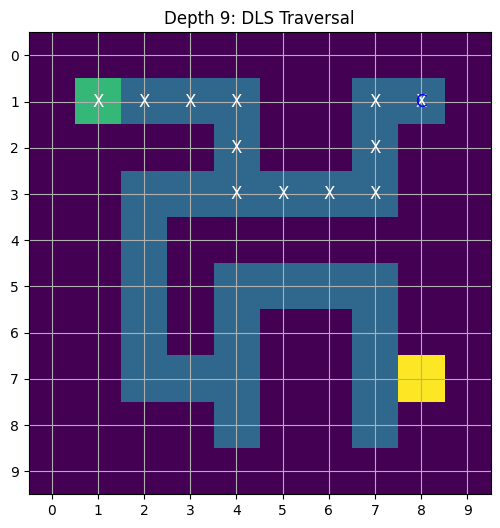

Searching with depth limit: 20


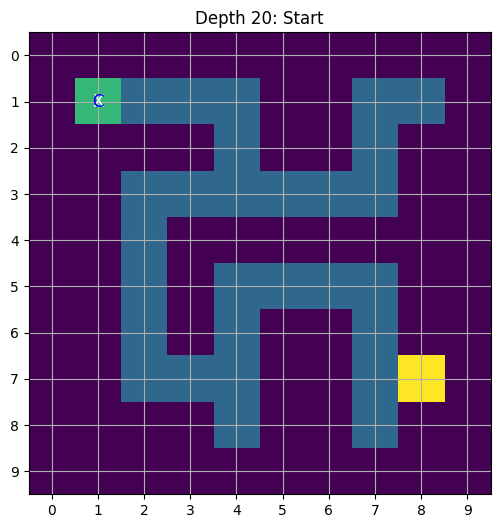

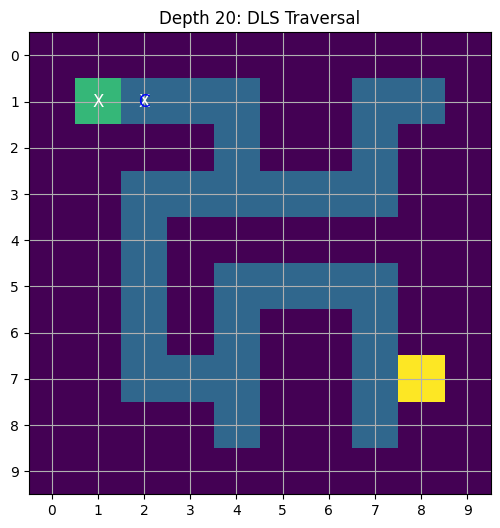

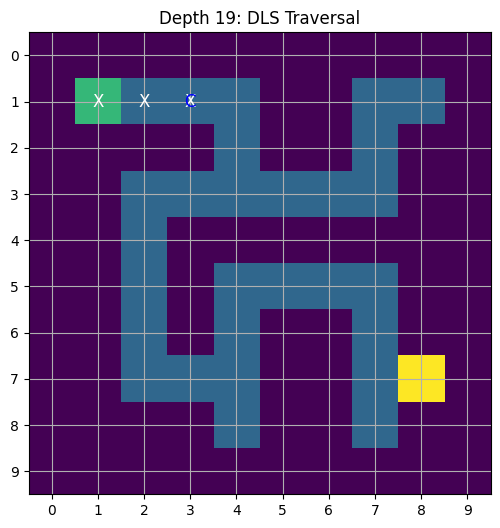

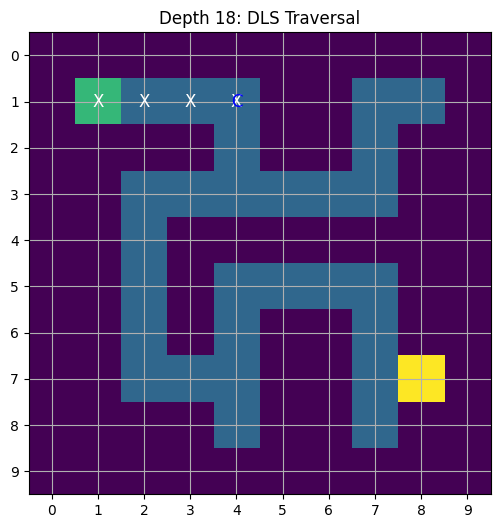

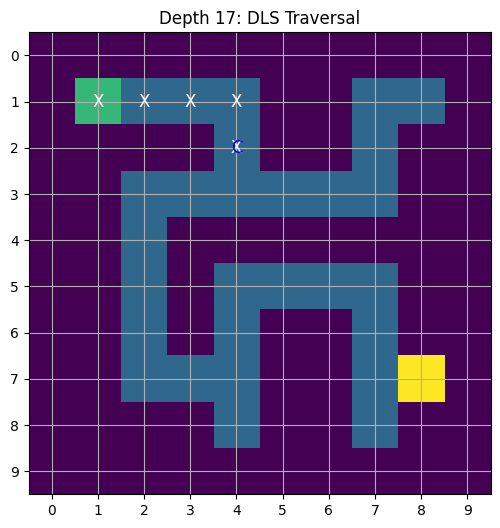

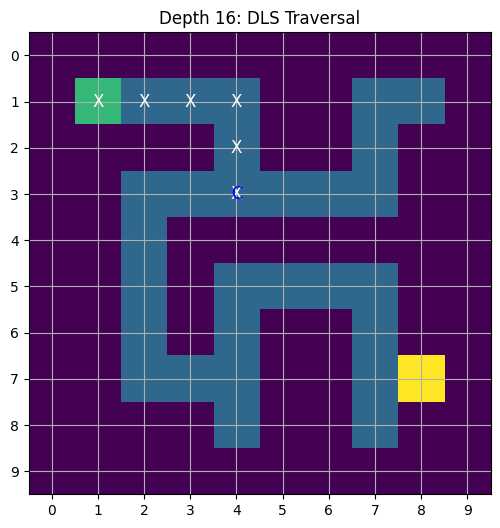

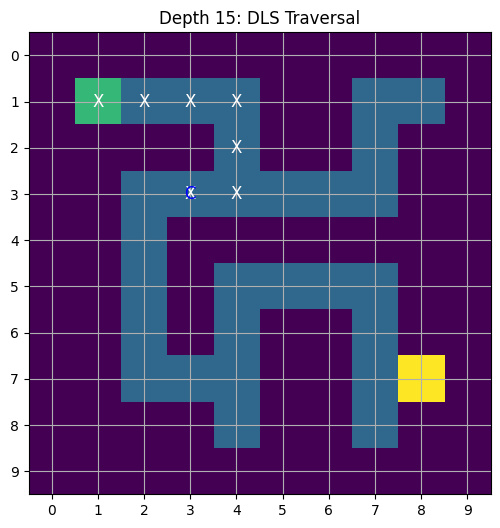

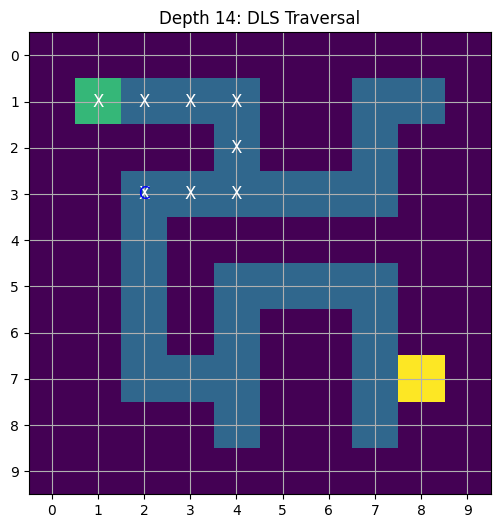

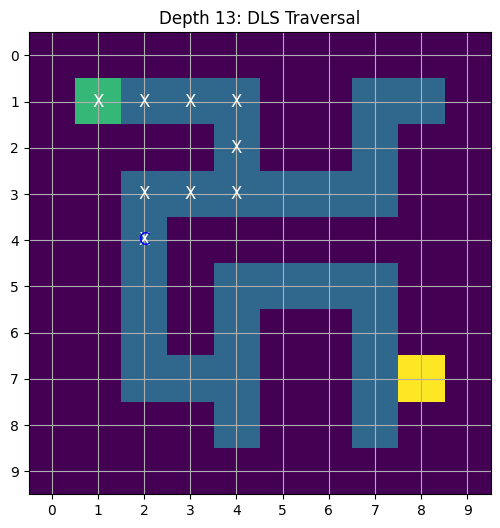

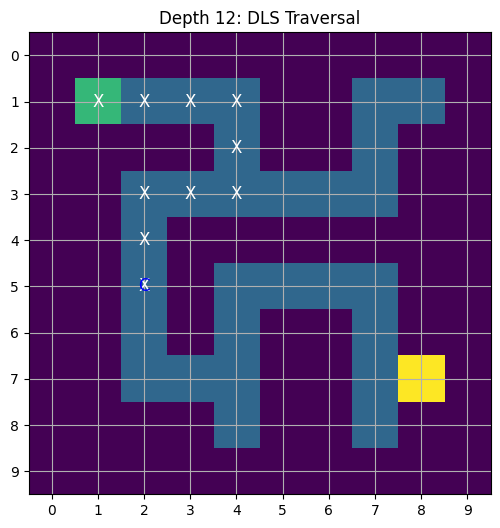

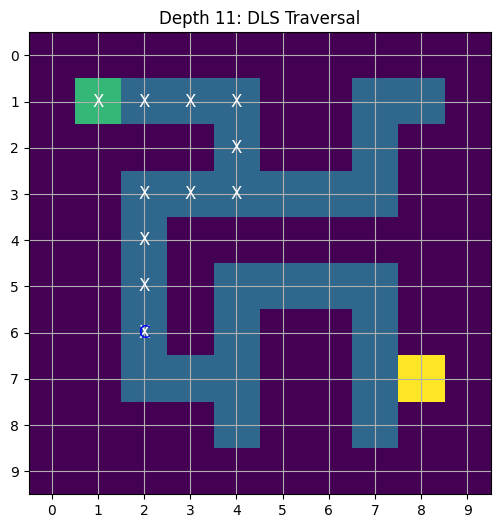

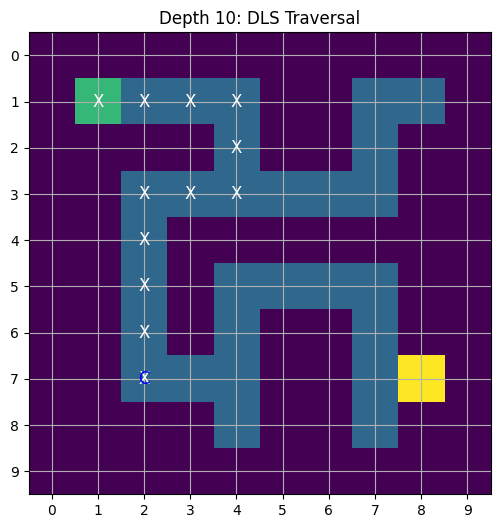

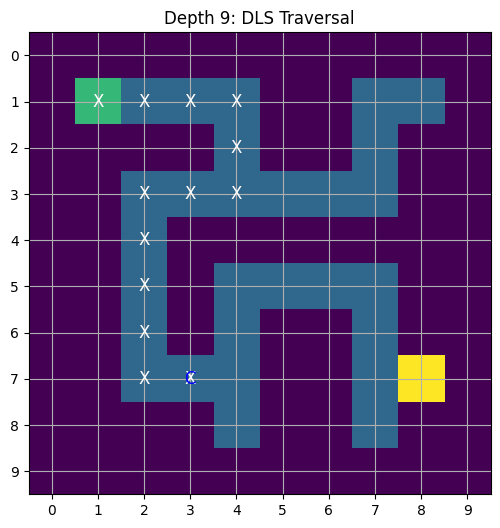

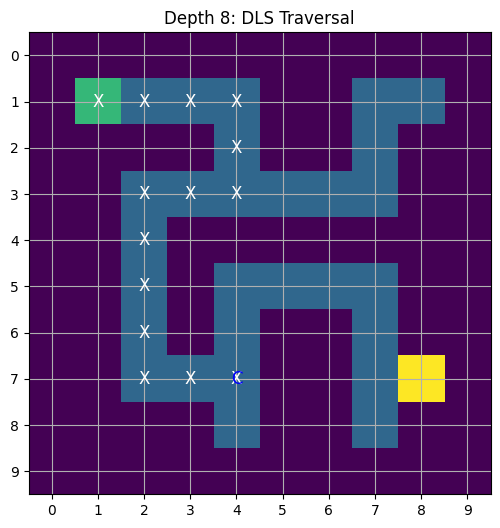

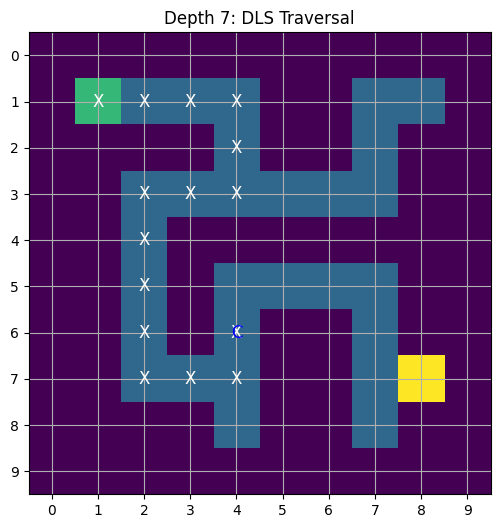

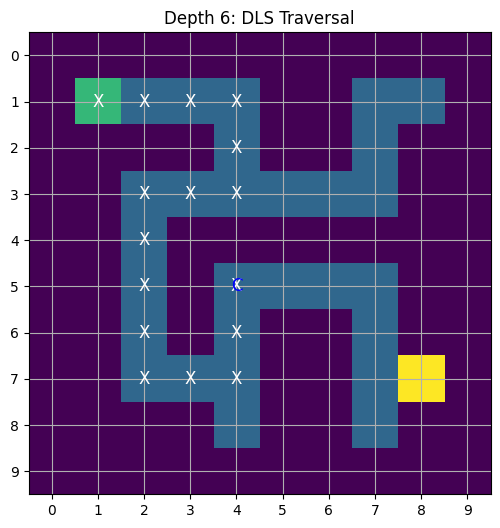

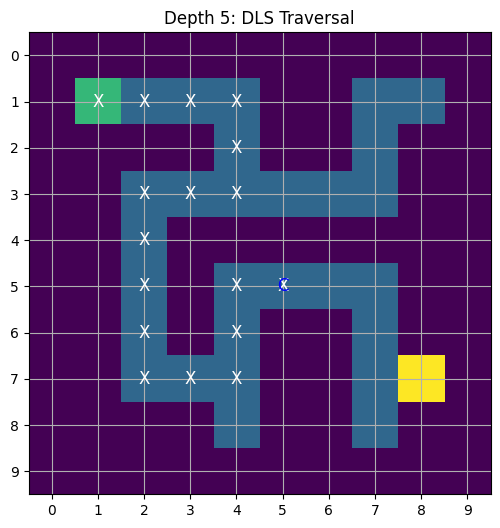

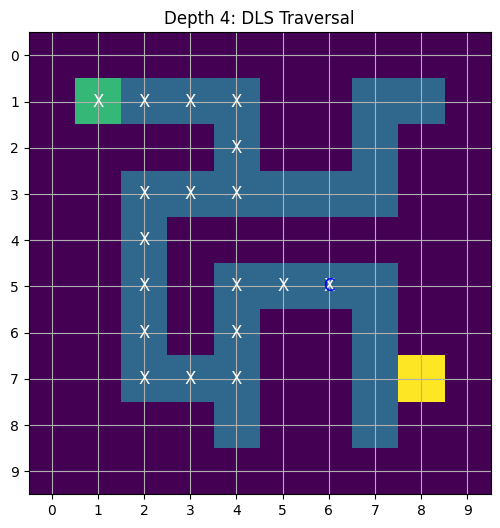

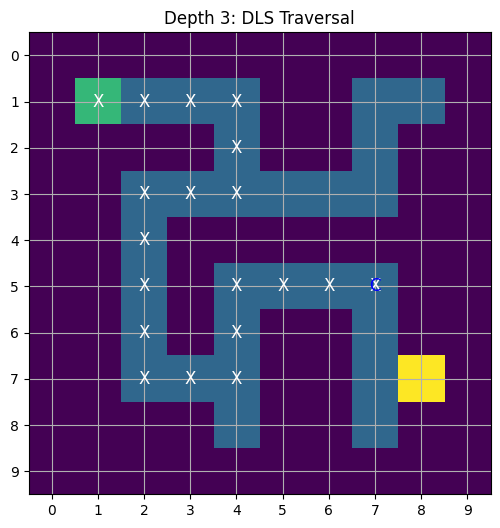

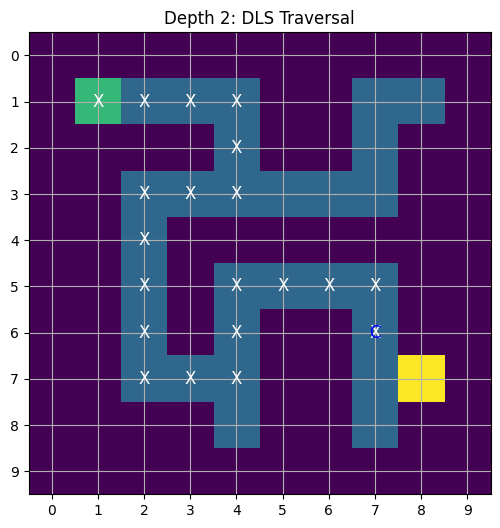

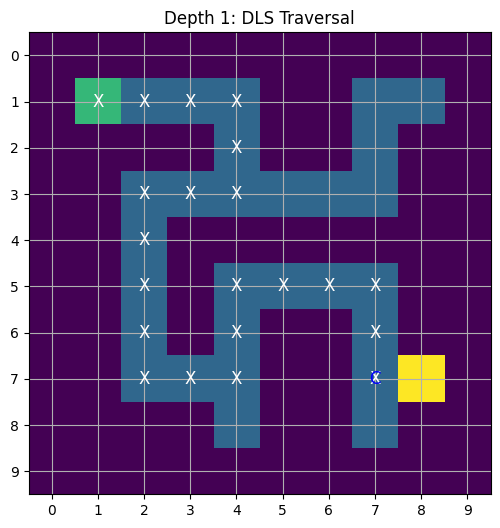

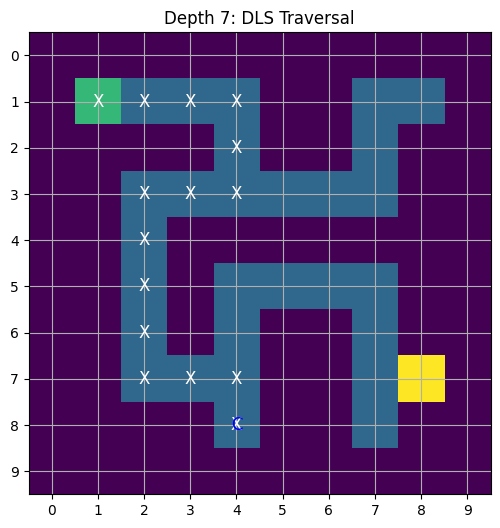

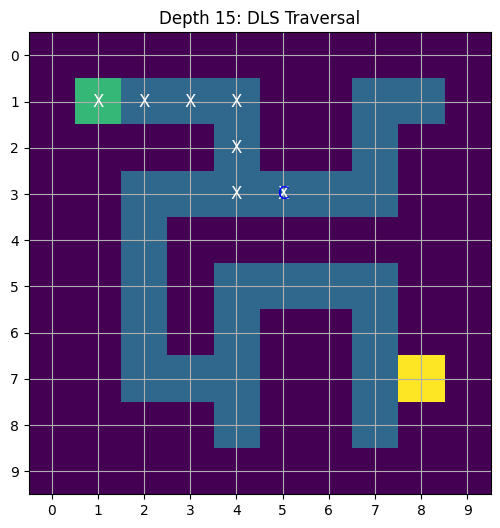

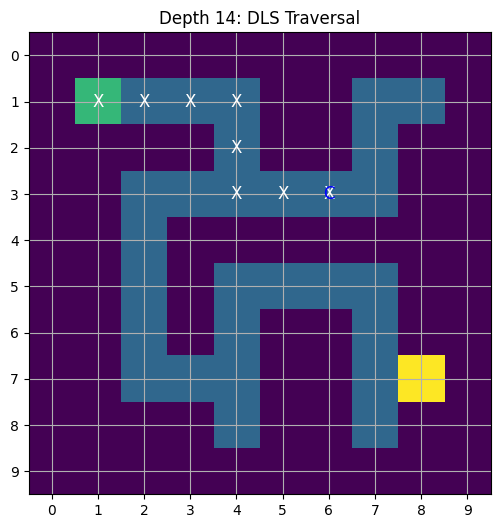

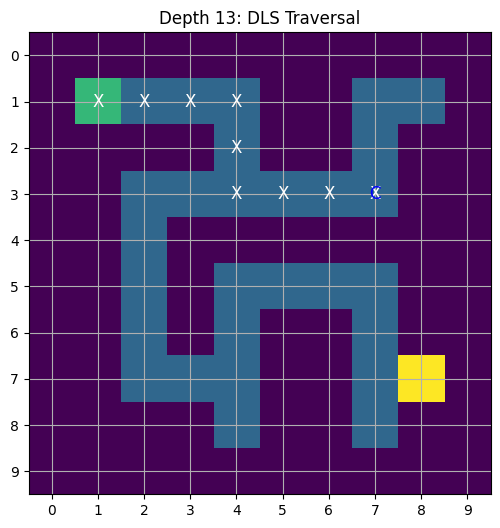

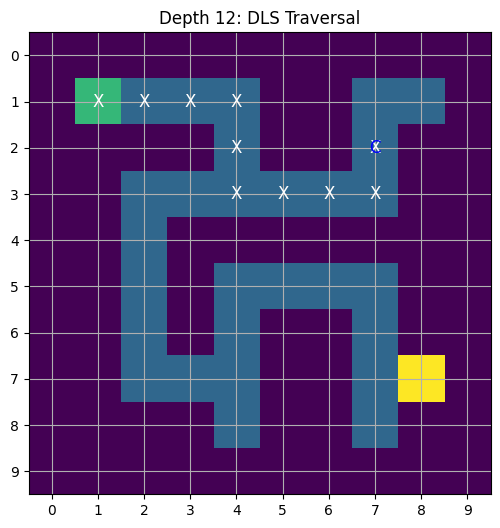

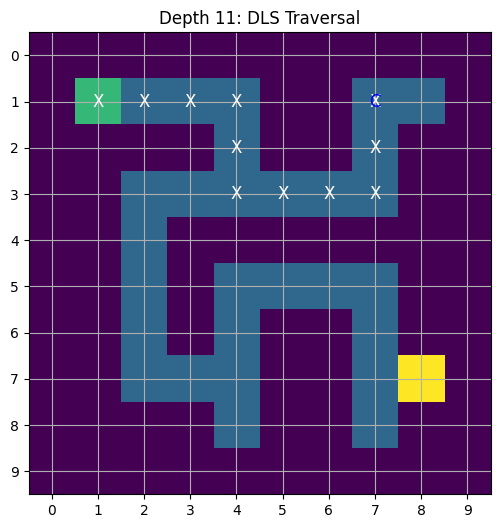

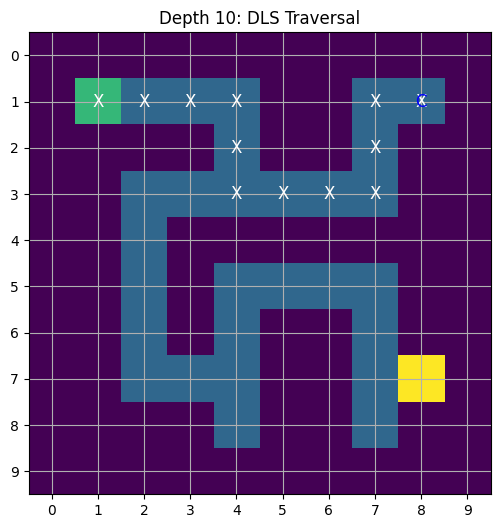

Searching with depth limit: 21


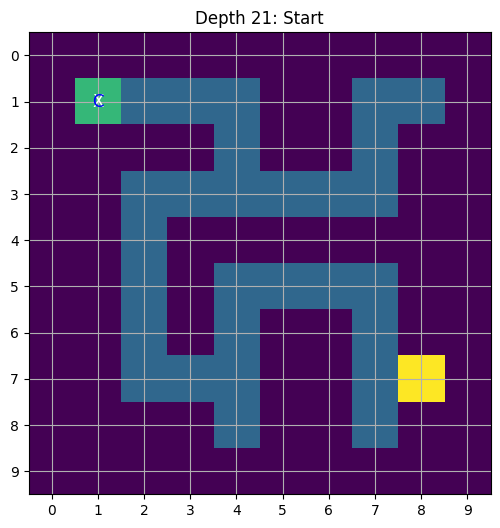

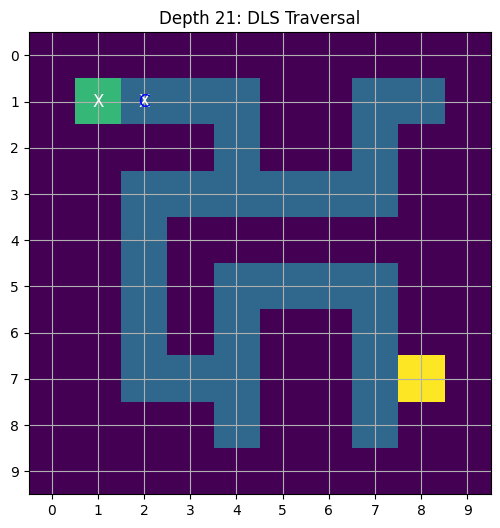

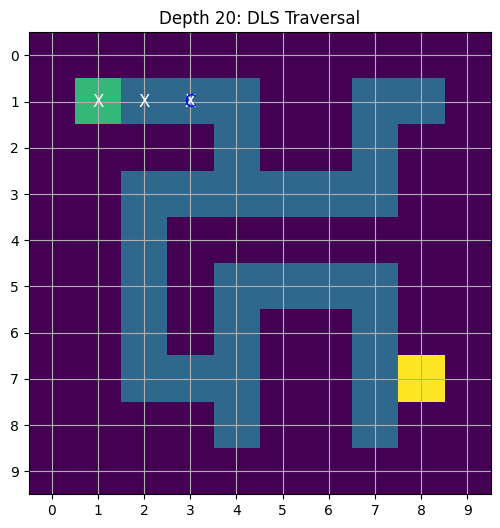

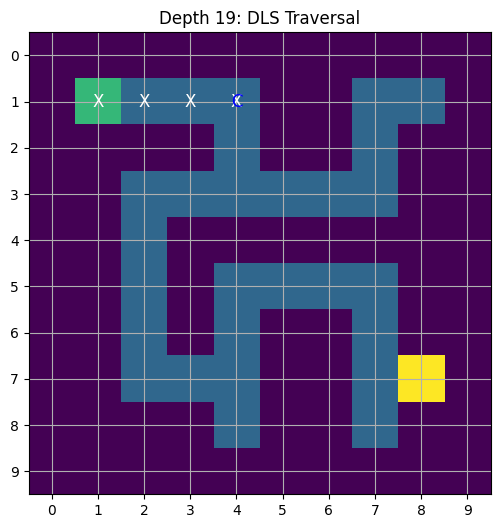

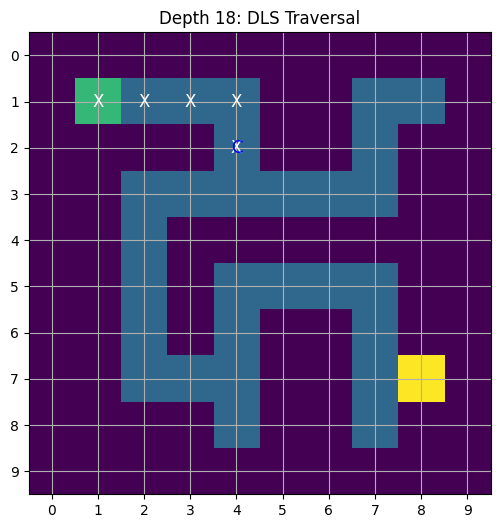

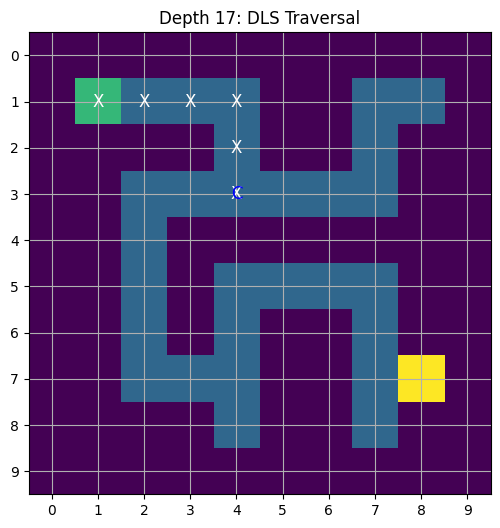

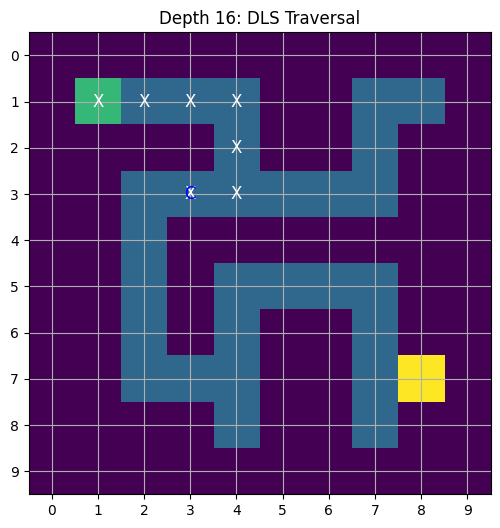

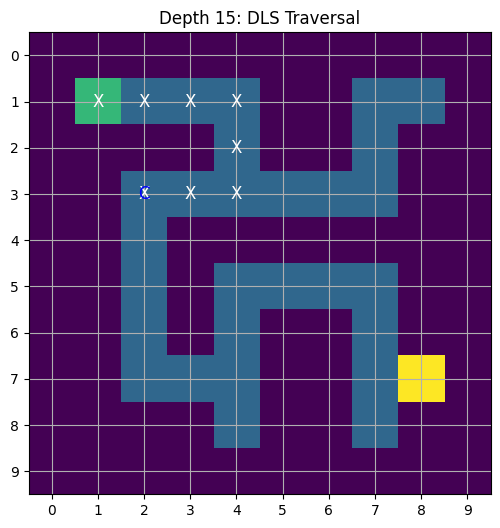

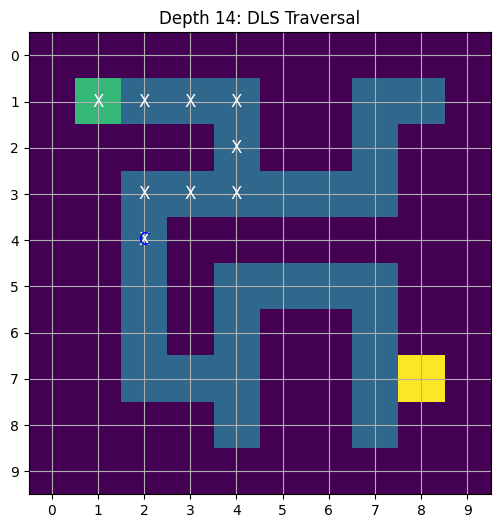

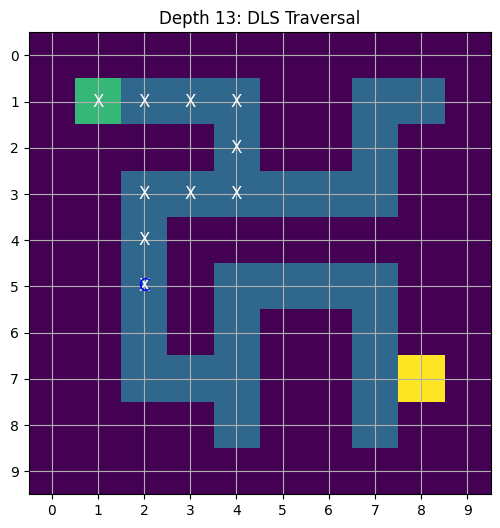

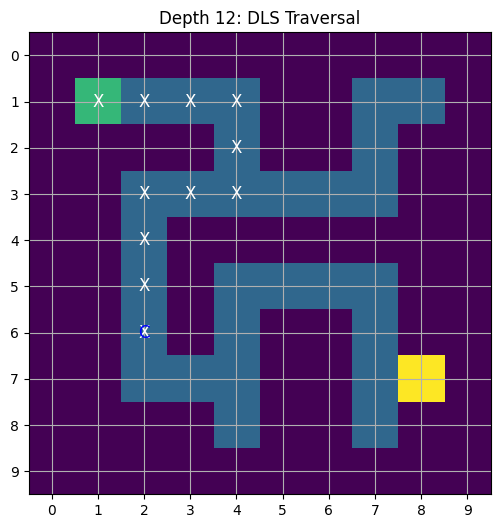

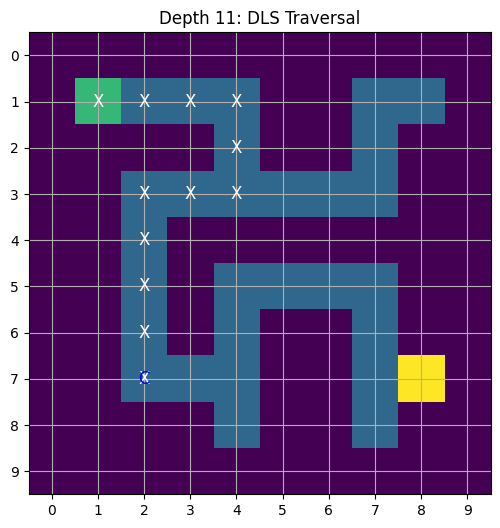

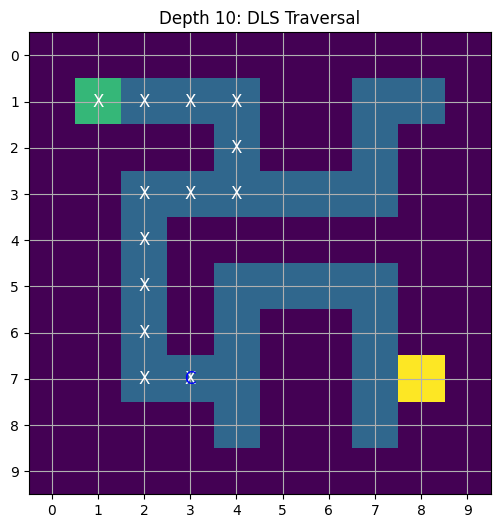

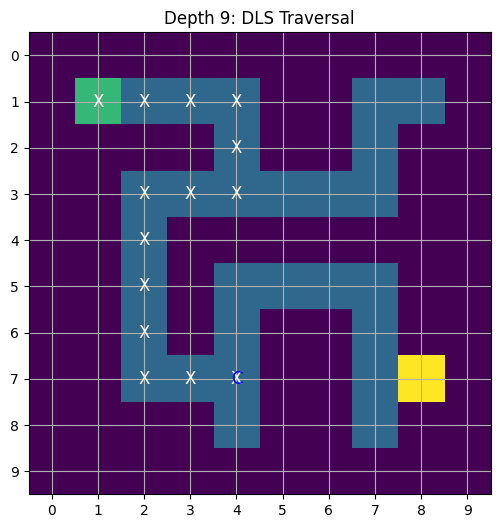

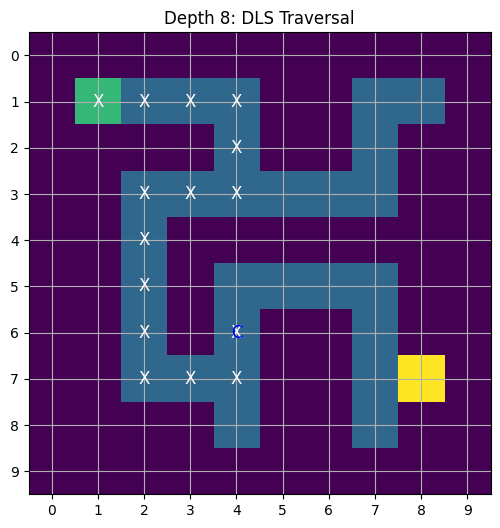

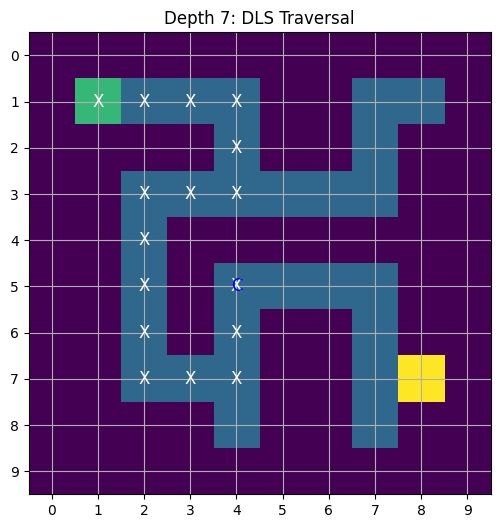

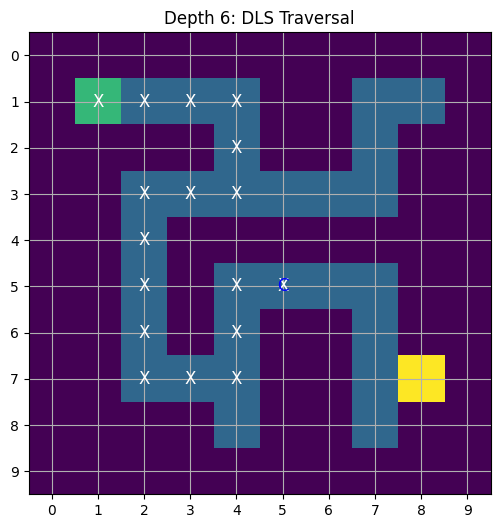

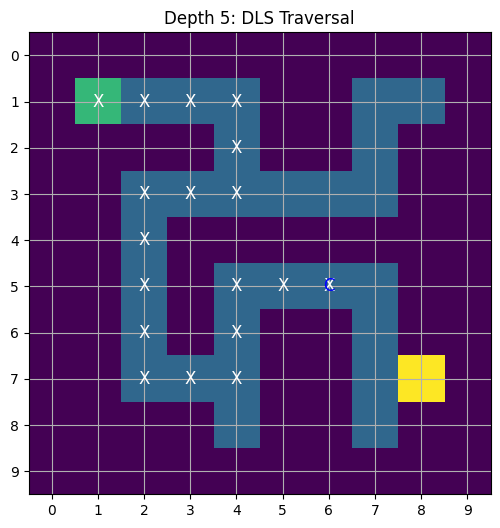

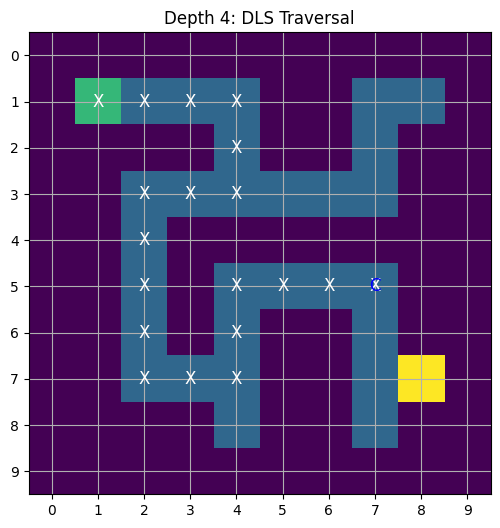

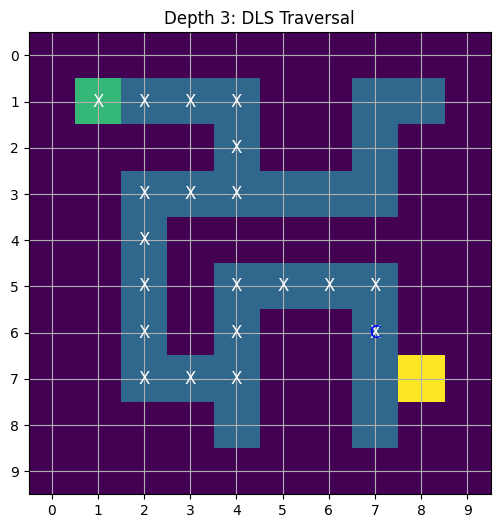

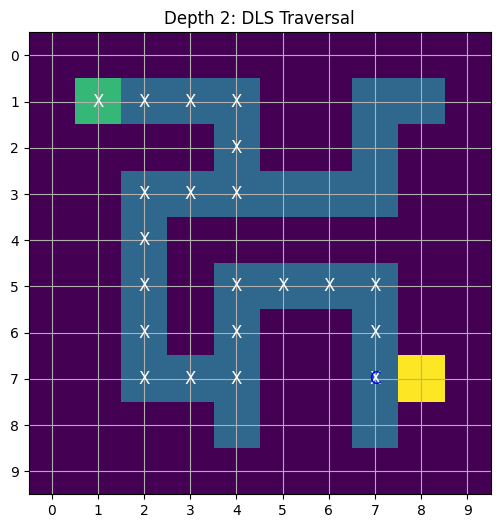

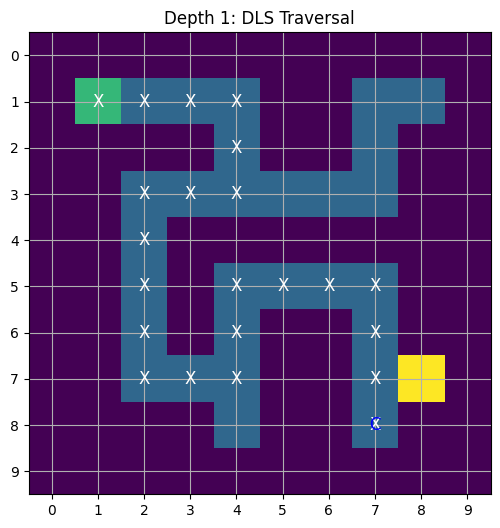

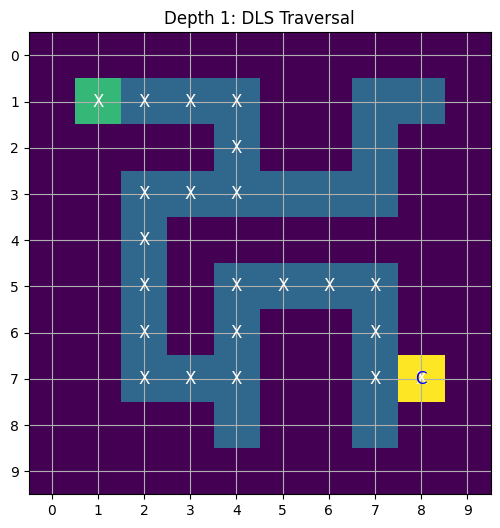

Solution found!
Path from start to goal: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (6, 4), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the maze grid
starting_grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 3, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

def plot_grid(grid, visited, current, title=""):
    plt.figure(figsize=(6, 6))
    cmap = plt.cm.viridis
    plt.imshow(grid, cmap=cmap)

    for (x, y) in visited:
        plt.text(y, x, 'X', ha='center', va='center', color='white', fontsize=12)

    if current:
        plt.text(current[1], current[0], 'C', ha='center', va='center', color='blue', fontsize=12)

    plt.title(title)
    plt.grid(True)
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.show()

def iddfs(grid):
    start = tuple(np.argwhere(grid == 2)[0])  # Find the start position
    goal = tuple(np.argwhere(grid == 3)[0])   # Find the goal position

    def dls(current_node, depth, visited, path):
        if depth == 0 and current_node == goal:
            return True
        if depth > 0:
            x, y = current_node
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                neighbor = (x + dx, y + dy)
                if (0 <= neighbor[0] < grid.shape[0] and
                        0 <= neighbor[1] < grid.shape[1] and
                        grid[neighbor] != 0 and
                        neighbor not in visited):
                    visited.add(neighbor)
                    path.append(neighbor)
                    plot_grid(grid, visited, neighbor, f"Depth {depth}: DLS Traversal")
                    if dls(neighbor, depth - 1, visited, path):
                        return True
                    path.pop()  # Backtrack
                    visited.remove(neighbor)
        return False

    depth = 0
    while True:
        visited = set([start])
        path = [start]
        print(f"Searching with depth limit: {depth}")
        plot_grid(grid, visited, start, f"Depth {depth}: Start")
        if dls(start, depth, visited, path):
            print("Solution found!")
            print("Path from start to goal:", path)
            break
        depth += 1

# Driver code
print("Following is the Iterative Deepening Depth-First Search (IDDFS) for the maze problem:")
iddfs(starting_grid)  # Function calling


In [4]:
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

def iddfs_visualization(graph, start, goal):
    def dls(node, depth, visited, path):
        if depth == 0 and node == goal:
            return True
        if depth > 0:
            visited.add(node)
            path.append(node)
            # Update step information
            step_info = {
                'Current Node': node,
                'STACK': ' '.join(stack),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            # Explore neighbors
            for neighbor in reversed(graph.get(node, [])):
                if neighbor not in visited:
                    stack.append(neighbor)
                    if dls(neighbor, depth - 1, visited, path):
                        return True
                    stack.pop()  # Backtrack
            path.pop()  # Remove from path if not successful
        return False

    depth = 0
    while True:
        stack = [start]
        visited = set()
        path = []
        steps = []  # List to track the steps for visualization

        print(f"Searching with depth limit: {depth}")
        # Perform depth-limited search
        if dls(start, depth, visited, path):
            print("Solution found!")
            print("Path from start to goal:", path)
            break
        depth += 1

    # Create the DataFrame from the steps
    df = pd.DataFrame(steps)
    if not df.empty:
        print("\nIDDFS Traversal Steps:")
        print(df.to_markdown())  # Convert the DataFrame to a Markdown table

# Driver Code
print("Following is the Iterative Deepening Depth-First Search (IDDFS) for the graph:")
iddfs_visualization(graph, '5', '8')  # Function calling



Following is the Iterative Deepening Depth-First Search (IDDFS) for the graph:
Searching with depth limit: 0
Searching with depth limit: 1
Searching with depth limit: 2
Solution found!
Path from start to goal: ['5', '7']

IDDFS Traversal Steps:
|    |   Current Node | STACK   | Processed Nodes   |
|---:|---------------:|:--------|:------------------|
|  0 |              5 | 5       | 5                 |
|  1 |              7 | 5 7     | 7 5               |


Following is the Iterative Deepening Depth-First Search (IDDFS)
Searching with depth limit: 0


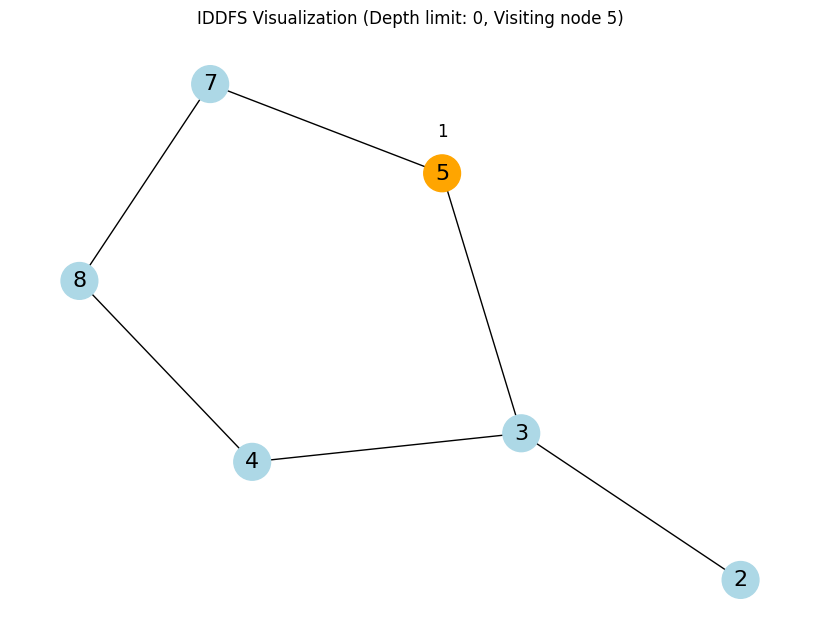


Path: 5

DFS Traversal Steps:
|    |   Current Node | Parent Node   | STACK   |   Processed Nodes |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|:--------------|:--------|------------------:|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         |                 5 |   1 | -   | -   | -   | -   | -   |
Searching with depth limit: 1


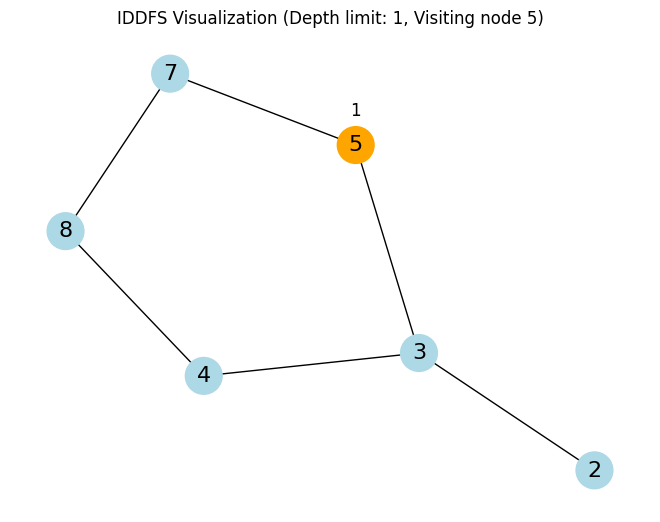

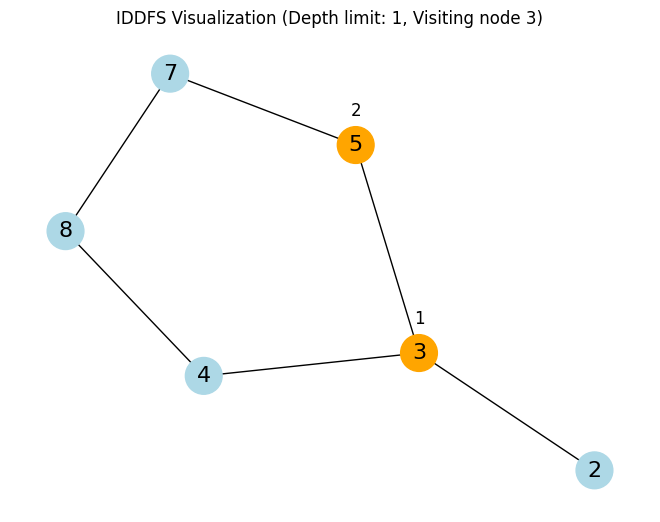

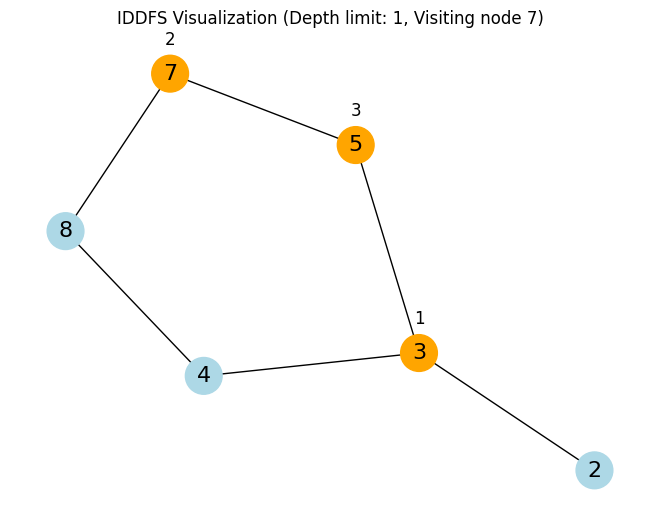


Path: 5 -> 3 -> 7

DFS Traversal Steps:
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|--------------:|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
|  1 |              3 |             5 | 7       | 3 5               |   2 | 2   | -   | -   | -   | -   |
|  2 |              7 |             5 |         | 3 7 5             |   3 | 3   | 3   | -   | -   | -   |
Searching with depth limit: 2


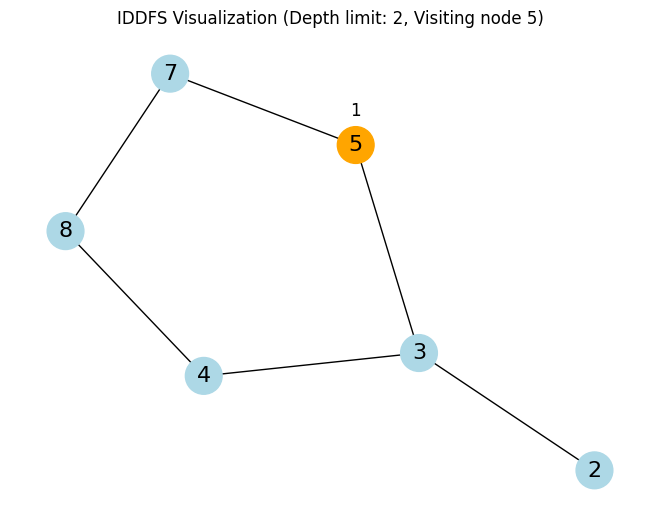

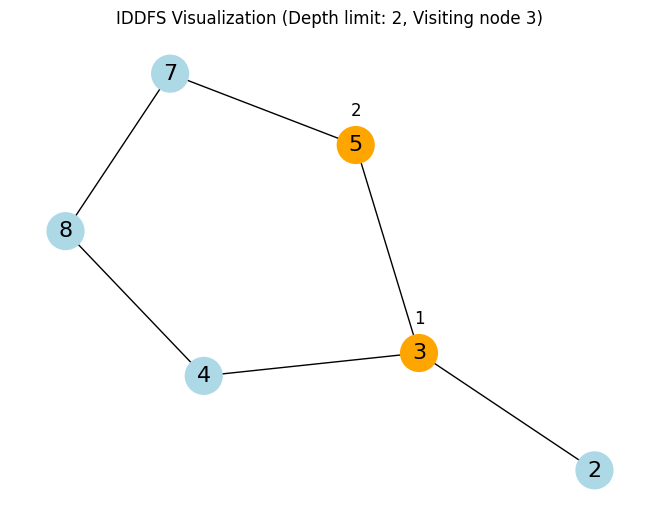

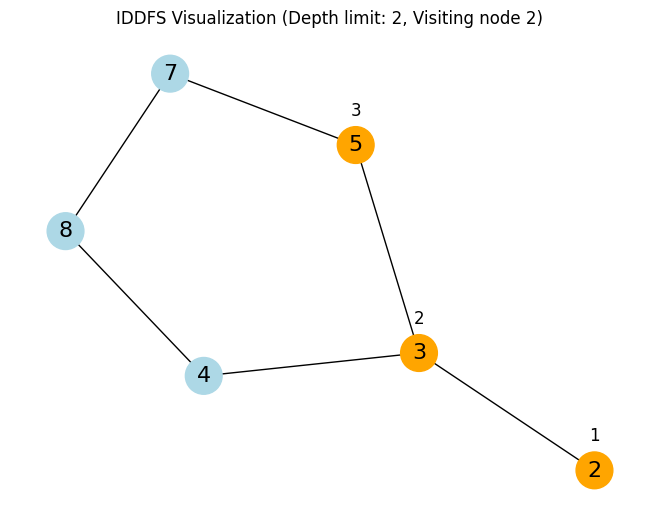

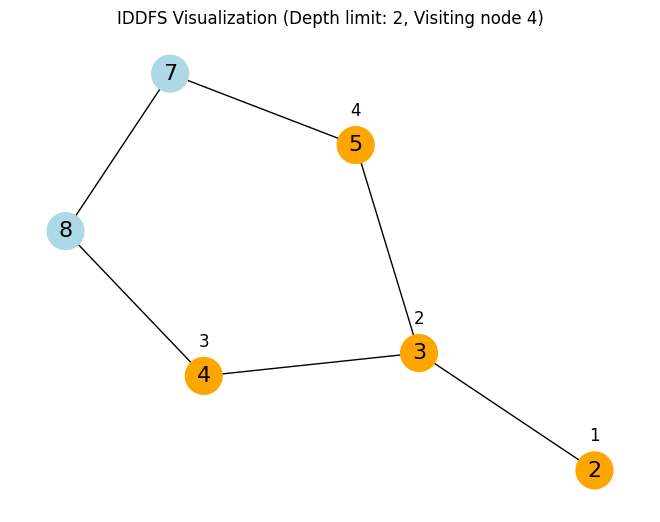

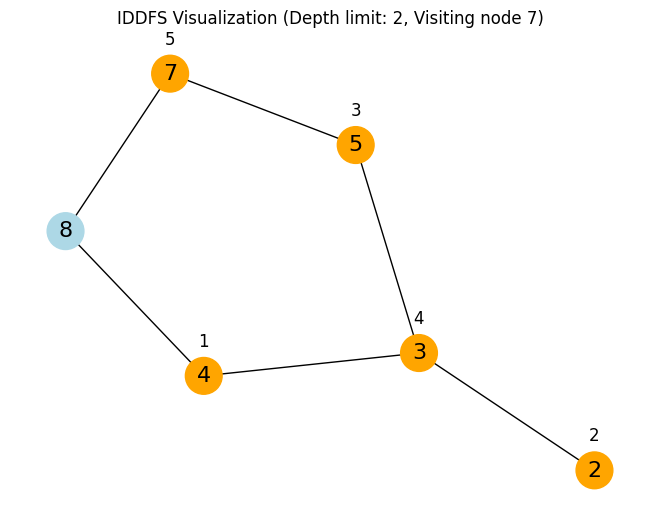

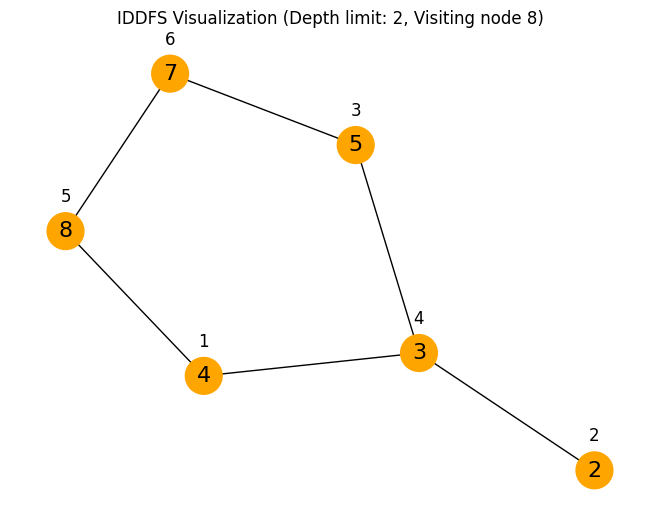


Path: 5 -> 3 -> 2 -> 4 -> 7 -> 8

DFS Traversal Steps:
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|--------------:|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
|  1 |              3 |             5 | 7       | 3 5               |   2 | 2   | -   | -   | -   | -   |
|  2 |              2 |             3 | 7 4     | 2 3 5             |   3 | 3   | -   | 3   | -   | -   |
|  3 |              4 |             3 | 7       | 2 3 4 5           |   4 | 4   | -   | 4   | 4   | -   |
|  4 |              7 |             5 |         | 4 2 5 3 7         |   5 | 5   | 5   | 5   | 5   | -   |
|  5 |              8 |             7 |         | 4 2 5 3 8 7       |   6 | 6   | 6   | 6   | 6   | 6   |
Searching with depth limit: 3


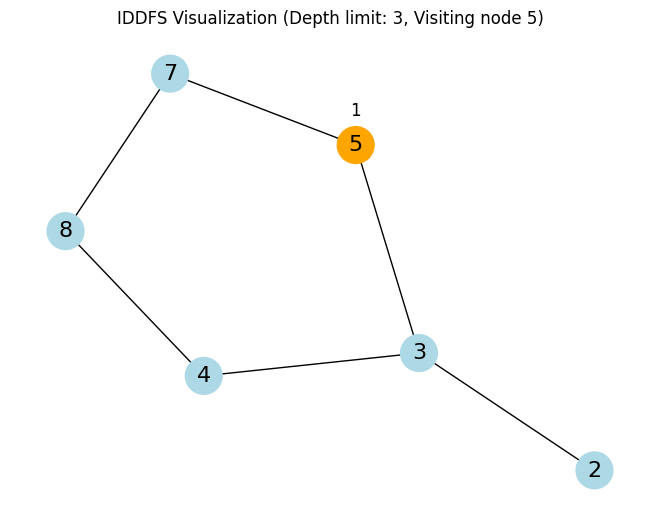

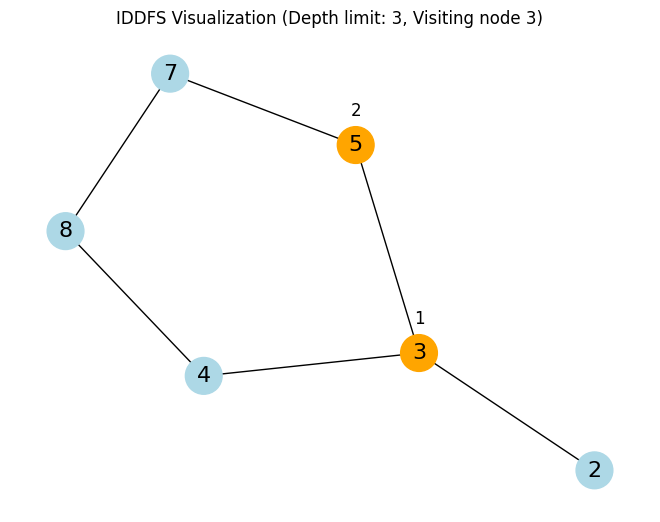

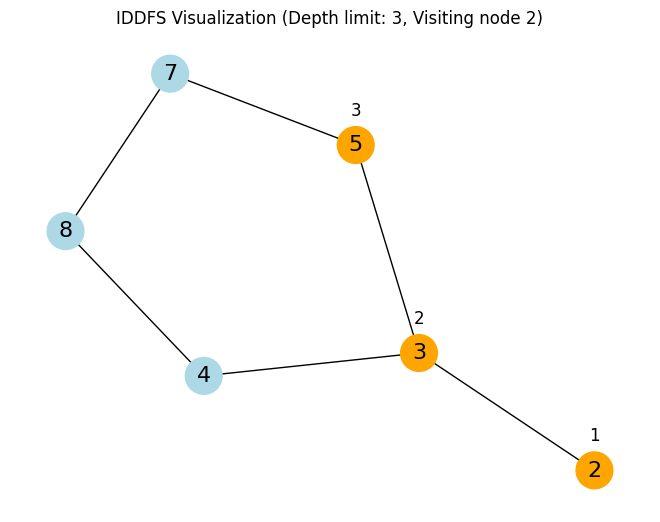

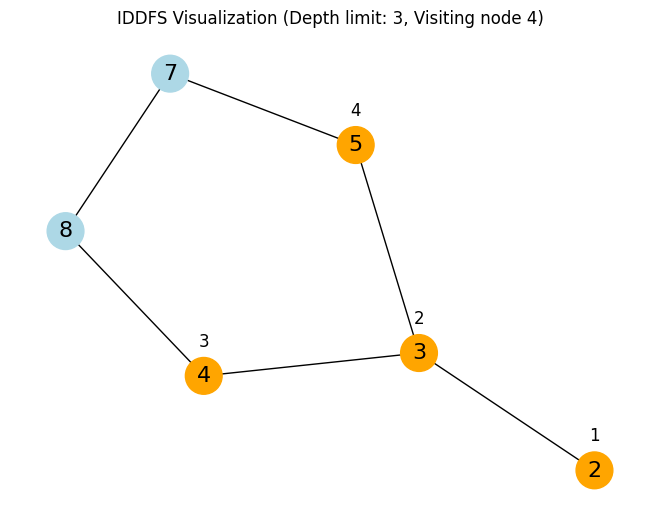

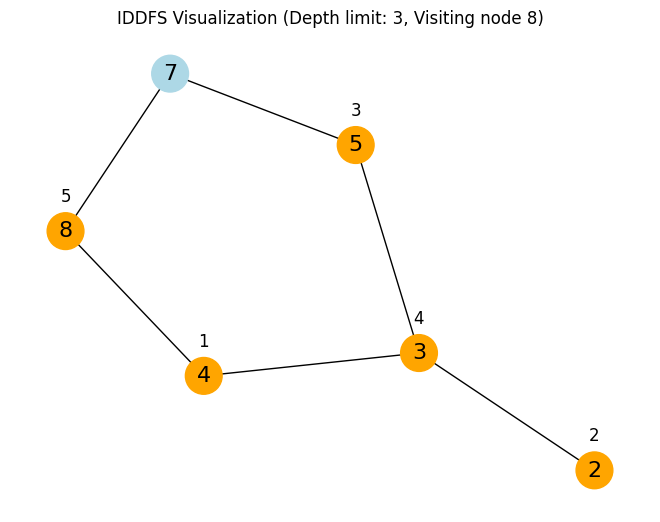

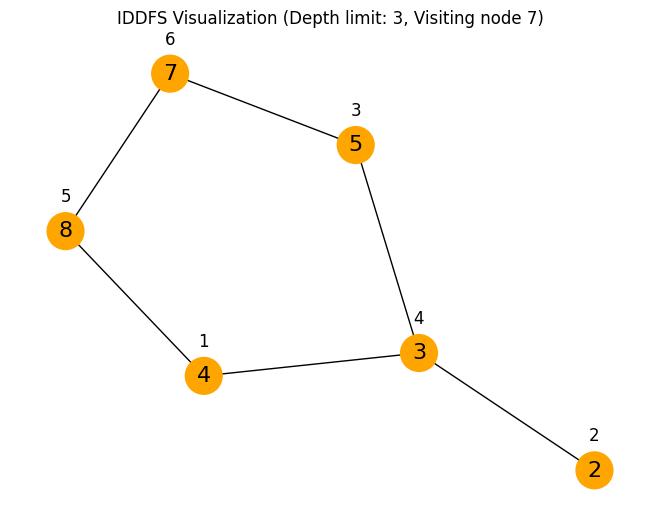


Path: 5 -> 3 -> 2 -> 4 -> 8 -> 7

DFS Traversal Steps:
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|--------------:|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
|  1 |              3 |             5 | 7       | 3 5               |   2 | 2   | -   | -   | -   | -   |
|  2 |              2 |             3 | 7 4     | 2 3 5             |   3 | 3   | -   | 3   | -   | -   |
|  3 |              4 |             3 | 7       | 2 3 4 5           |   4 | 4   | -   | 4   | 4   | -   |
|  4 |              8 |             4 | 7       | 4 2 5 3 8         |   5 | 5   | -   | 5   | 5   | 5   |
|  5 |              7 |             5 |         | 4 2 5 3 8 7       |   6 | 6   | 6   | 6   | 6   | 6   |


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def dfs_with_depth_limit(graph, start, depth, visited, path, parent_map, pos, visit_count, steps, statuses):
    stack = [(start, None, 0)]  # Initialize stack with (node, parent, current_depth)
    while stack:
        current_node, parent_node, current_depth = stack.pop()
        if current_depth > depth:
            continue

        if current_node not in visited:
            visited.add(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(list(visited).index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"IDDFS Visualization (Depth limit: {depth}, Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'STACK': ' '.join([node for node, _, _ in stack]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            # Push unvisited neighbours onto the stack with increased depth
            for neighbour in reversed(graph[current_node]):
                if neighbour not in visited:
                    stack.append((neighbour, current_node, current_depth + 1))

def iddfs_visualization(graph, start, goal, max_depth):
    plt.figure(figsize=(8, 6))

    pos = nx.spring_layout(G)  # Positioning of nodes
    for depth in range(max_depth + 1):
        print(f"Searching with depth limit: {depth}")
        visited = set()
        path = []
        parent_map = {}
        visit_count = 0

        # Initialize the table components
        steps = []
        statuses = {node: [] for node in G.nodes()}

        # Perform depth-limited DFS
        dfs_with_depth_limit(graph, start, depth, visited, path, parent_map, pos, visit_count, steps, statuses)

        # Create the table
        df = pd.DataFrame(steps)
        for node, status in statuses.items():
            df[node] = status

        print("\nPath:", " -> ".join(path))
        print("\nDFS Traversal Steps:")
        print(df.to_markdown())  # Convert the DataFrame to a Markdown table

    plt.show()

# Driver Code
print("Following is the Iterative Deepening Depth-First Search (IDDFS)")
iddfs_visualization(graph, '5', '8', 3)  # Function calling with a max depth of 3
